In [1]:
# Import the libraries
import os
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format ='retina'
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#topStared=pd.read_csv('data/TopStaredRepositories.csv', sep=",")
#commits=pd.read_csv('data/commitsTopStaredRepositories.csv', sep=",")
#flask=pd.read_csv('data/pallets_flask.csv', sep=",")

## Data Info

In [26]:
#parse throught folder with csv and put into a df
import os
import pandas as pd

# Specify the folder path containing CSV files
folder_path = '/Users/ethan/Downloads/repoFileStructures'


# Initialize an empty DataFrame to store the combined data
df = pd.DataFrame()

for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)

        try:
            current_df = pd.read_csv(file_path, on_bad_lines='skip')
            df = pd.concat([df, current_df], ignore_index=True)
        except pd.errors.ParserError as e:
            print(f"Error reading {filename}: {e}")
            
            
df = df.rename(columns={'fileTuple<name.size>': 'name-size'})

### Split data

In [29]:
df[['filePath', 'fileSize','idk',"test"]] = df['name-size'].str.strip("()").str.split(', ', expand=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2258523 entries, 0 to 2258522
Data columns (total 7 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   owner      object
 1   repo       object
 2   name-size  object
 3   filePath   object
 4   fileSize   object
 5   idk        object
 6   test       object
dtypes: object(7)
memory usage: 120.6+ MB


In [31]:
df['owner'].value_counts().head()

owner
facebook               155100
servo                  127066
Alexander-MacDonald    100005
elastic                 99928
torvalds                82439
Name: count, dtype: int64

In [32]:
df['repo'].value_counts().head()

repo
servo        127066
test-repo    100005
hhvm          89616
linux         82439
kotlin        82251
Name: count, dtype: int64

In [33]:
print("Unique Owner:", df['owner'].nunique())
print("Unique Repo:",  df['repo'].nunique())

Unique Owner: 809
Unique Repo: 955


## Data Cleaning 

In [34]:
not_null_rows = df[df['idk'].notna()]

# Display the DataFrame with non-null rows
print(not_null_rows)

             owner        repo  \
190650      apache       spark   
190651      apache       spark   
527276      dotnet      roslyn   
527277      dotnet      roslyn   
1302123  Microsoft        CNTK   
1306193  Microsoft  TypeScript   
1313898  Microsoft  TypeScript   
1313899  Microsoft  TypeScript   
1313936  Microsoft  TypeScript   
1313937  Microsoft  TypeScript   
1313938  Microsoft  TypeScript   
1313939  Microsoft  TypeScript   
1313940  Microsoft  TypeScript   
1313941  Microsoft  TypeScript   
1313942  Microsoft  TypeScript   
1313943  Microsoft  TypeScript   
1313944  Microsoft  TypeScript   
1313945  Microsoft  TypeScript   
1313946  Microsoft  TypeScript   
1313947  Microsoft  TypeScript   
1585162    OpenEmu     OpenEmu   
1585621    OpenEmu     OpenEmu   
1766526       ruby        ruby   
1766527       ruby        ruby   
1766528       ruby        ruby   
2233094       xitu  gold-miner   

                                                 name-size  \
190650   ('main/sql

In [37]:
not_null_rows = df[df['test'].notna()]

# Display the DataFrame with non-null rows
print(not_null_rows)

         owner    repo                                          name-size  \
527276  dotnet  roslyn  ('main/docs/contributing/Building, Debugging, ...   
527277  dotnet  roslyn  ('main/docs/contributing/Building, Debugging, ...   

                                filePath                    fileSize  \
527276  'main/docs/contributing/Building     and Testing on Unix.md'   
527277  'main/docs/contributing/Building  and Testing on Windows.md'   

                               idk   test  
527276     and Testing on Unix.md'   5804  
527277  and Testing on Windows.md'  15583  


In [35]:
#find all the values in "idk" and replace with file size 
def replace_with_idk_value(df, row_indices, target_column):
    for row_index in row_indices:
        if pd.notna(df.loc[row_index, 'idk']):
            df.loc[row_index, target_column] = df.loc[row_index, 'idk']


not_null_rows = df[df['idk'].notna()]
row_numbers = not_null_rows.index.tolist()
replace_with_idk_value(df, row_numbers, 'fileSize')


In [38]:
#find all the values in "idk" and replace with file size 
def replace_with_idk_value(df, row_indices, target_column):
    for row_index in row_indices:
        if pd.notna(df.loc[row_index, 'test']):
            df.loc[row_index, target_column] = df.loc[row_index, 'test']


not_null_rows = df[df['test'].notna()]
row_numbers = not_null_rows.index.tolist()
replace_with_idk_value(df, row_numbers, 'fileSize')


In [39]:
df.isnull().sum()

owner              0
repo              10
name-size         10
filePath          10
fileSize          10
idk          2258497
test         2258521
dtype: int64

In [42]:
df= df.drop(columns=['name-size','idk','test'])
df = df.dropna()
df['fileSize'] = df['fileSize'].astype(int)

C:\Users\ethan\AppData\Local\Temp\ipykernel_28332\1379780896.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fileSize'] = df['fileSize'].astype(int)


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2258513 entries, 0 to 2258522
Data columns (total 4 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   owner     object
 1   repo      object
 2   filePath  object
 3   fileSize  int32 
dtypes: int32(1), object(3)
memory usage: 77.5+ MB


# EDA

In [44]:
df.head()

owner           repo                                          filePath  \
0  0xAX  linux-insides       'main/.github/ISSUE_TEMPLATE/bug_report.md'   
1  0xAX  linux-insides  'main/.github/ISSUE_TEMPLATE/feature_request.md'   
2  0xAX  linux-insides                                 'main/.gitignore'   
3  0xAX  linux-insides                    'main/Assets/linux-kernel.png'   
4  0xAX  linux-insides                          'main/Booting/README.md'   

   fileSize  
0       565  
1       638  
2        12  
3     31671  
4      1158

In [47]:
df.count()

owner       2258513
repo        2258513
filePath    2258513
fileSize    2258513
dtype: int64

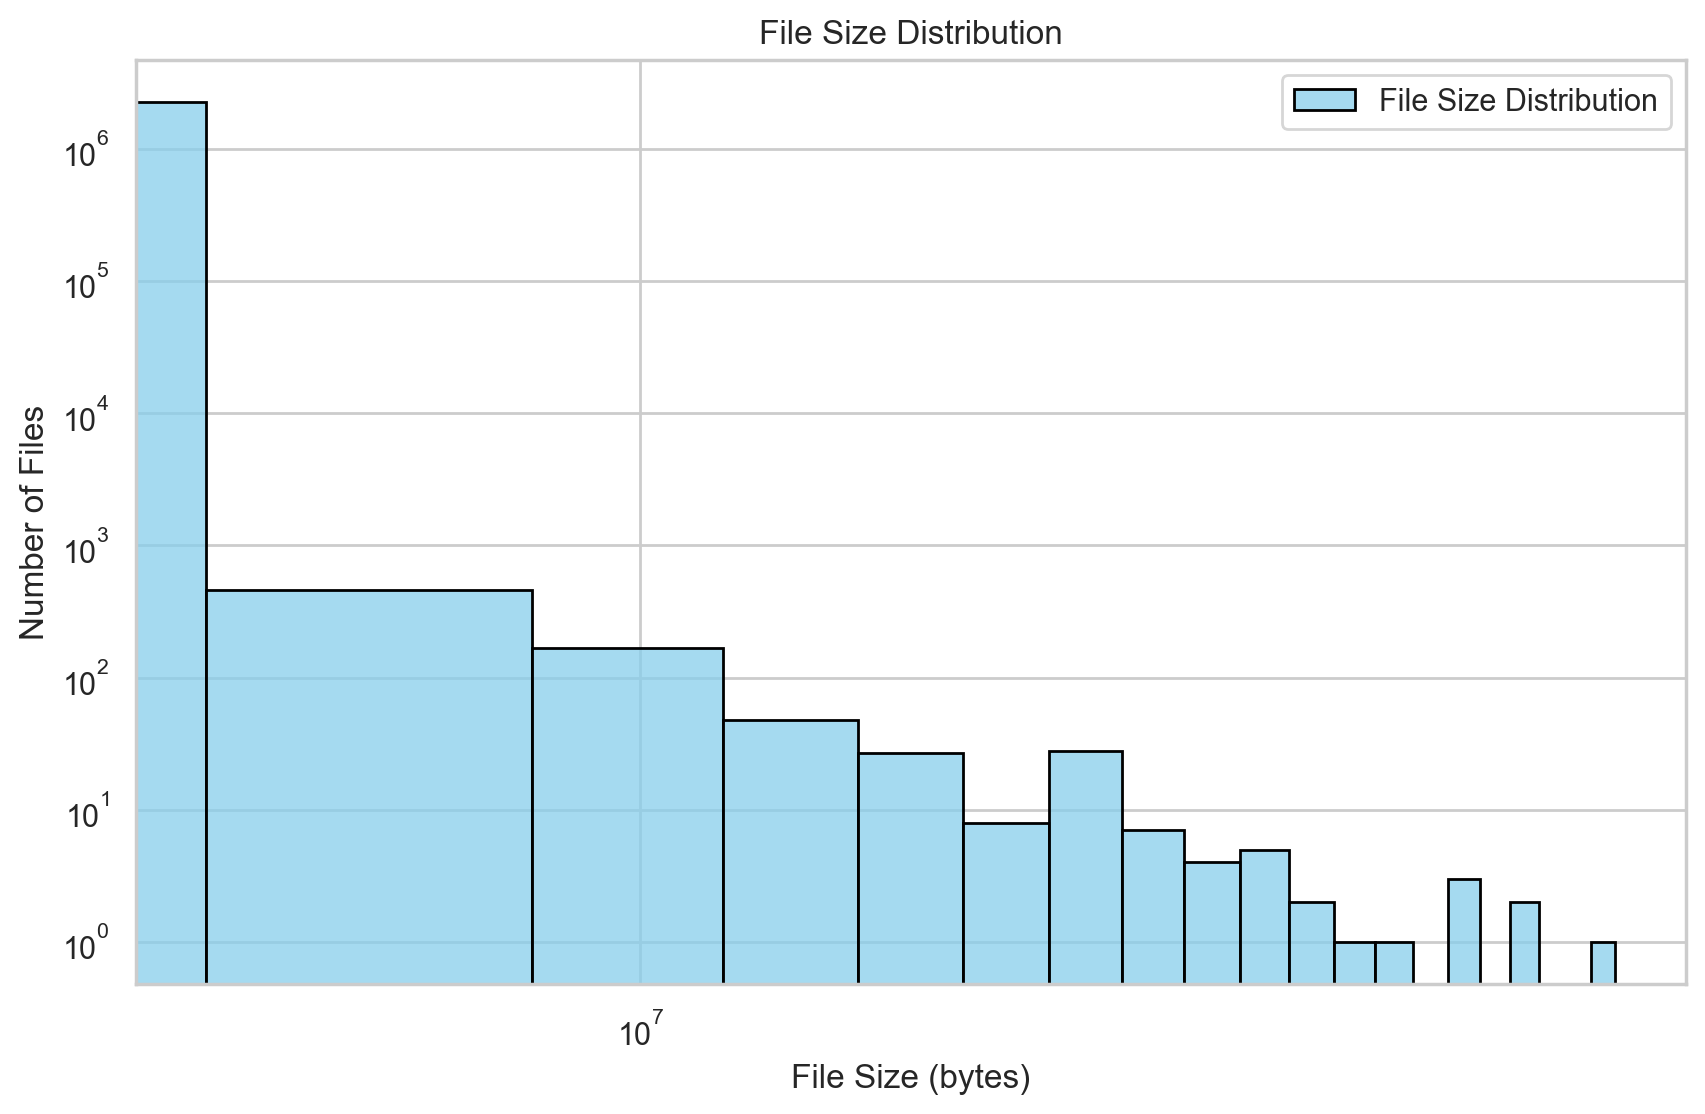

In [49]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Plot histogram using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['fileSize'], bins=20, color='skyblue', edgecolor='black')
plt.title('File Size Distribution')
plt.xlabel('File Size (bytes)')
plt.ylabel('Number of Files')
plt.xscale('log')
plt.yscale('log')
plt.legend(['File Size Distribution'])
plt.show()

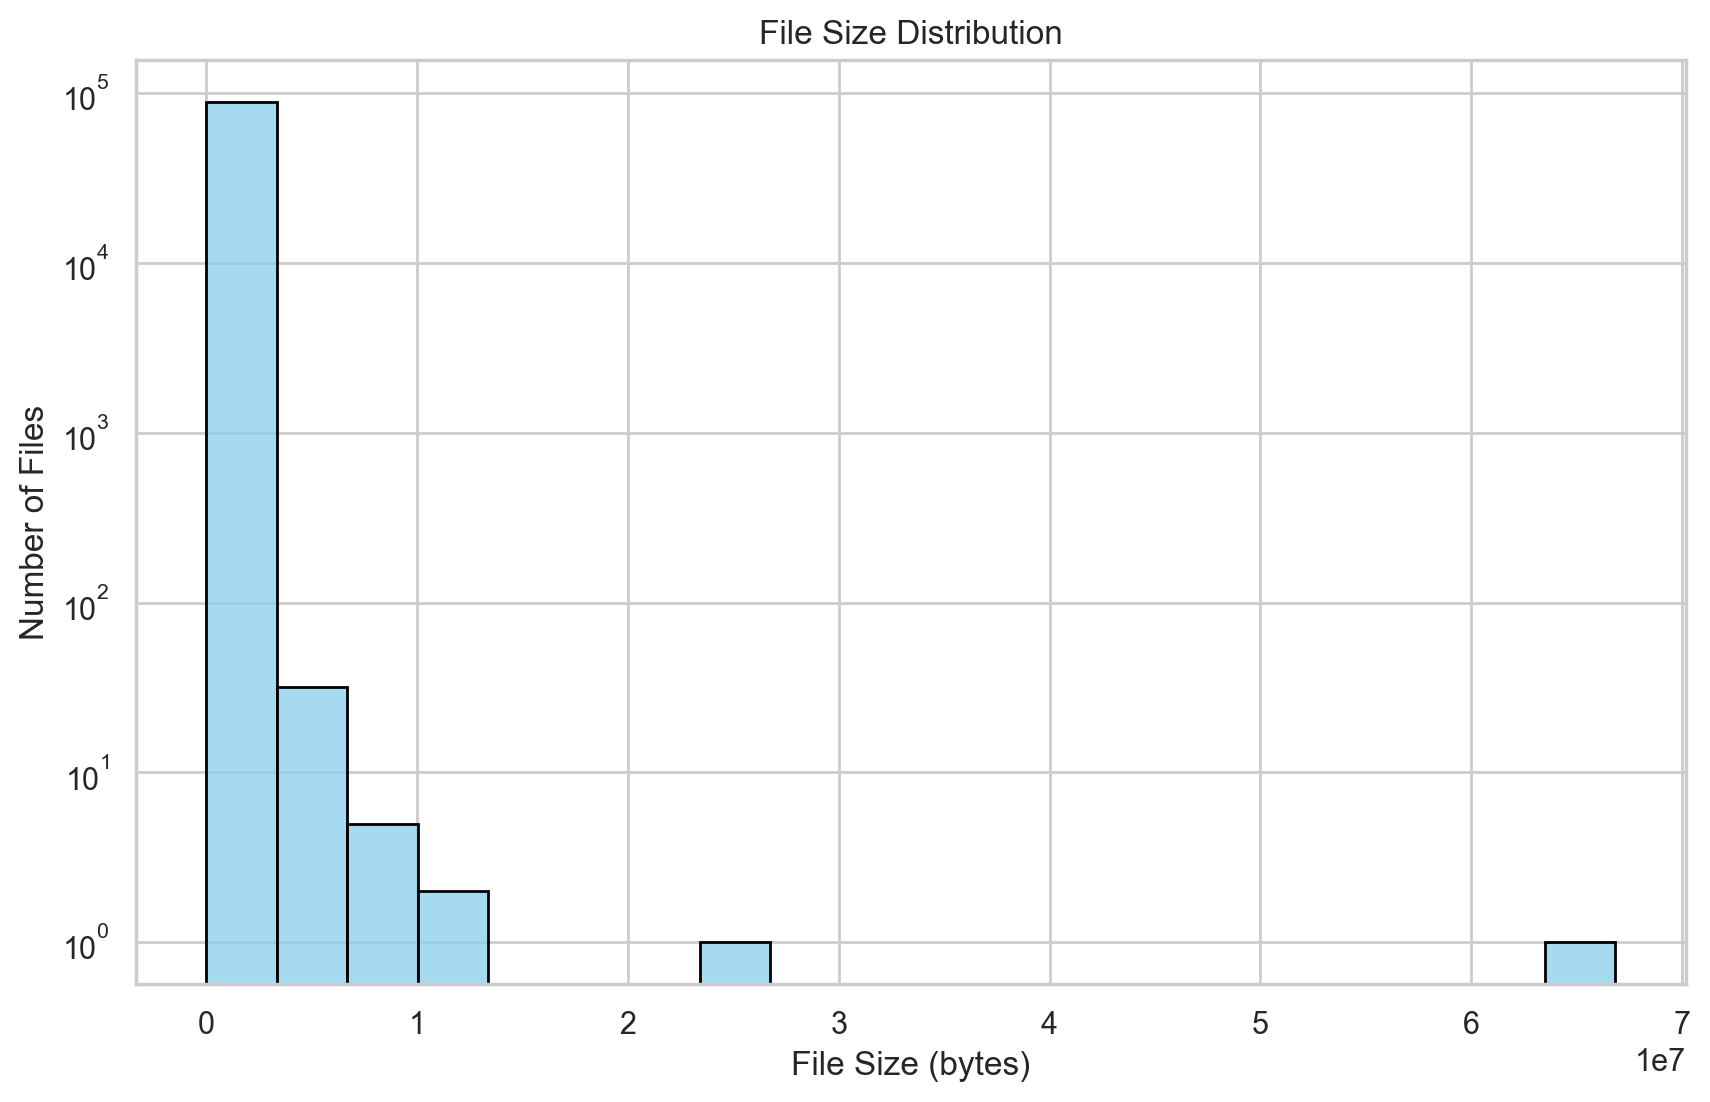

In [ ]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Plot histogram using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['fileSize'], bins=20, color='skyblue', edgecolor='black')
plt.title('File Size Distribution')
plt.xlabel('File Size (bytes)')
plt.ylabel('Number of Files')
plt.yscale('log')
plt.show()

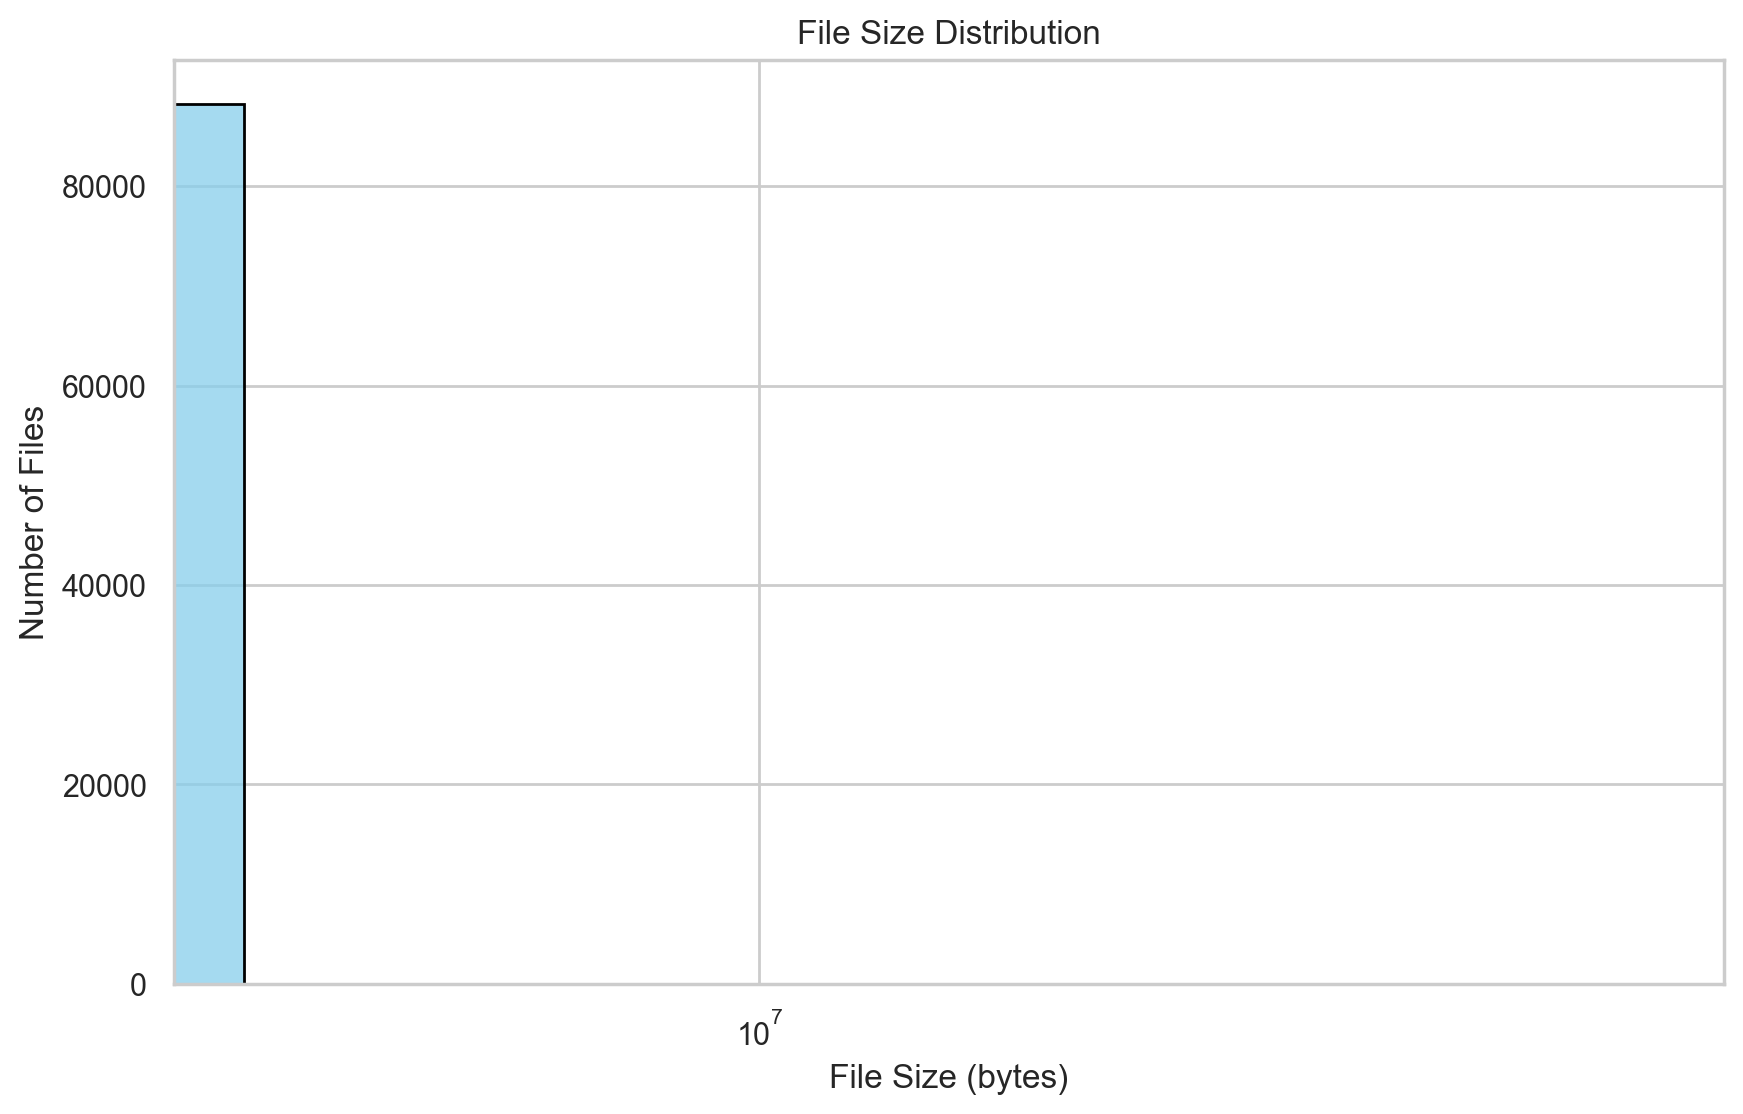

In [ ]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Plot histogram using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['fileSize'], bins=20, color='skyblue', edgecolor='black')
plt.title('File Size Distribution')
plt.xlabel('File Size (bytes)')
plt.ylabel('Number of Files')
plt.xscale('log')
plt.show()

In [51]:
column_description = df['fileSize'].describe()

# Print or use the results as needed
print(column_description)

count    2.258513e+06
mean     1.296818e+04
std      2.407529e+05
min      0.000000e+00
25%      3.390000e+02
50%      1.163000e+03
75%      3.839000e+03
max      7.950287e+07
Name: fileSize, dtype: float64


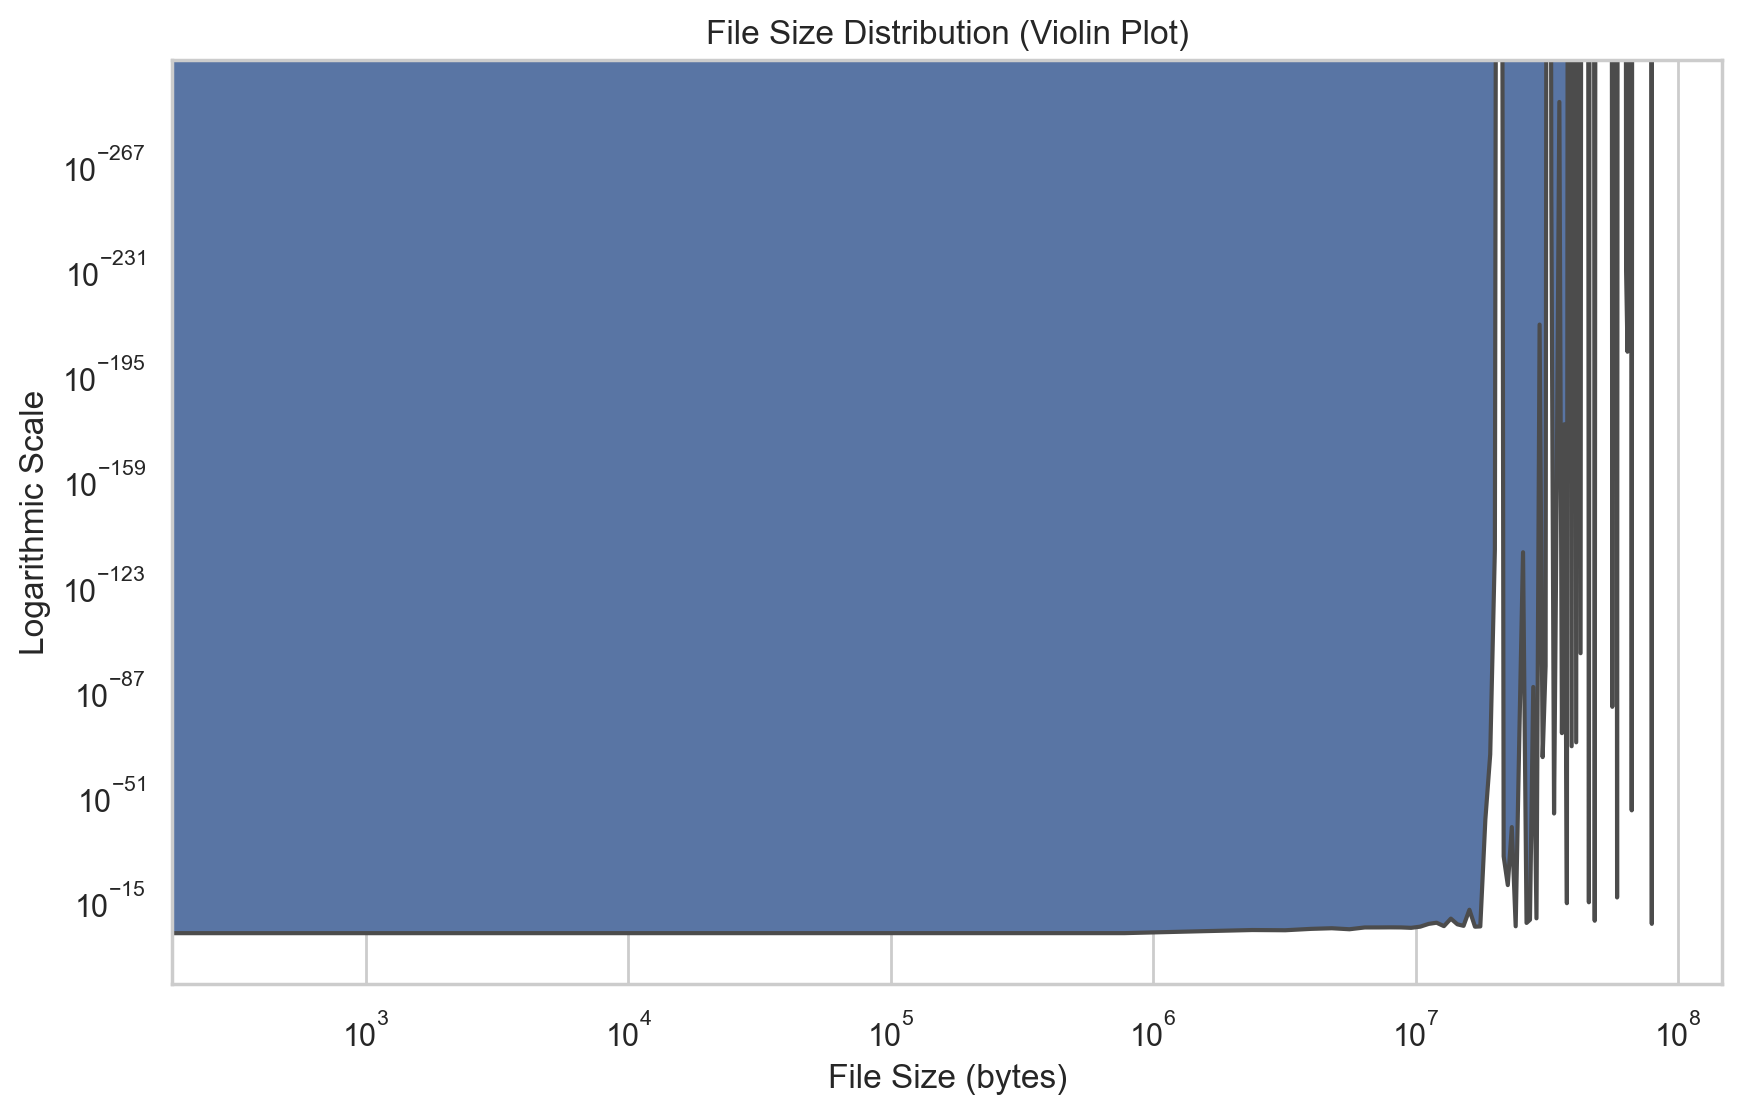

In [50]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='fileSize', data=df)
  # Set y-axis to logarithmic scale
plt.title('File Size Distribution (Violin Plot)')
plt.xlabel('File Size (bytes)')
plt.ylabel('Logarithmic Scale')
plt.yscale('log')
plt.xscale('log')
plt.show()

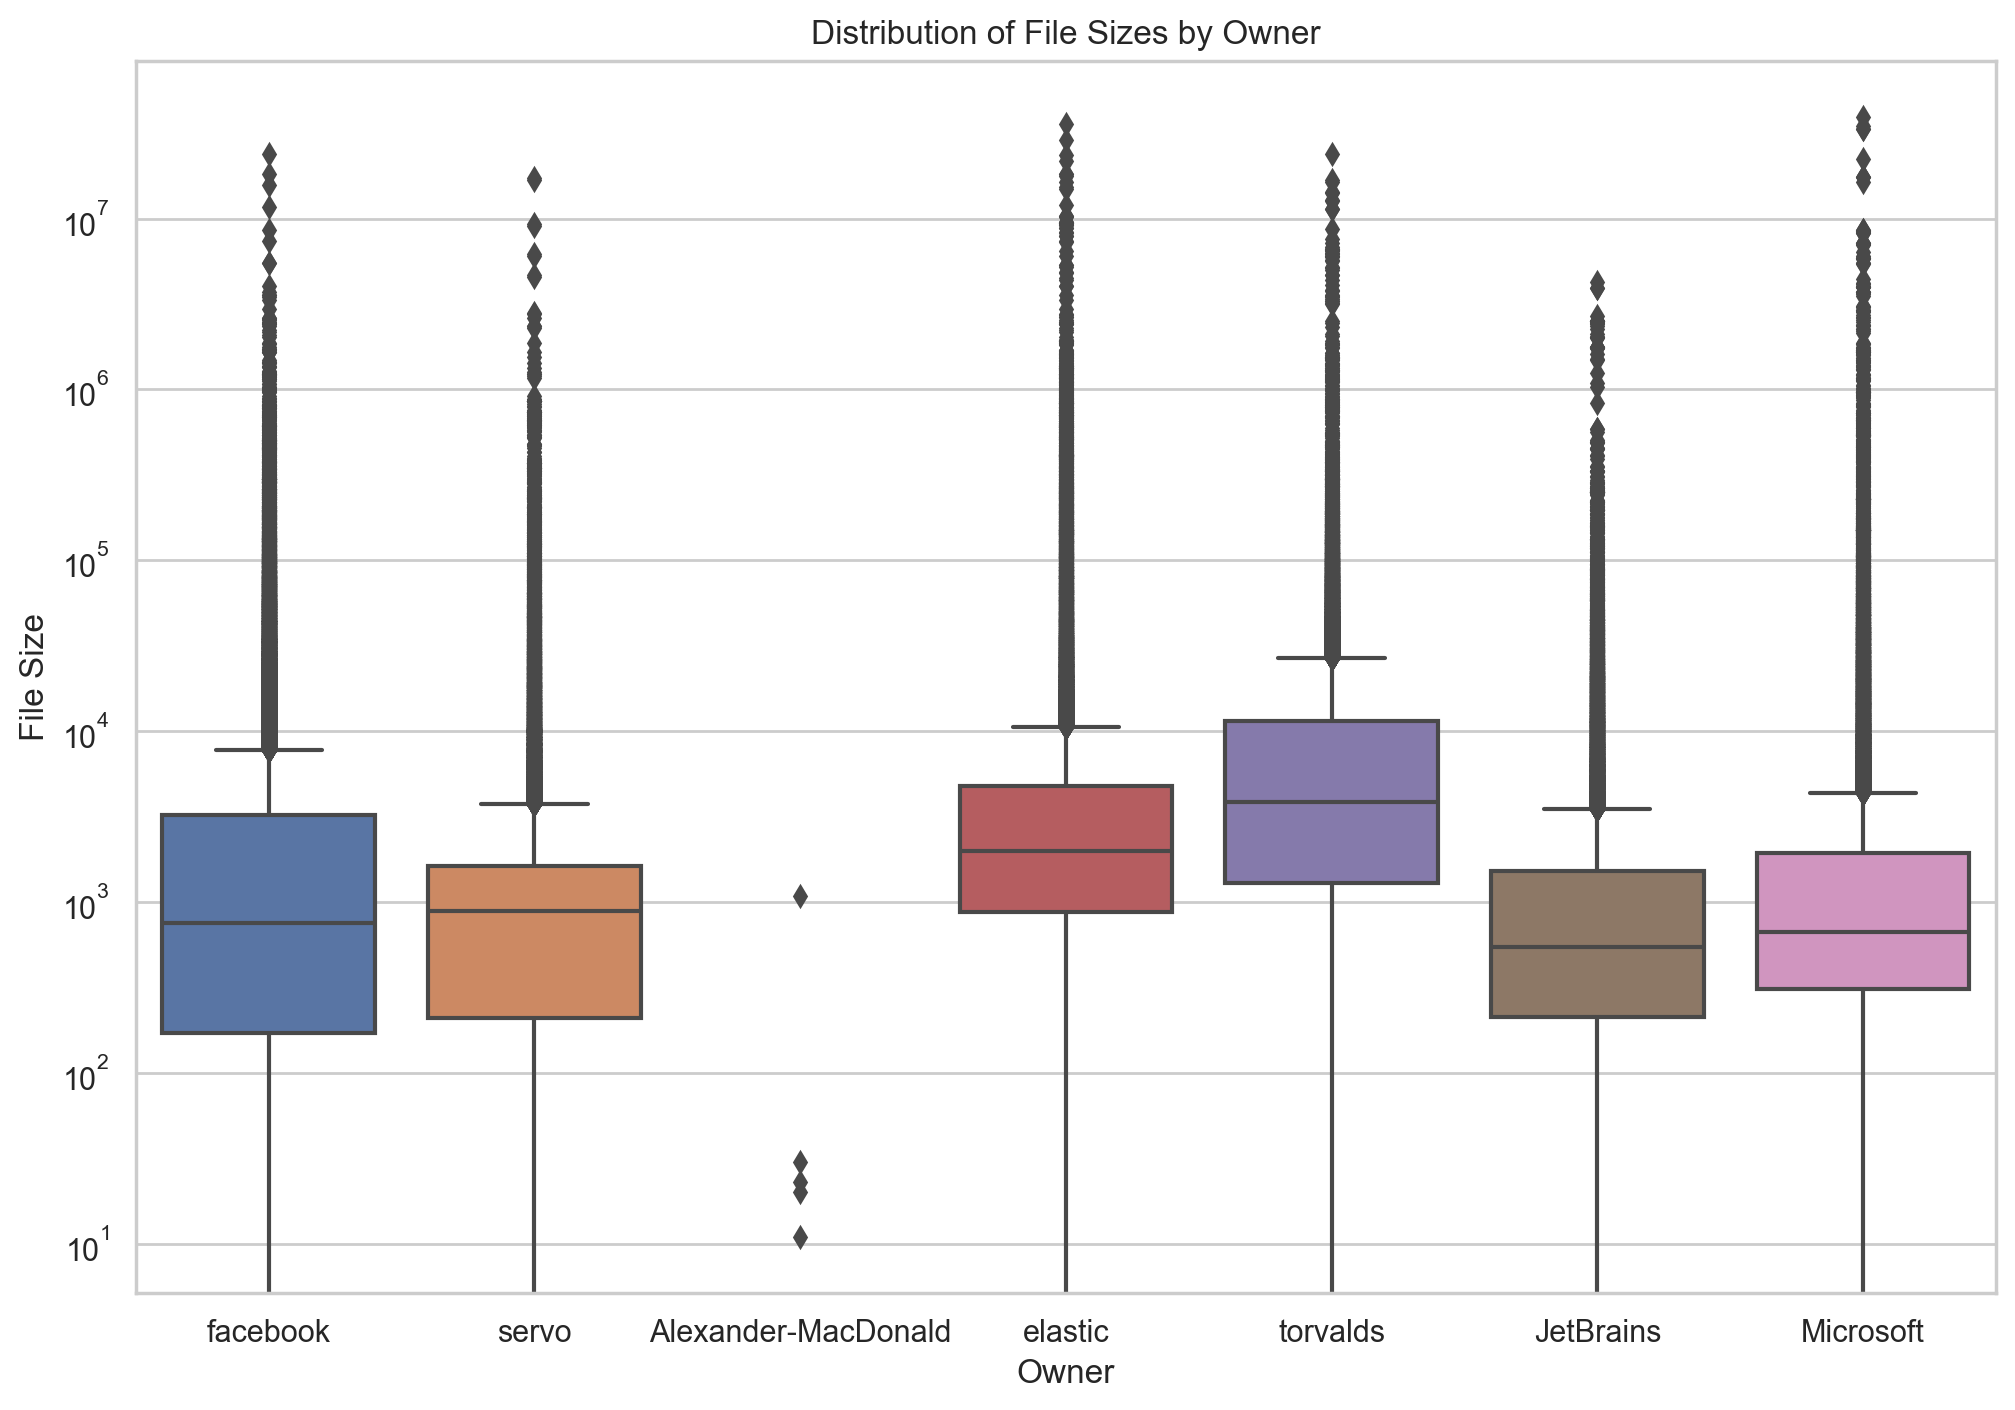

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

top_owners = df['owner'].value_counts().head(7).index
filtered_df = df[df['owner'].isin(top_owners)]

# Assuming df is your DataFrame
plt.figure(figsize=(12, 8))
sns.boxplot(x='owner', y='fileSize', data=filtered_df, order=top_owners)
plt.title('Distribution of File Sizes by Owner')
plt.xlabel('Owner')
plt.ylabel('File Size')
plt.yscale('log')

plt.show()


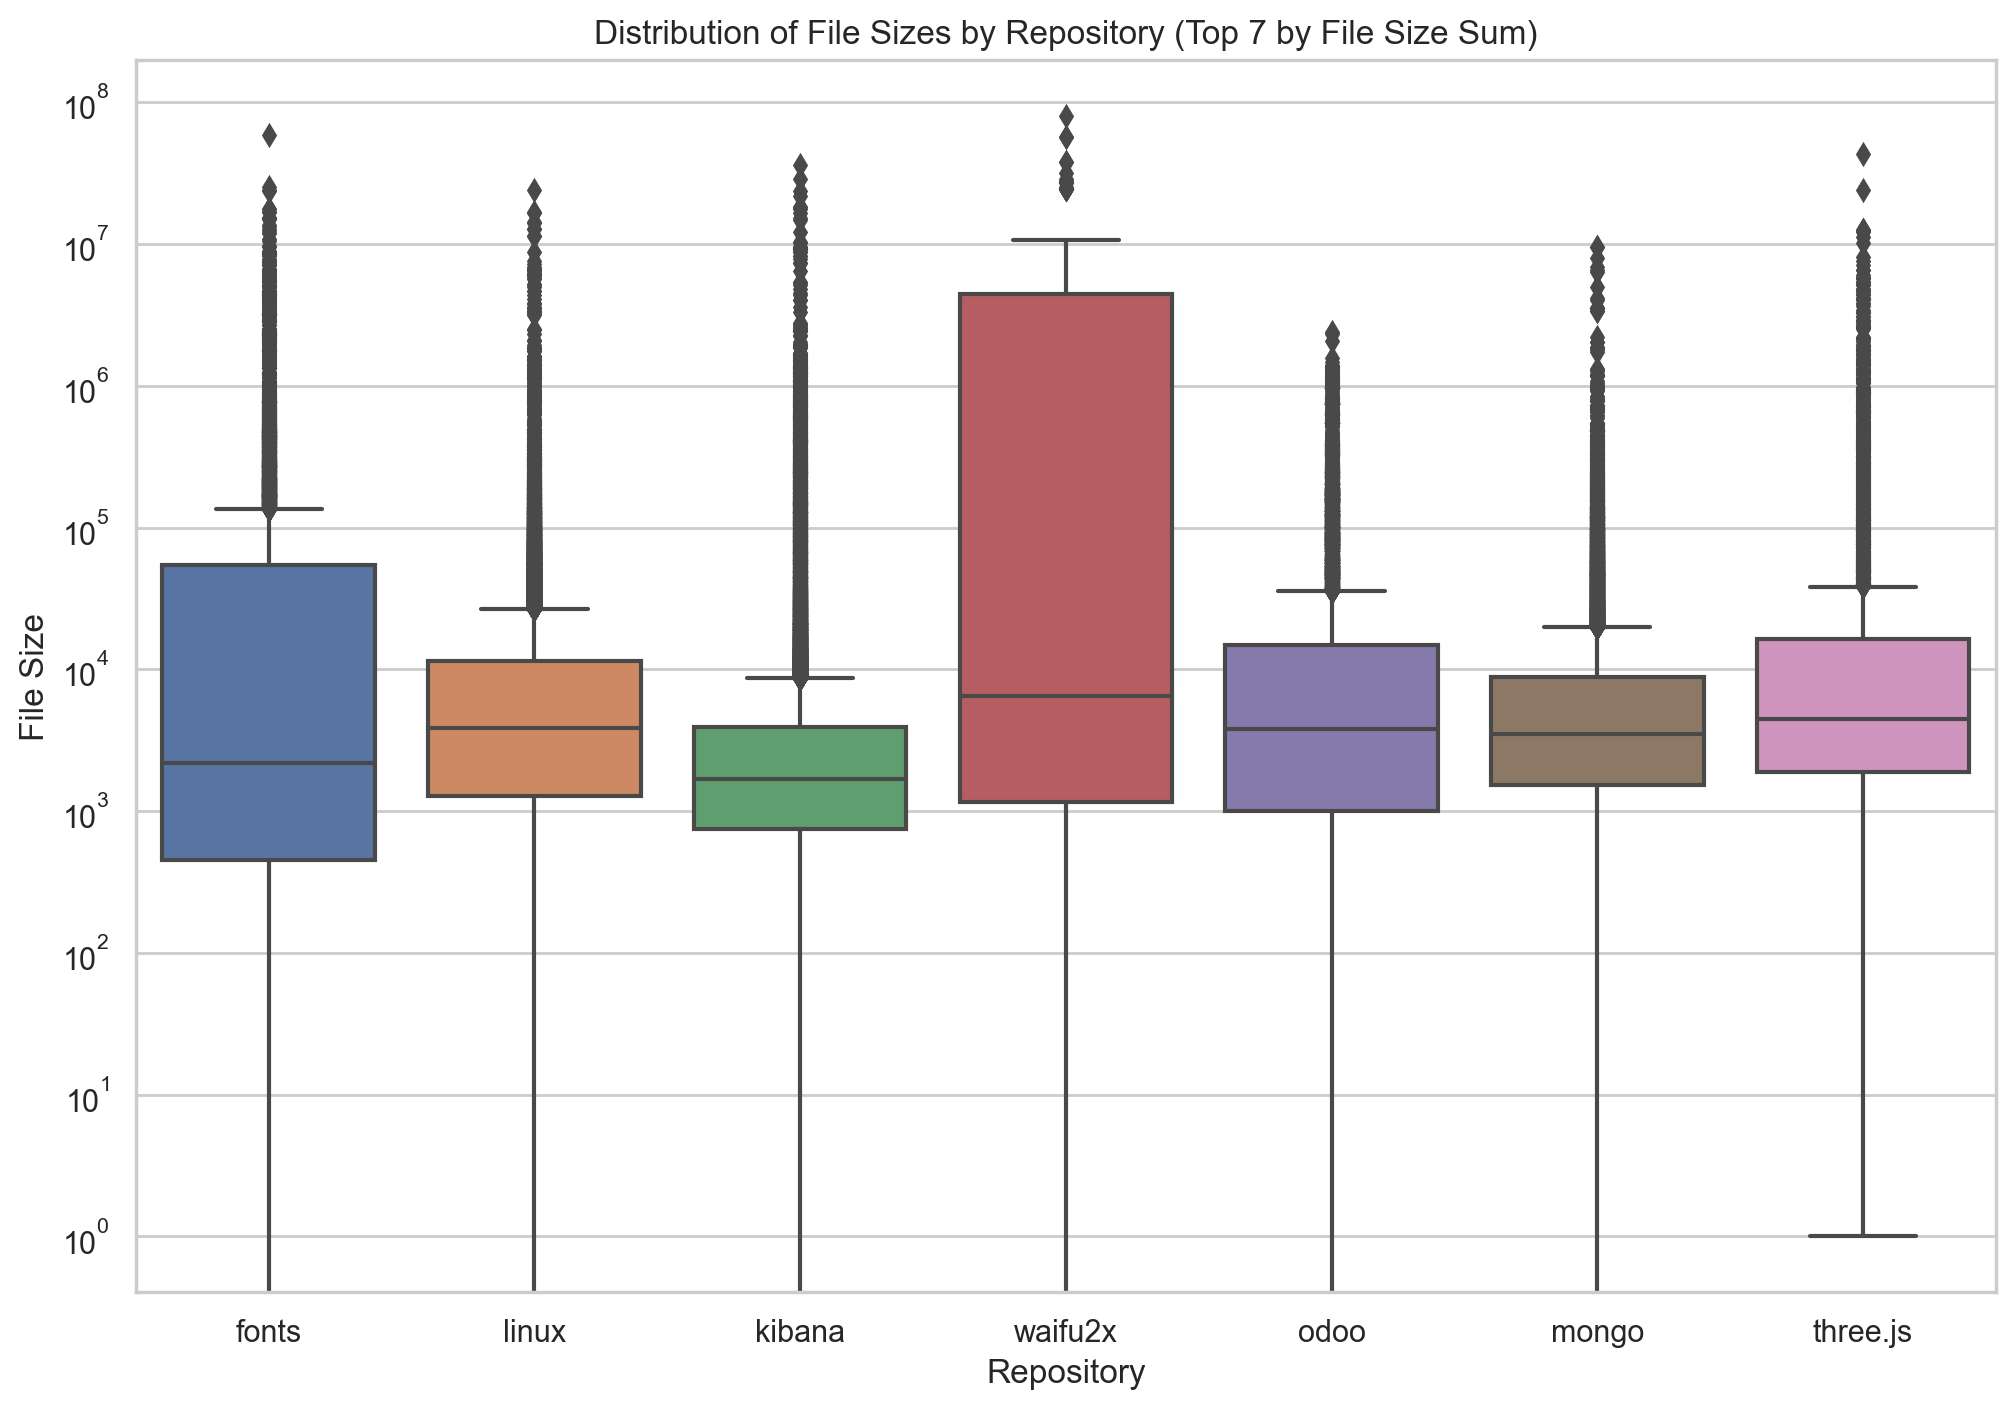

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the sum of file sizes for each repository
repo_file_size_sum = df.groupby('repo')['fileSize'].sum()

# Get the top 7 repositories by file size sum
top_repos = repo_file_size_sum.nlargest(7).index
filtered_df = df[df['repo'].isin(top_repos)]

# Assuming df is your DataFrame
plt.figure(figsize=(12, 8))
sns.boxplot(x='repo', y='fileSize', data=filtered_df, order=top_repos)
plt.title('Distribution of File Sizes by Repository (Top 7 by File Size Sum)')
plt.xlabel('Repository')
plt.ylabel('File Size')
plt.yscale('log')

plt.show()


In [54]:
top_owners

owner
facebook               155100
servo                  127066
Alexander-MacDonald    100005
elastic                 99928
torvalds                82439
JetBrains               82251
Microsoft               80631
DefinitelyTyped         73368
nodejs                  52960
gitlabhq                52166
Name: count, dtype: int64

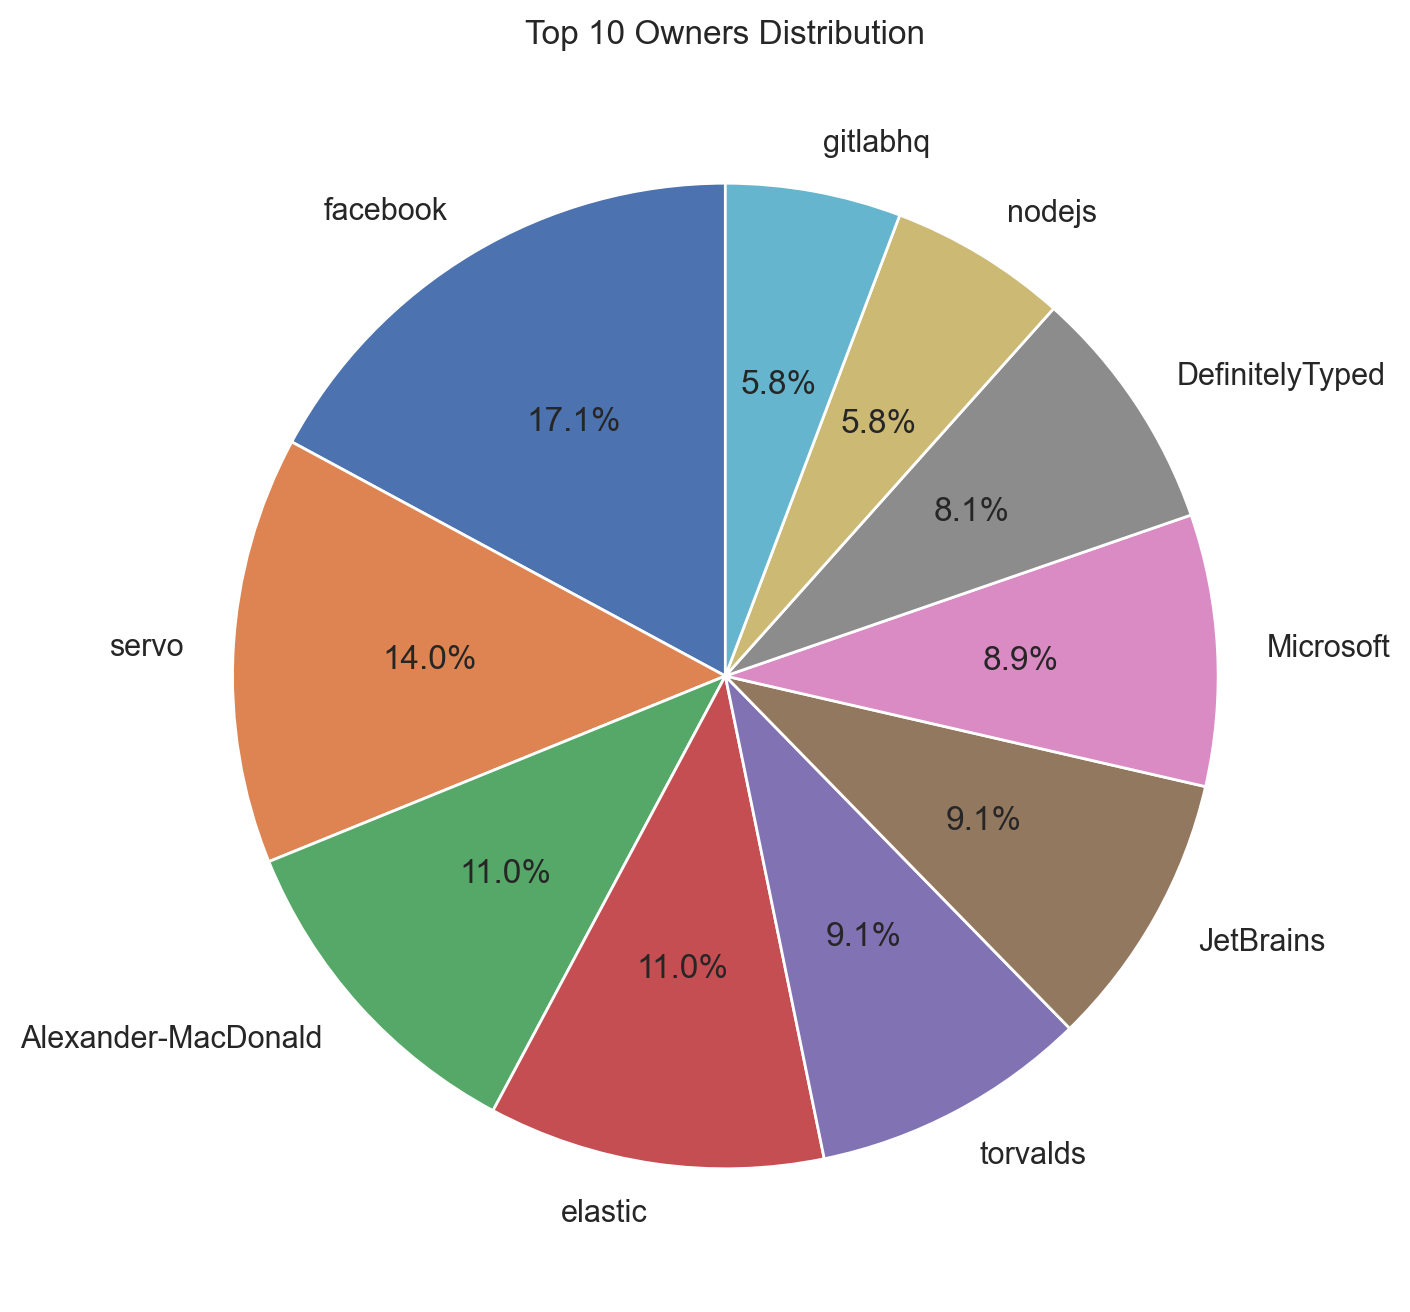

In [53]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
top_owners = df['owner'].value_counts().nlargest(10)

# Create a pie chart using matplotlib for the top 10 owners
plt.figure(figsize=(8, 8))
plt.pie(top_owners, labels=top_owners.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Owners Distribution')
plt.show()


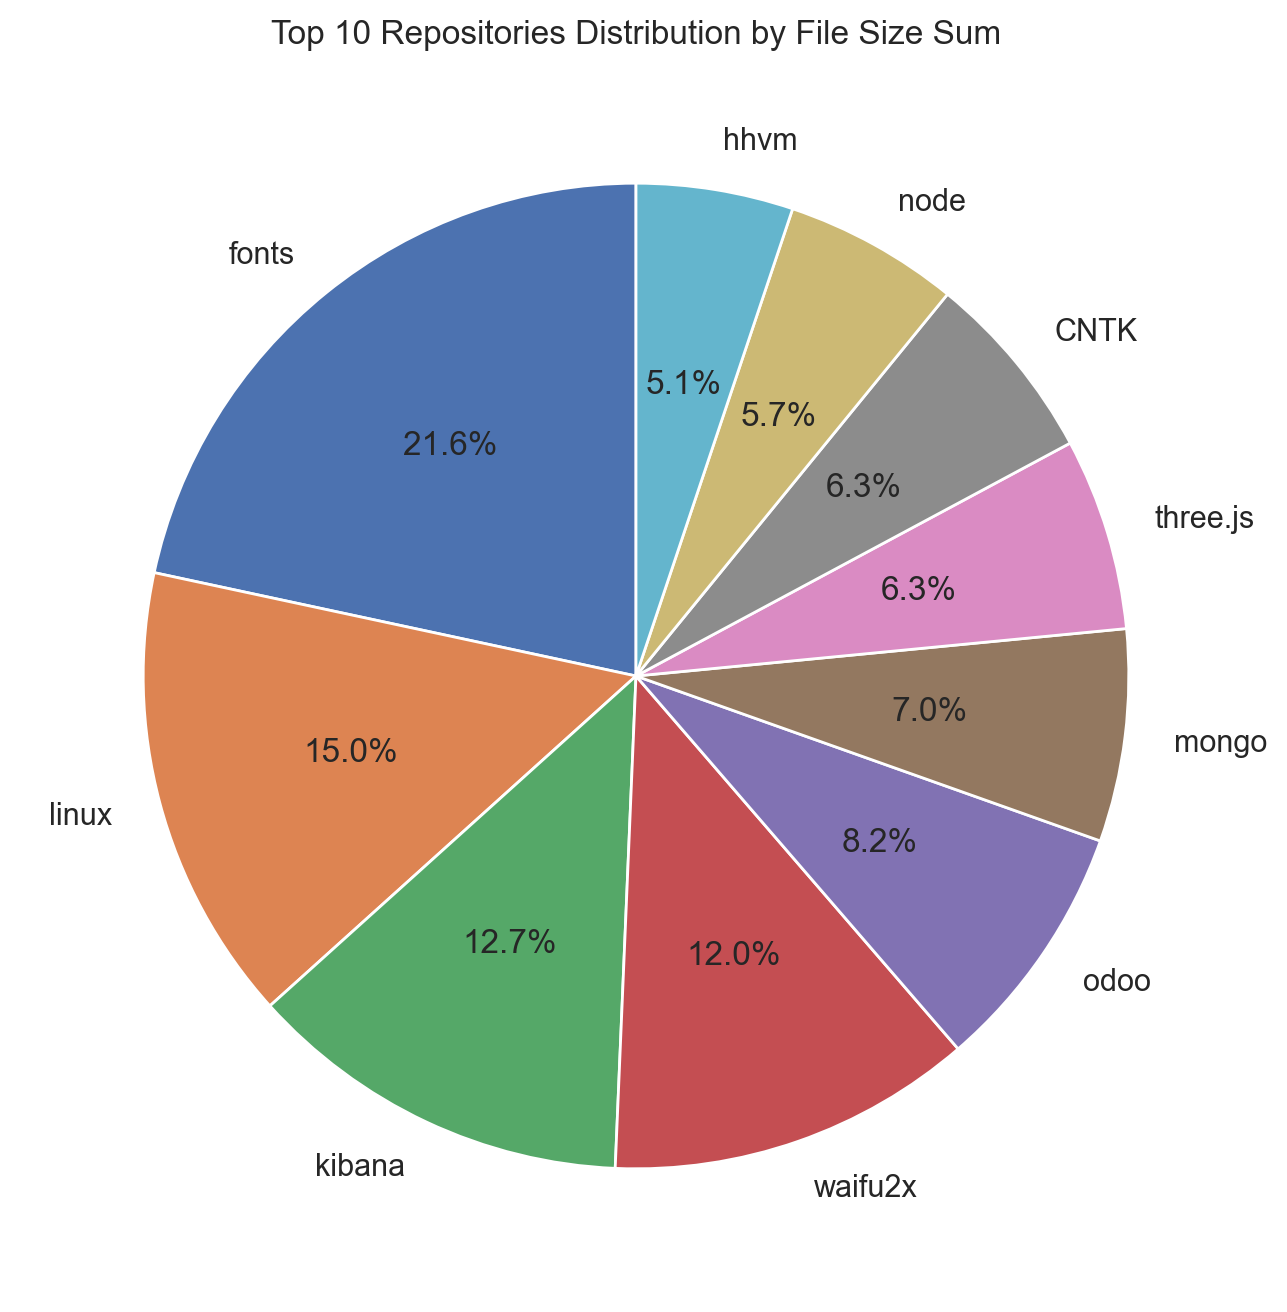

In [57]:
import matplotlib.pyplot as plt

# Calculate the sum of file sizes for each repository
repo_file_size_sum = df.groupby('repo')['fileSize'].sum()

# Get the top 10 repositories by file size sum
top_repos = repo_file_size_sum.nlargest(10)

# Create a pie chart using matplotlib for the top 10 repositories
plt.figure(figsize=(8, 8))
plt.pie(top_repos, labels=top_repos.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Repositories Distribution by File Size Sum')
plt.show()


In [58]:
# Categorize files
def categorize_file(file_path):
    if '/tests/' in file_path:
        return 'Test'
    elif '/docs/' in file_path or '/documentation/' in file_path:
        return 'Documentation'
    elif '/.github/' in file_path:
        return 'GitHub Configuration'
    else:
        return 'Code'

# Apply categorization
df['fileCategory'] = df['filePath'].apply(categorize_file)

# Calculate the ratio of code to documentation
code_count = df[df['fileCategory'] == 'Code'].shape[0]
documentation_count = df[df['fileCategory'] == 'Documentation'].shape[0]

ratio_code_to_documentation = code_count / documentation_count if documentation_count != 0 else 0

print(f"Number of code files: {code_count}")
print(f"Number of documentation files: {documentation_count}")
print(f"Ratio of code to documentation: {ratio_code_to_documentation:.2f}")

Number of code files: 1819331
Number of documentation files: 64272
Ratio of code to documentation: 28.31


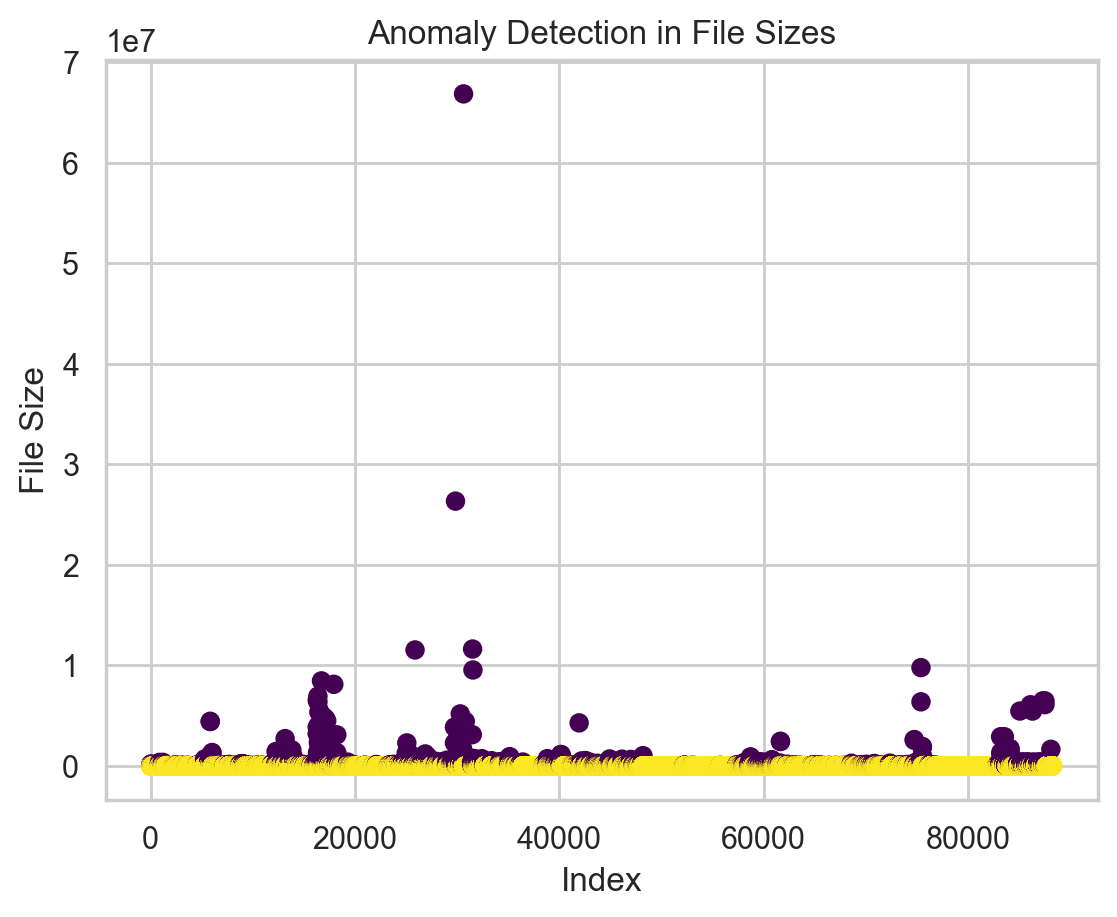

Rows with anomalies:
         owner    repo  \
3      alibaba   druid   
20     alibaba   druid   
21     alibaba   druid   
22     alibaba   druid   
23     alibaba   druid   
...        ...     ...   
87706    atech  postal   
87713    atech  postal   
88105    atech  postal   
88106    atech  postal   
88109    atech  postal   

                                                                      filePath  \
3                                        'main/.mvn/wrapper/maven-wrapper.jar'   
20              'main/core/src/main/java/com/alibaba/druid/filter/Filter.java'   
21       'main/core/src/main/java/com/alibaba/druid/filter/FilterAdapter.java'   
22         'main/core/src/main/java/com/alibaba/druid/filter/FilterChain.java'   
23     'main/core/src/main/java/com/alibaba/druid/filter/FilterChainImpl.java'   
...                                                                        ...   
87706                                 'main/app/assets/images/spinner-sub.gif'   
87713     

In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# Extract the 'fileSize' column for anomaly detection
file_sizes = df['fileSize'].values.reshape(-1, 1)

# Train the Isolation Forest model
model = IsolationForest(contamination=0.05)  # Adjust contamination based on your dataset
model.fit(file_sizes)

# Predict anomalies (outliers)
df['anomaly'] = model.predict(file_sizes)

# Visualize the results
plt.scatter(df.index, df['fileSize'], c=df['anomaly'], cmap='viridis')
plt.xlabel('Index')
plt.ylabel('File Size')
plt.title('Anomaly Detection in File Sizes')
plt.show()

# Display the rows with anomalies
anomalies = df[df['anomaly'] == -1]
print("Rows with anomalies:")
print(anomalies)


In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# Create a directed graph
G = nx.DiGraph()

# Add nodes for owners, repositories, and file paths
for _, row in df.iterrows():
    G.add_node(row['owner'])
    G.add_node(row['repo'])
    G.add_node(row['filePath'])

    # Add edges to represent relationships
    G.add_edge(row['owner'], row['repo'])
    G.add_edge(row['repo'], row['filePath'])

# Visualize the network graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # You can use different layout algorithms
nx.draw(G, pos, with_labels=True, font_size=8, node_size=700, font_color="black", font_weight="bold", alpha=0.8)
plt.title("Network Analysis of Owners, Repositories, and File Paths")
plt.show()


In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# Create a directed graph
G = nx.DiGraph()

# Add nodes for owners, repositories, and file paths
for _, row in df.iterrows():
    G.add_node(row['owner'])
    G.add_node(row['repo'])
    G.add_node(row['filePath'])

    # Add edges to represent relationships
    G.add_edge(row['owner'], row['repo'])
    G.add_edge(row['repo'], row['filePath'])

# Visualize the network graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # You can use different layout algorithms
nx.draw(G, pos, with_labels=True, font_size=8, node_size=700, font_color="black", font_weight="bold", alpha=0.8)
plt.title("Network Analysis of Owners, Repositories, and File Paths")
plt.show()


In [98]:
# Categorize files
def categorize_file(file_path):
    if '/tests/' in file_path:
        return 'Test'
    elif '/docs/' in file_path or '/documentation/' in file_path:
        return 'Documentation'
    elif '/.github/' in file_path:
        return 'GitHub Configuration'
    else:
        return 'Code'

# Apply categorization
flask['fileCategory'] = flask['filePath'].apply(categorize_file)

# Calculate the ratio of code to documentation
code_count = flask[flask['fileCategory'] == 'Code'].shape[0]
documentation_count = flask[flask['fileCategory'] == 'Documentation'].shape[0]

ratio_code_to_documentation = code_count / documentation_count if documentation_count != 0 else 0

print(f"Number of code files: {code_count}")
print(f"Number of documentation files: {documentation_count}")
print(f"Ratio of code to documentation: {ratio_code_to_documentation:.2f}")

Number of code files: 86
Number of documentation files: 86
Ratio of code to documentation: 1.00


In [51]:
flask = flask['owner'].value_counts().head(10)


KeyError: 'owner'

In [91]:
top_message = react['message'].value_counts().head(10)
top_message

message
Record sizes                                     21
Prettier                                         13
Fix typo                                          8
Fix lint                                          8
Update changelog                                  8
Update sizes                                      7
Update complementary-tools.md                     7
Updating dependencies for react-noop-renderer     7
Update README.md                                  6
Update CHANGELOG.md                               6
Name: count, dtype: int64

In [92]:
top_message = react['[files]'].value_counts().head(10)
top_message

[files]
['package.json']                                                                                 179
['CHANGELOG.md']                                                                                 164
['docs/docs/tutorial.md']                                                                        155
['README.md']                                                                                    114
['scripts/rollup/results.json']                                                                   56
['docs/docs/05-reusable-components.md']                                                           54
['.circleci/config.yml']                                                                          52
['src/core/ReactCompositeComponent.js', 'src/core/__tests__/ReactCompositeComponent-test.js']     51
['vendor/browser-transforms.js']                                                                  46
['.travis.yml']                                                                    

In [93]:
react['[files]'].nunique()

8468

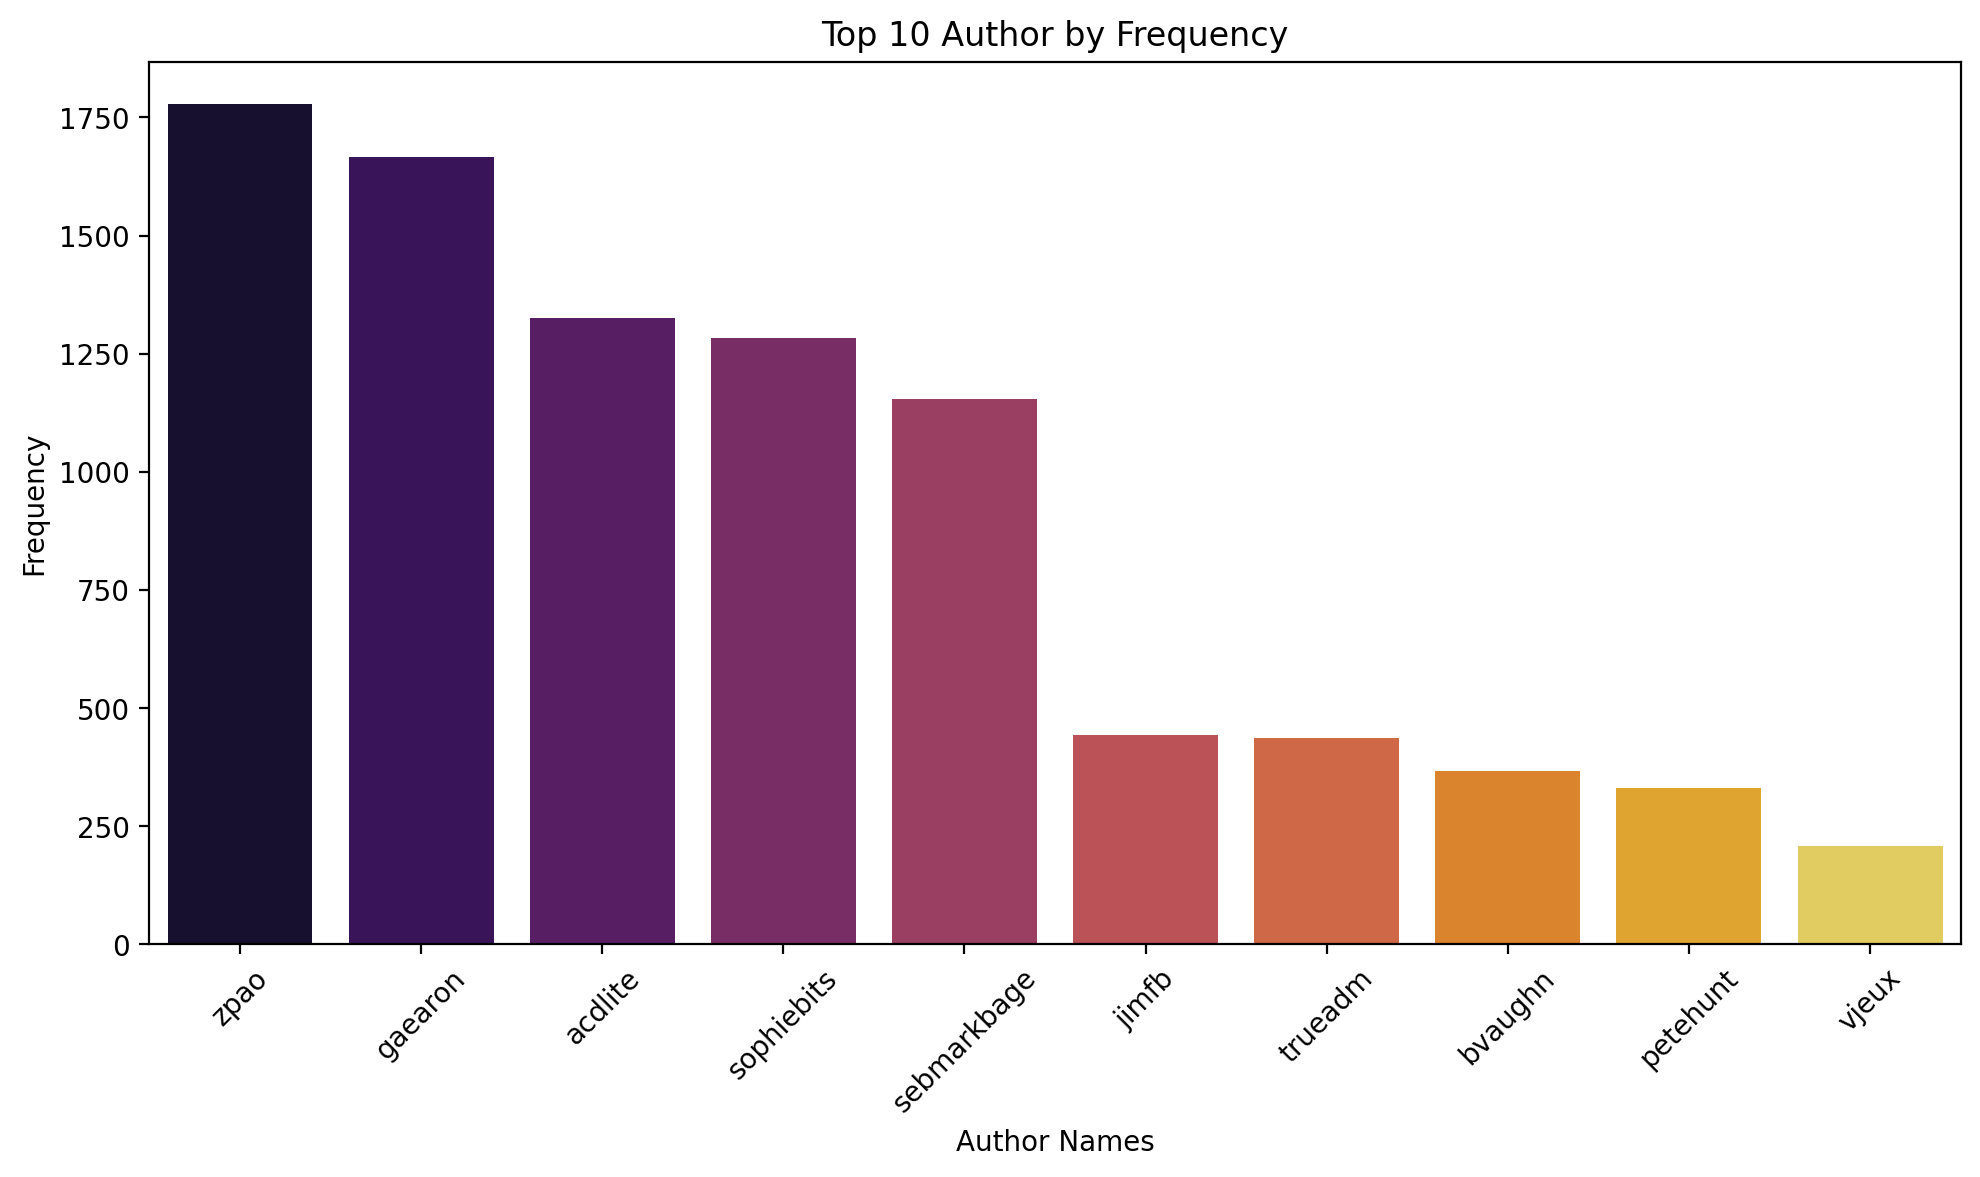

In [94]:
# Assuming 'react' is your DataFrame
top_10_artists = react['author'].value_counts().head(10).reset_index()
top_10_artists.columns = ['Author', 'Frequency']

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Author', y='Frequency', data=top_10_artists, palette="inferno")
plt.xticks(rotation=45)
plt.xlabel('Author Names')
plt.ylabel('Frequency')
plt.title('Top 10 Author by Frequency')
plt.tight_layout()
plt.show()


### Remove Outliers

In [95]:
from sklearn.ensemble import IsolationForest

features = [ 'additions', 'deletions', 'numfiles','net_code_change']

## We'll do a simple drop null for now
react = react.dropna()

## Create a training-test set
X = react[features]
X_train = X[:12000]  # Adjusting the training set size
X_test = X[1000:]    # It seems there might be an indexing issue here; it's assuming X[1000:] is the test set, let's adjust this.

## Fit Model
clf = IsolationForest(n_estimators=50, max_samples=100)
clf.fit(X_train)

## Get Scores
react['scores'] = clf.decision_function(X)
react['anomaly'] = clf.predict(X)

## Get Anomalies
outliers = react.loc[react['anomaly'] == -1]

outliers

author                      date  additions  deletions  \
2            gnoff 2023-09-27 17:03:57+00:00       6733         21   
3            gnoff 2023-09-27 16:53:31+00:00       1021        288   
4            gnoff 2023-09-26 16:59:39+00:00       1710        689   
5      sebmarkbage 2023-09-25 23:02:25+00:00        380         53   
8            hoxyq 2023-09-25 16:02:13+00:00        406        291   
...            ...                       ...        ...        ...   
15821       jeffmo 2013-06-06 21:40:30+00:00        457        440   
15879      benjamn 2013-06-03 17:58:01+00:00        241         79   
15888      benjamn 2013-05-28 20:10:50+00:00         92         36   
15955     petehunt 2013-05-30 11:11:07+00:00         52        226   
15983         zpao 2013-05-29 19:46:11+00:00      43123          0   

                                                 message  numfiles  \
2      [Flight] Implement `react-server-dom-turbopack...        68   
3      [Flight][Float] Preinitialize module imports d...        48   
4      [Fizz][Float] Refactor Resources  (#27400)  Re...        11   
5      [Fizz] Track postpones in fallbacks (#27421)  ...         3   
8      refactor[devtools/extension]: refactored messa...        14   
...                                                  ...       ...   
15821  Simplify Event Core  Summary: This makes a few...        15   
15879  Merge pull request #1 from benjamn/run-tests-i...        24   
15888  Use bin/jsx and browserify to build a jasmine ...        18   
15955                                more backbone fixes         5   
15983                             Initial public release       300   

                                                 [files]  net_code_change  \
2      ['.eslintrc.js', 'packages/react-client/src/fo...             6712   
3      ['fixtures/flight-esm/.nvmrc', 'fixtures/fligh...              733   
4      ['packages/react-dom-bindings/src/server/React...             1021   
5      ['packages/react-dom/src/__tests__/ReactDOMFiz...              327   
8      ['packages/react-devtools-extensions/src/backg...              115   
...                                                  ...              ...   
15821  ['src/core/ReactEventEmitter.js', 'src/core/Re...               17   
15879  ['Gruntfile.js', 'grunt/config/browserify.js',...              162   
15888  ['Gruntfile.js', 'grunt/config/browserify.js',...               56   
15955  ['examples/todomvc-backbone/css/base.css', 'ex...             -174   
15983  ['.editorconfig', '.gitignore', '.jshintrc', '...            43123   

         scores  anomaly  
2     -0.290302       -1  
3     -0.243296       -1  
4     -0.233506       -1  
5     -0.035231       -1  
8     -0.097238       -1  
...         ...      ...  
15821 -0.137380       -1  
15879 -0.112501       -1  
15888 -0.027449       -1  
15955 -0.058620       -1  
15983 -0.327841       -1  

[1772 rows x 10 columns]

In [96]:
react['anomaly'].value_counts()

anomaly
 1    12351
-1     1772
Name: count, dtype: int64

In [97]:
react = react.drop(react[react['anomaly'] == -1].index)
react= react.drop(columns=['anomaly','scores'])

In [98]:
#react
# Dropping columns that could lead to data leakage
df_react= react.drop(columns=['author','date', 'message','[files]'])

In [99]:
df_react.head(2)

additions  deletions  numfiles  net_code_change
0          0          1         1               -1
1          1          0         1                1

In [100]:
df_react.describe()

additions     deletions      numfiles  net_code_change
count  12351.000000  12351.000000  12351.000000     12351.000000
mean      33.866489     14.140393      2.479718        19.726095
std       53.535679     27.544620      2.405370        47.104206
min        0.000000      0.000000      0.000000      -141.000000
25%        2.000000      1.000000      1.000000         0.000000
50%       10.000000      3.000000      1.000000         2.000000
75%       42.000000     13.000000      3.000000        22.000000
max      330.000000    223.000000     18.000000       329.000000

In [101]:
corr = df_react.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps

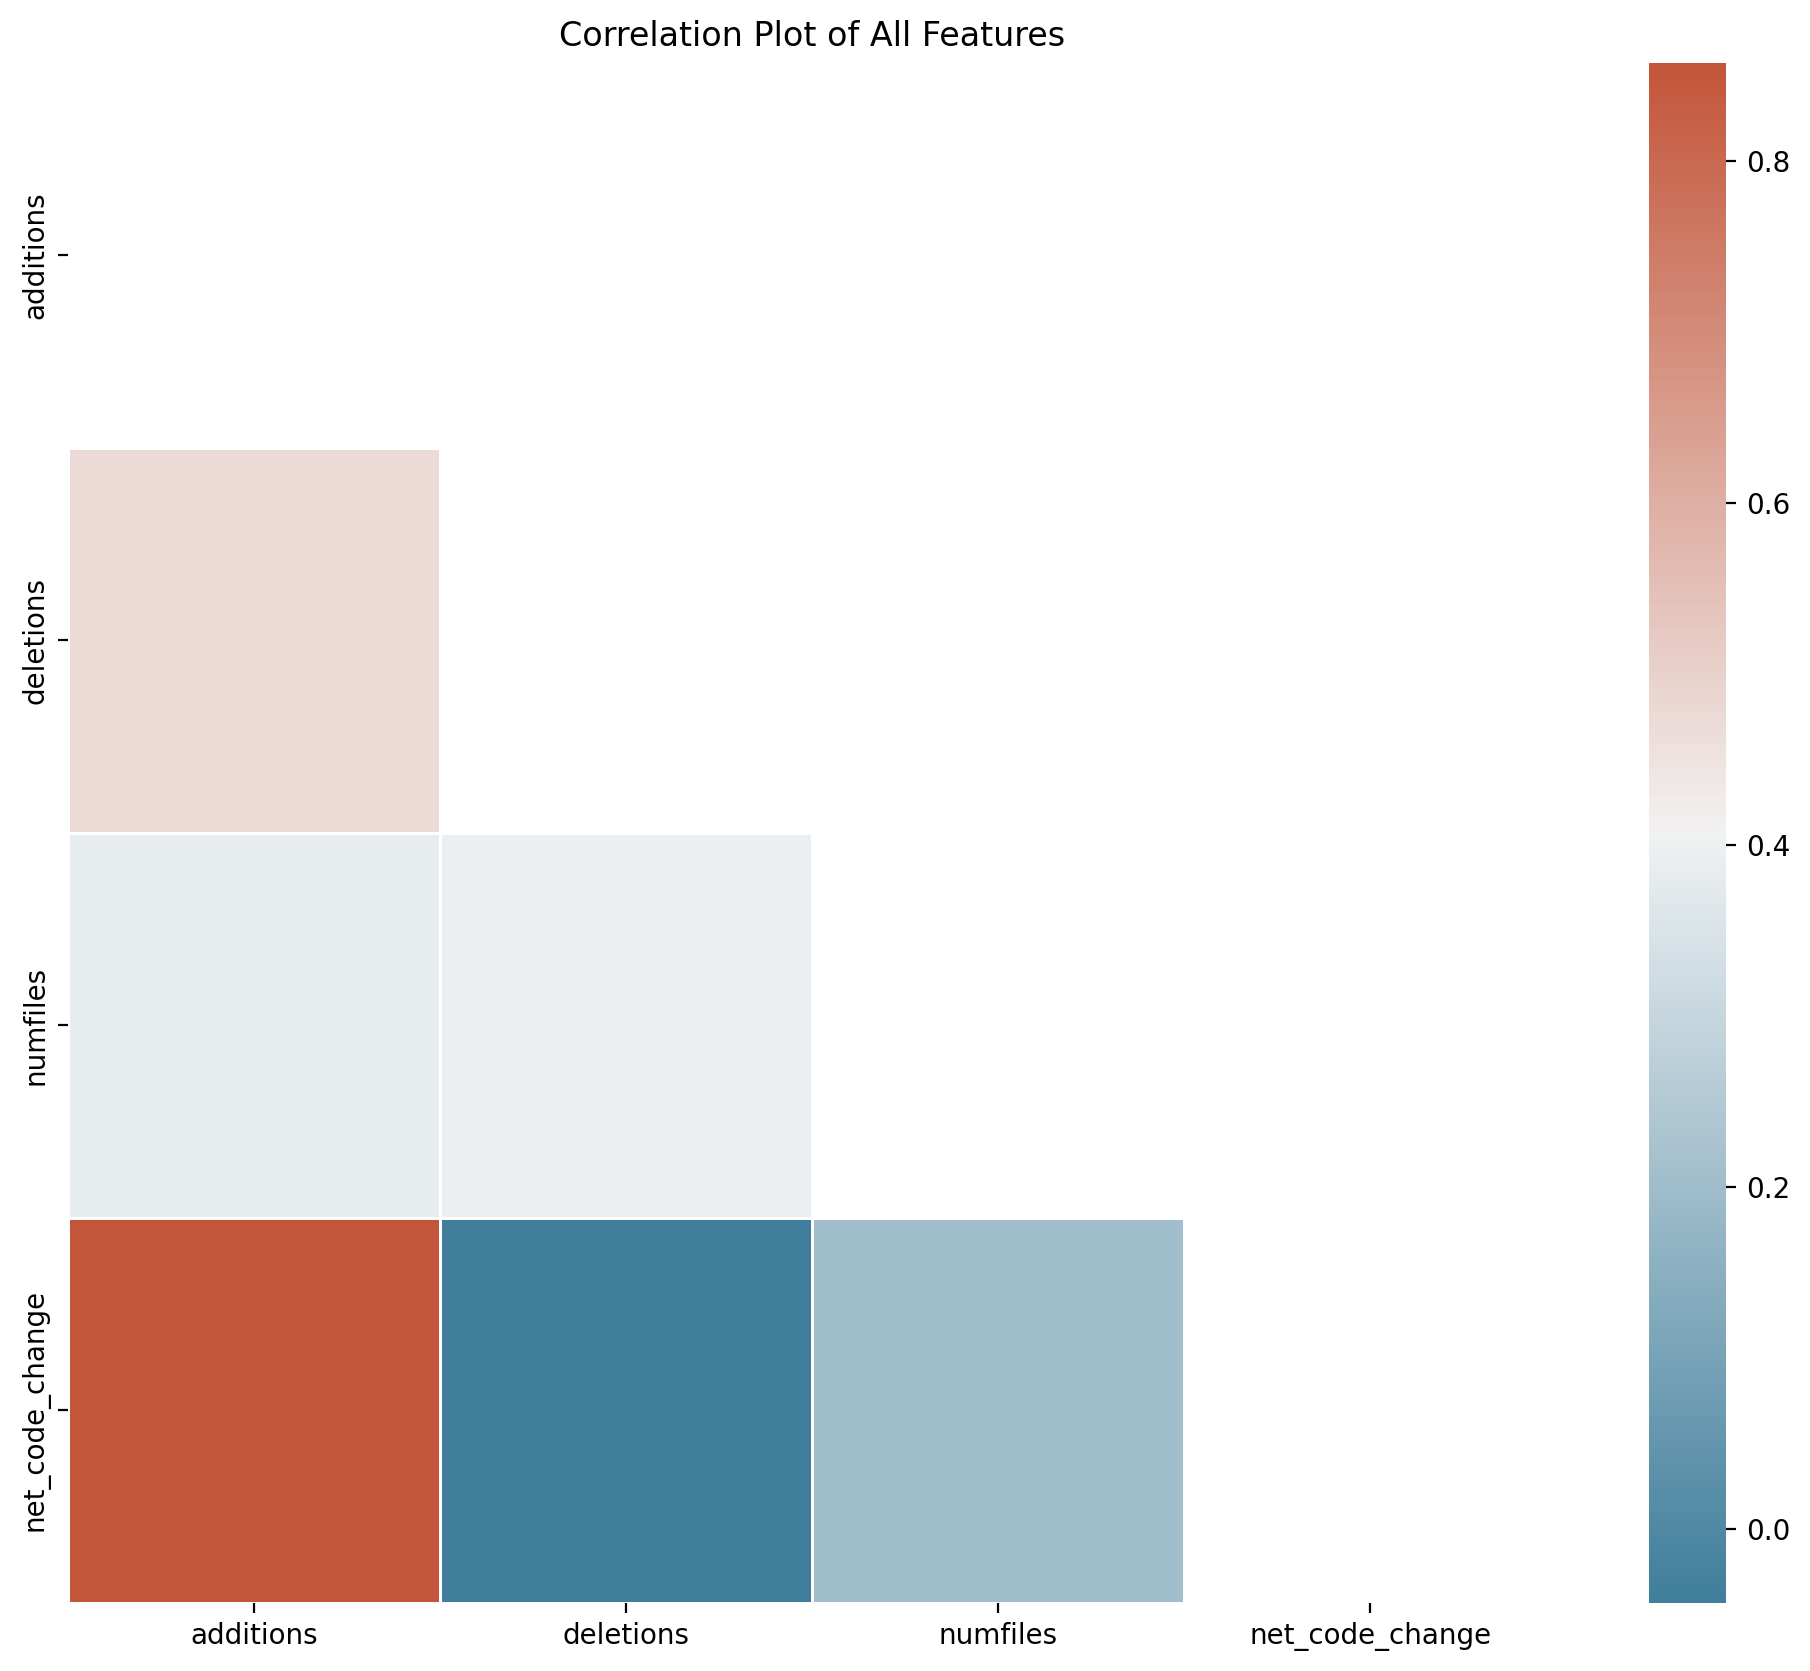

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix for all numerical features in your DataFrame
corr = df_react.corr()

# Set up the matplotlib figure and adjust its size
plt.figure(figsize=(12, 10))

# Generate a mask for the upper triangle (otherwise this looks like the square we had above and is redundant)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, fmt=".2f", linewidths=.5)

plt.title('Correlation Plot of All Features')
plt.show()



In [103]:
df_react.describe()

additions     deletions      numfiles  net_code_change
count  12351.000000  12351.000000  12351.000000     12351.000000
mean      33.866489     14.140393      2.479718        19.726095
std       53.535679     27.544620      2.405370        47.104206
min        0.000000      0.000000      0.000000      -141.000000
25%        2.000000      1.000000      1.000000         0.000000
50%       10.000000      3.000000      1.000000         2.000000
75%       42.000000     13.000000      3.000000        22.000000
max      330.000000    223.000000     18.000000       329.000000

In [104]:
df_react.columns

Index(['additions', 'deletions', 'numfiles', 'net_code_change'], dtype='object')

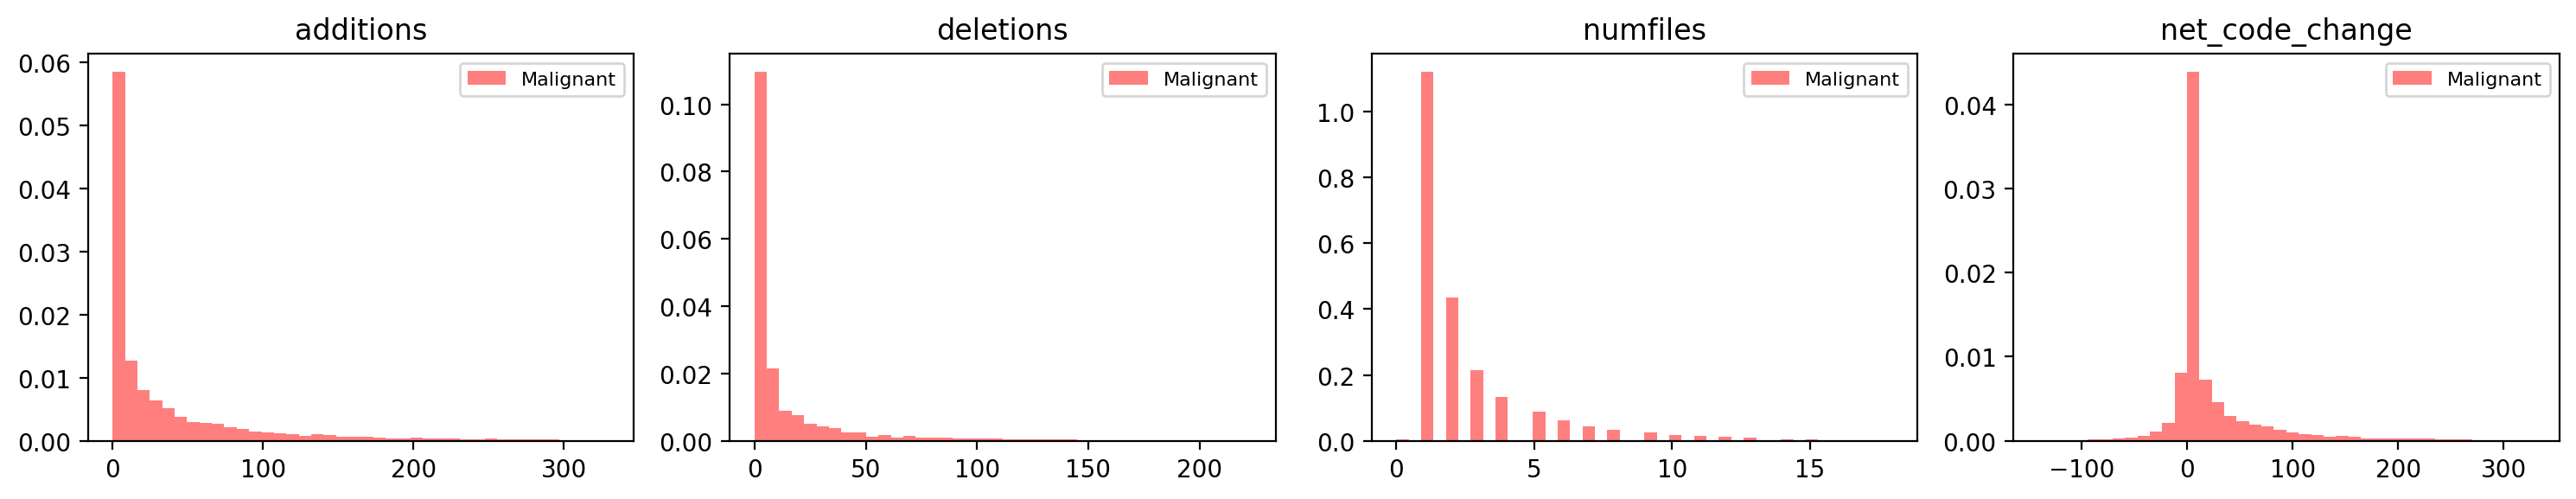

In [105]:
import numpy as np
import matplotlib.pyplot as plt

_, axes = plt.subplots(1, 4, figsize=(15, 3))

malignant = df_react

ax = axes.ravel()  # flatten the 2D array

for i in range(4):  # Display the first four subplots
    bins = 40
    ax[i].hist(malignant.iloc[:, i], bins=bins, color='r', alpha=0.5, label='Malignant', density=True)
    ax[i].set_title(df_react.columns[i], fontsize=12)
    ax[i].legend(loc='best', fontsize=8)

plt.tight_layout()
plt.show()


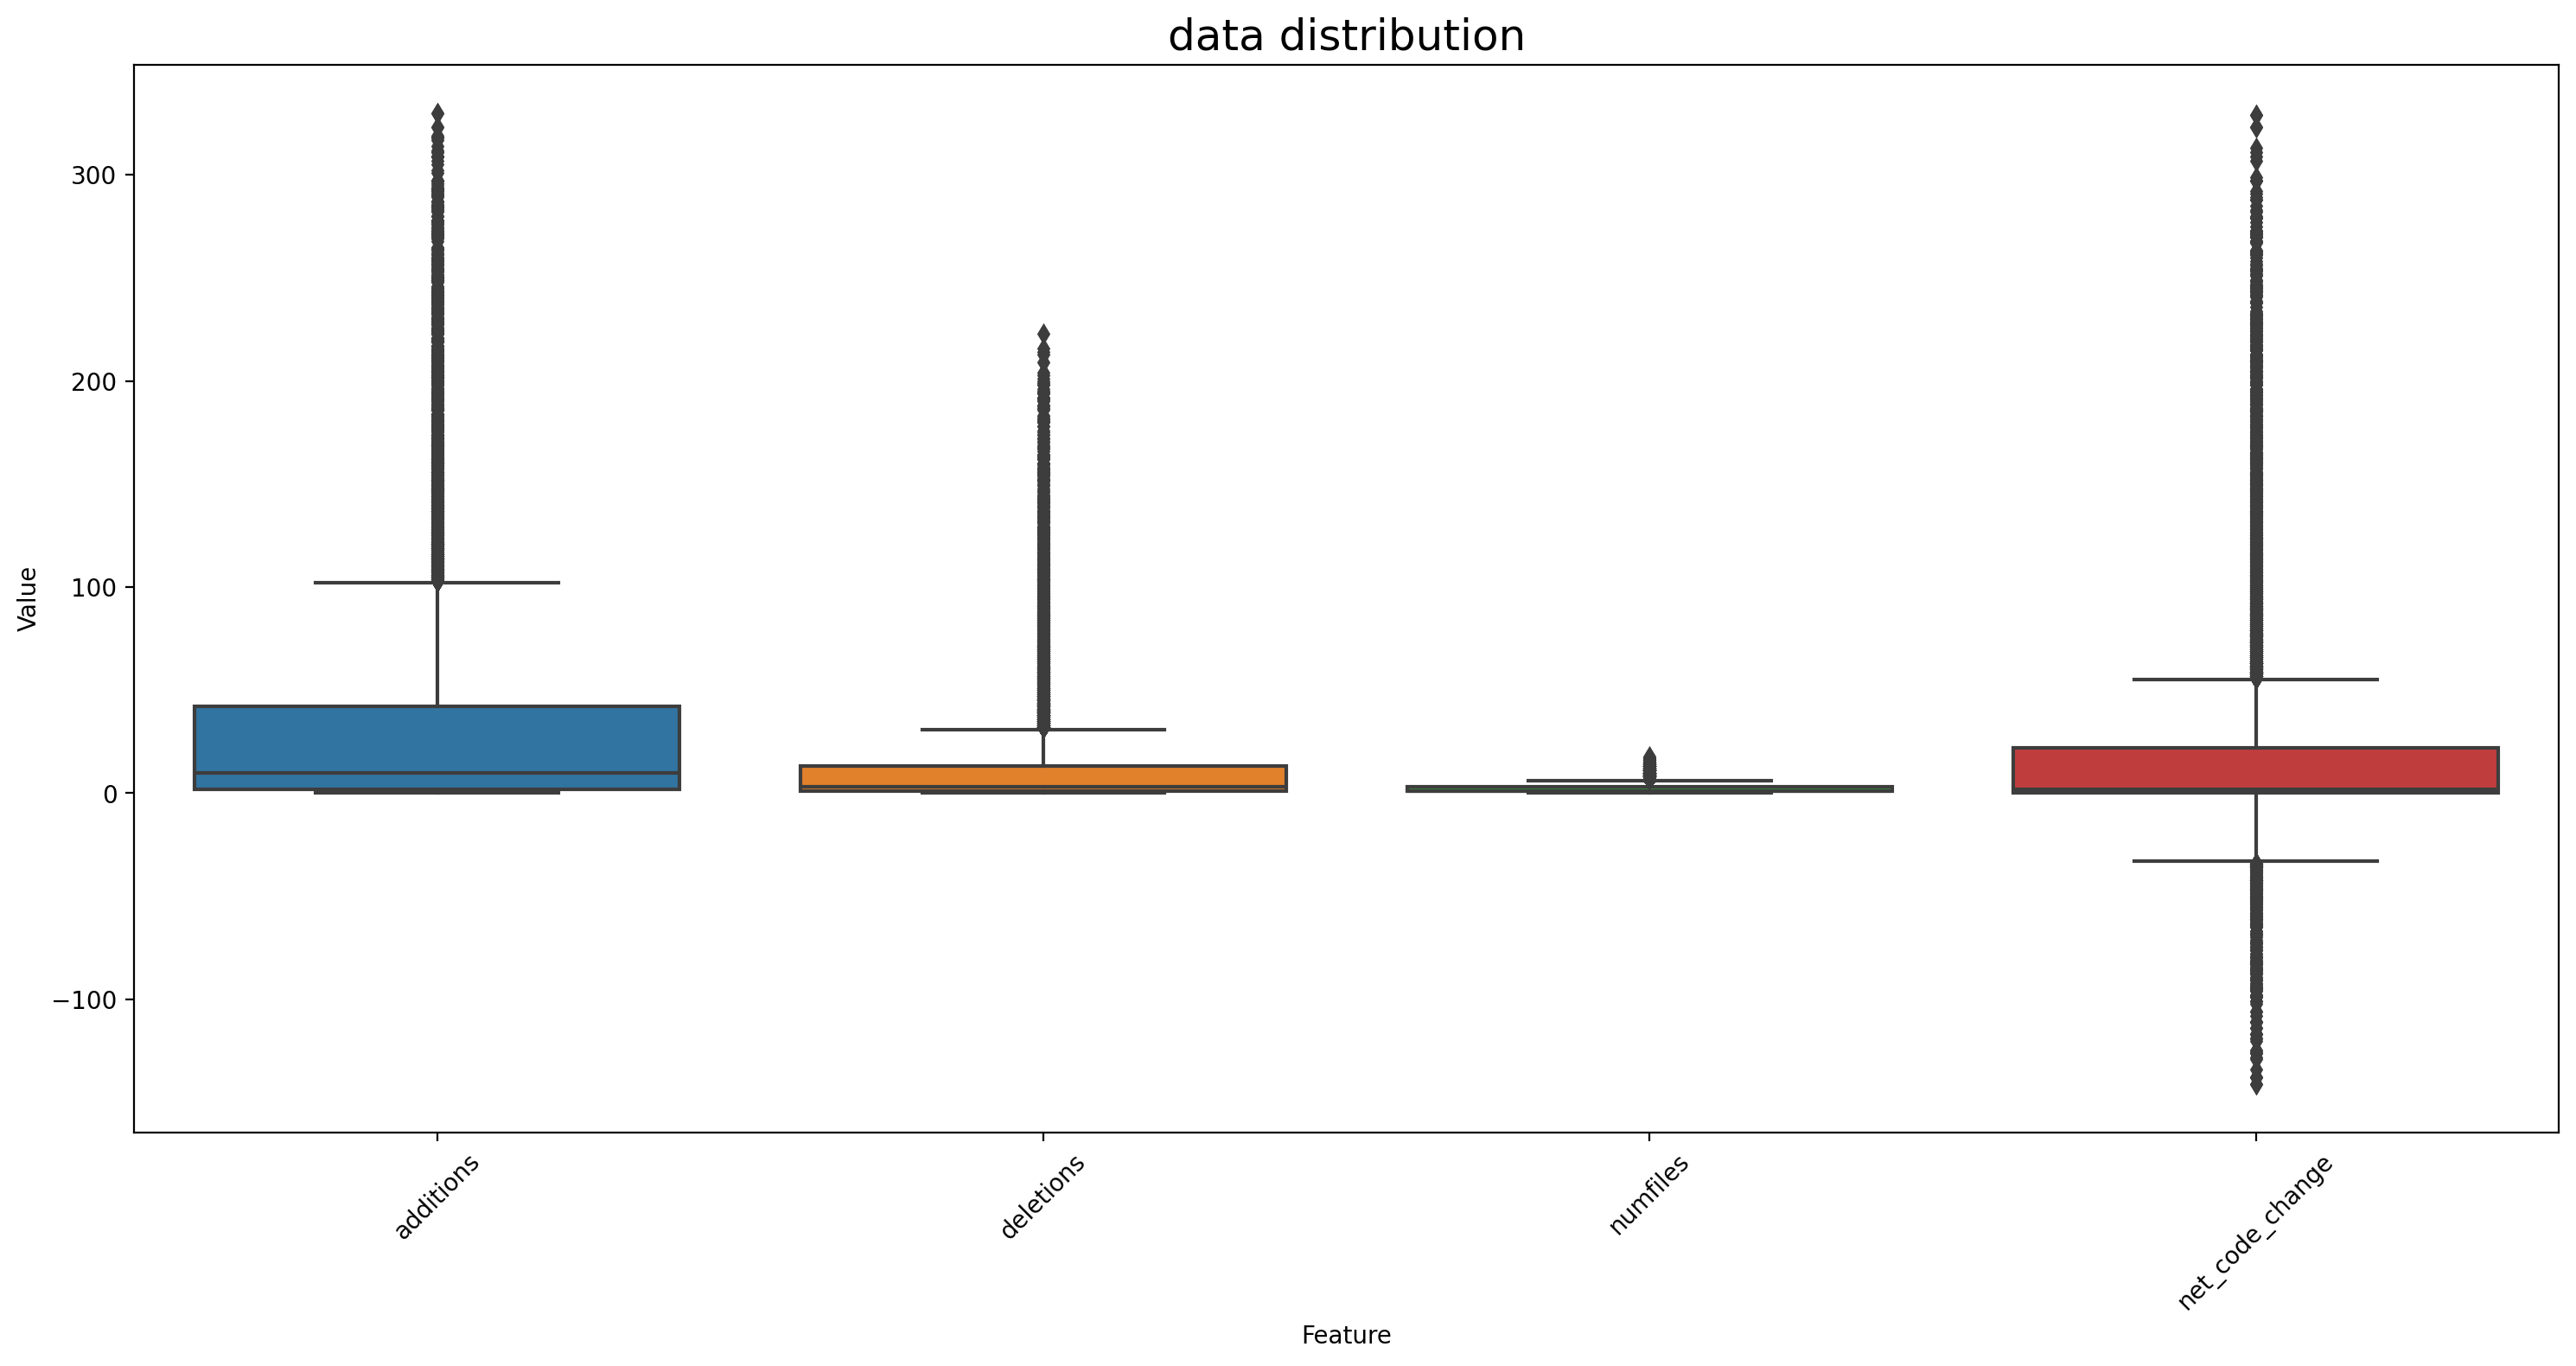

In [106]:
df_num_dis= df_react

# Stacking the data for a single box plot
stacked_data = df_num_dis.melt(var_name='Feature', value_name='Value')

# Create a single box plot
plt.figure(figsize=(15, 8))  # Adjust the figure size as needed
sns.boxplot(data=stacked_data, x='Feature', y='Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('data distribution',size=18)
plt.tight_layout()
plt.show()


{'bodies': [<matplotlib.collections.PolyCollection at 0x22a9743ff70>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x22a9743feb0>,
 'cmins': <matplotlib.collections.LineCollection at 0x22a96976070>,
 'cbars': <matplotlib.collections.LineCollection at 0x22a969764f0>}

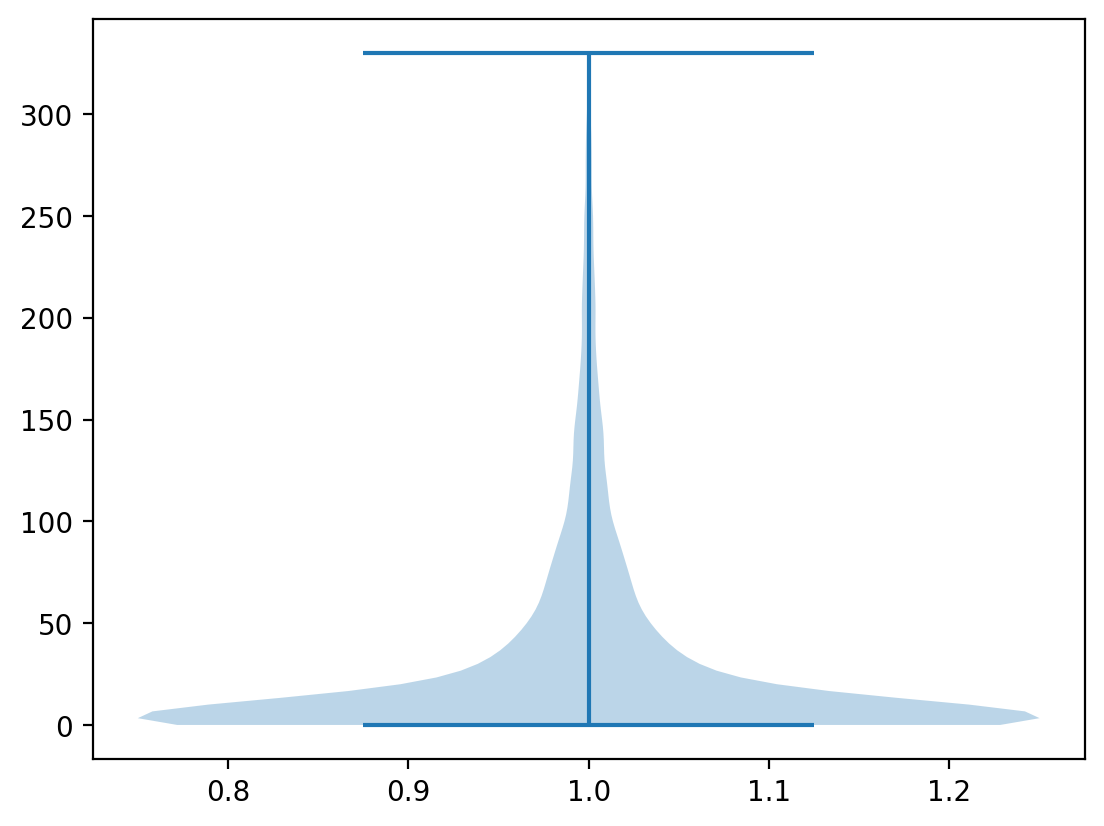

In [107]:
plt.violinplot(df_react['additions'])

In [108]:
df_react.head()

additions  deletions  numfiles  net_code_change
0          0          1         1               -1
1          1          0         1                1
6         27         10         8               17
7         18         18         1                0
9         64          9         2               55

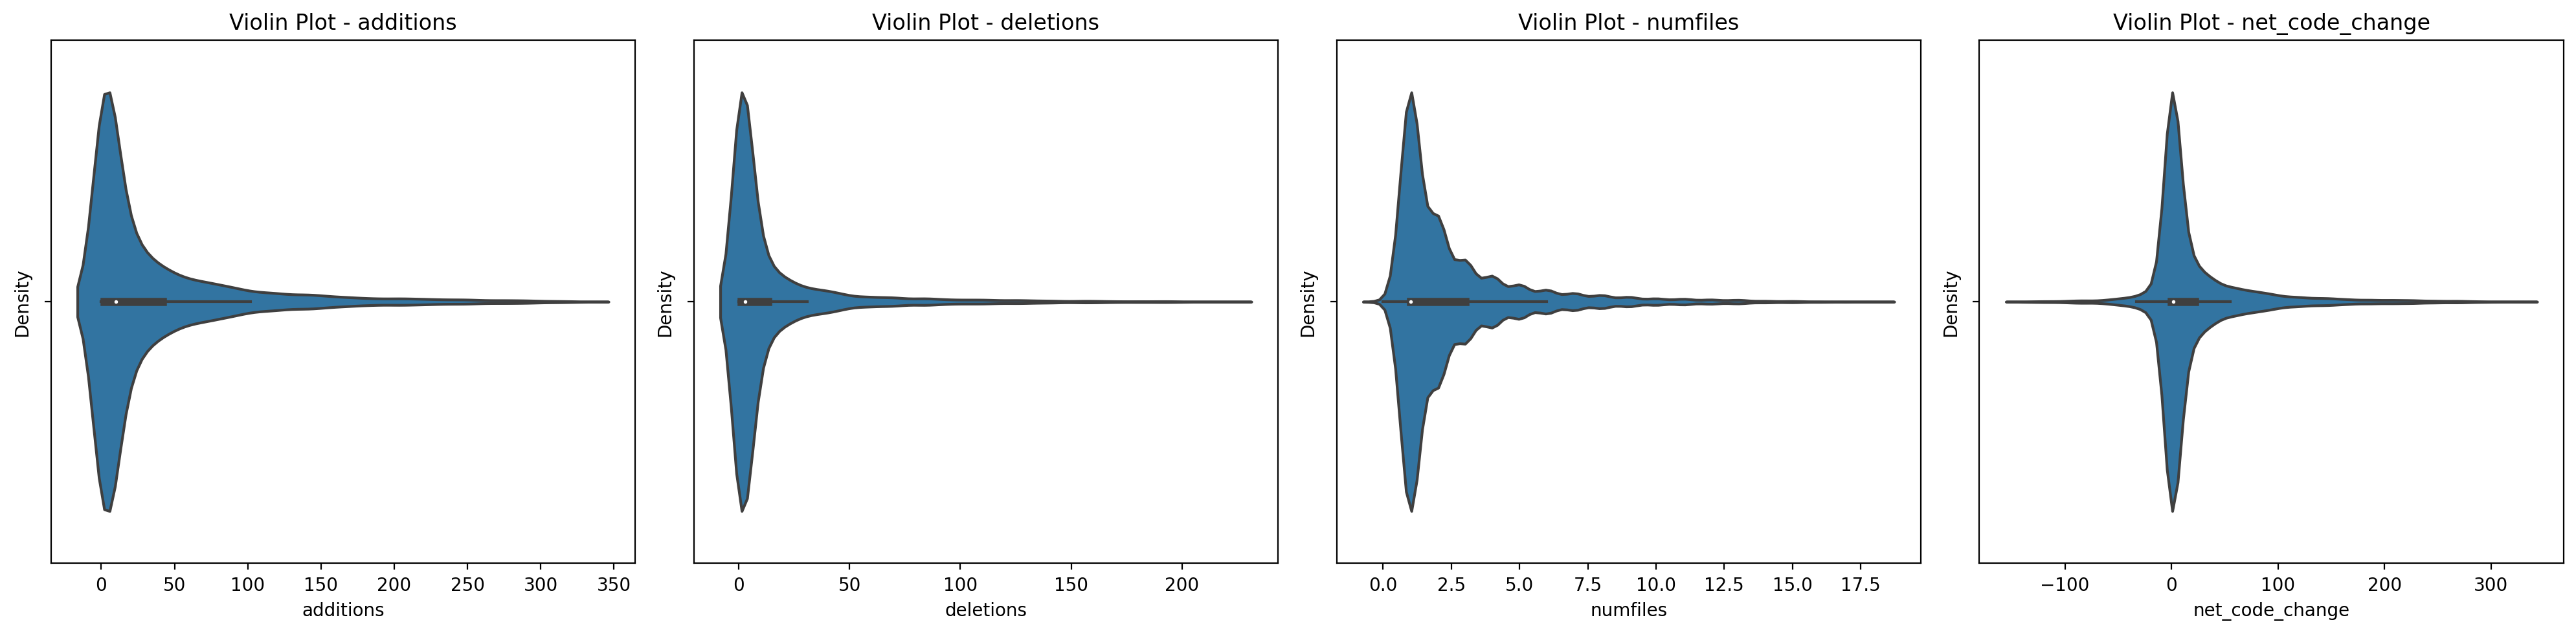

In [109]:
#violin plots
fig, axes = plt.subplots(1, 4, figsize=(20, 5))  # Five subplots for five violin plots

# Plot multiple violin plots
sns.violinplot(x=df_react["additions"], ax=axes[0])
axes[0].set_title('Violin Plot - additions')
axes[0].set_xlabel('additions')
axes[0].set_ylabel('Density')

sns.violinplot(x=df_react["deletions"], ax=axes[1])
axes[1].set_title('Violin Plot - deletions')
axes[1].set_xlabel('deletions')
axes[1].set_ylabel('Density')

sns.violinplot(x=df_react["numfiles"], ax=axes[2])
axes[2].set_title('Violin Plot - numfiles')
axes[2].set_xlabel('numfiles')
axes[2].set_ylabel('Density')

sns.violinplot(x=df_react["net_code_change"], ax=axes[3])
axes[3].set_title('Violin Plot - net_code_change')
axes[3].set_xlabel('net_code_change')
axes[3].set_ylabel('Density')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

In [110]:
df_react.describe()


additions     deletions      numfiles  net_code_change
count  12351.000000  12351.000000  12351.000000     12351.000000
mean      33.866489     14.140393      2.479718        19.726095
std       53.535679     27.544620      2.405370        47.104206
min        0.000000      0.000000      0.000000      -141.000000
25%        2.000000      1.000000      1.000000         0.000000
50%       10.000000      3.000000      1.000000         2.000000
75%       42.000000     13.000000      3.000000        22.000000
max      330.000000    223.000000     18.000000       329.000000

#### authors 

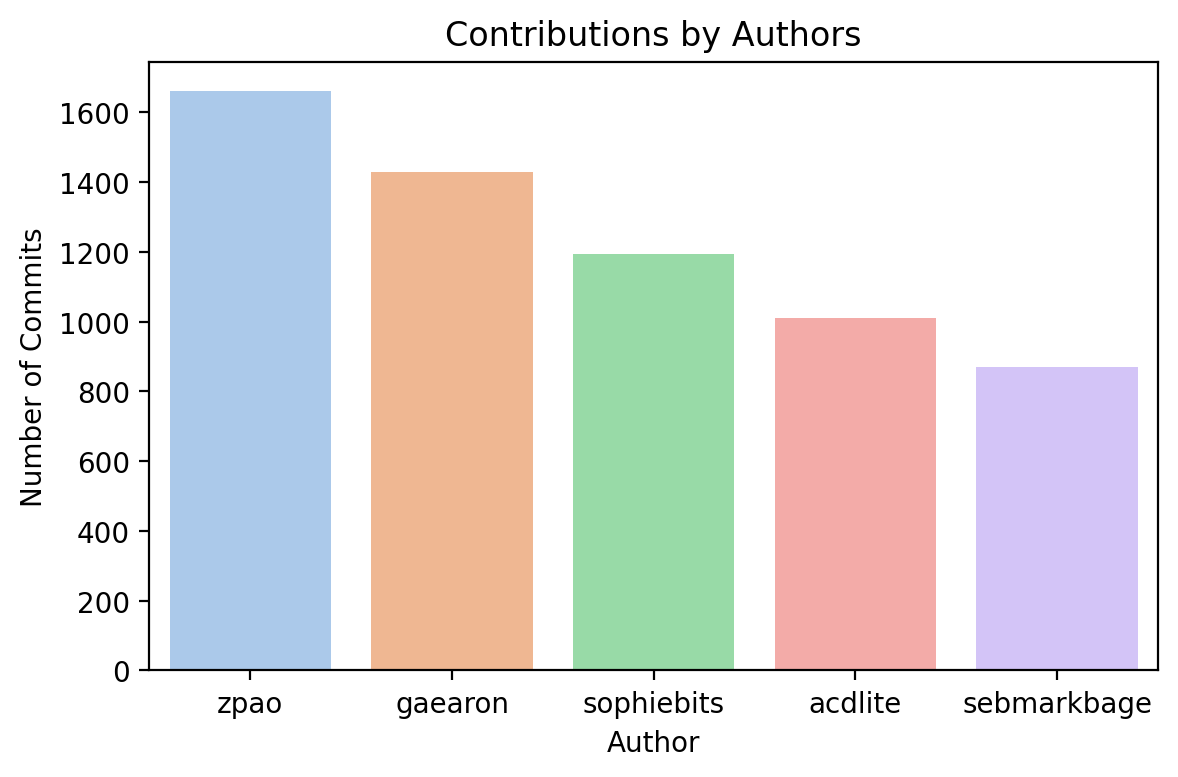

In [111]:
plt.figure(figsize=(6, 4))
sns.countplot(x='author', data=react,order=pd.value_counts(react['author']).iloc[:5].index, palette='pastel')
plt.title('Contributions by Authors')
plt.xlabel('Author')
plt.ylabel('Number of Commits')
plt.tight_layout()
plt.show()

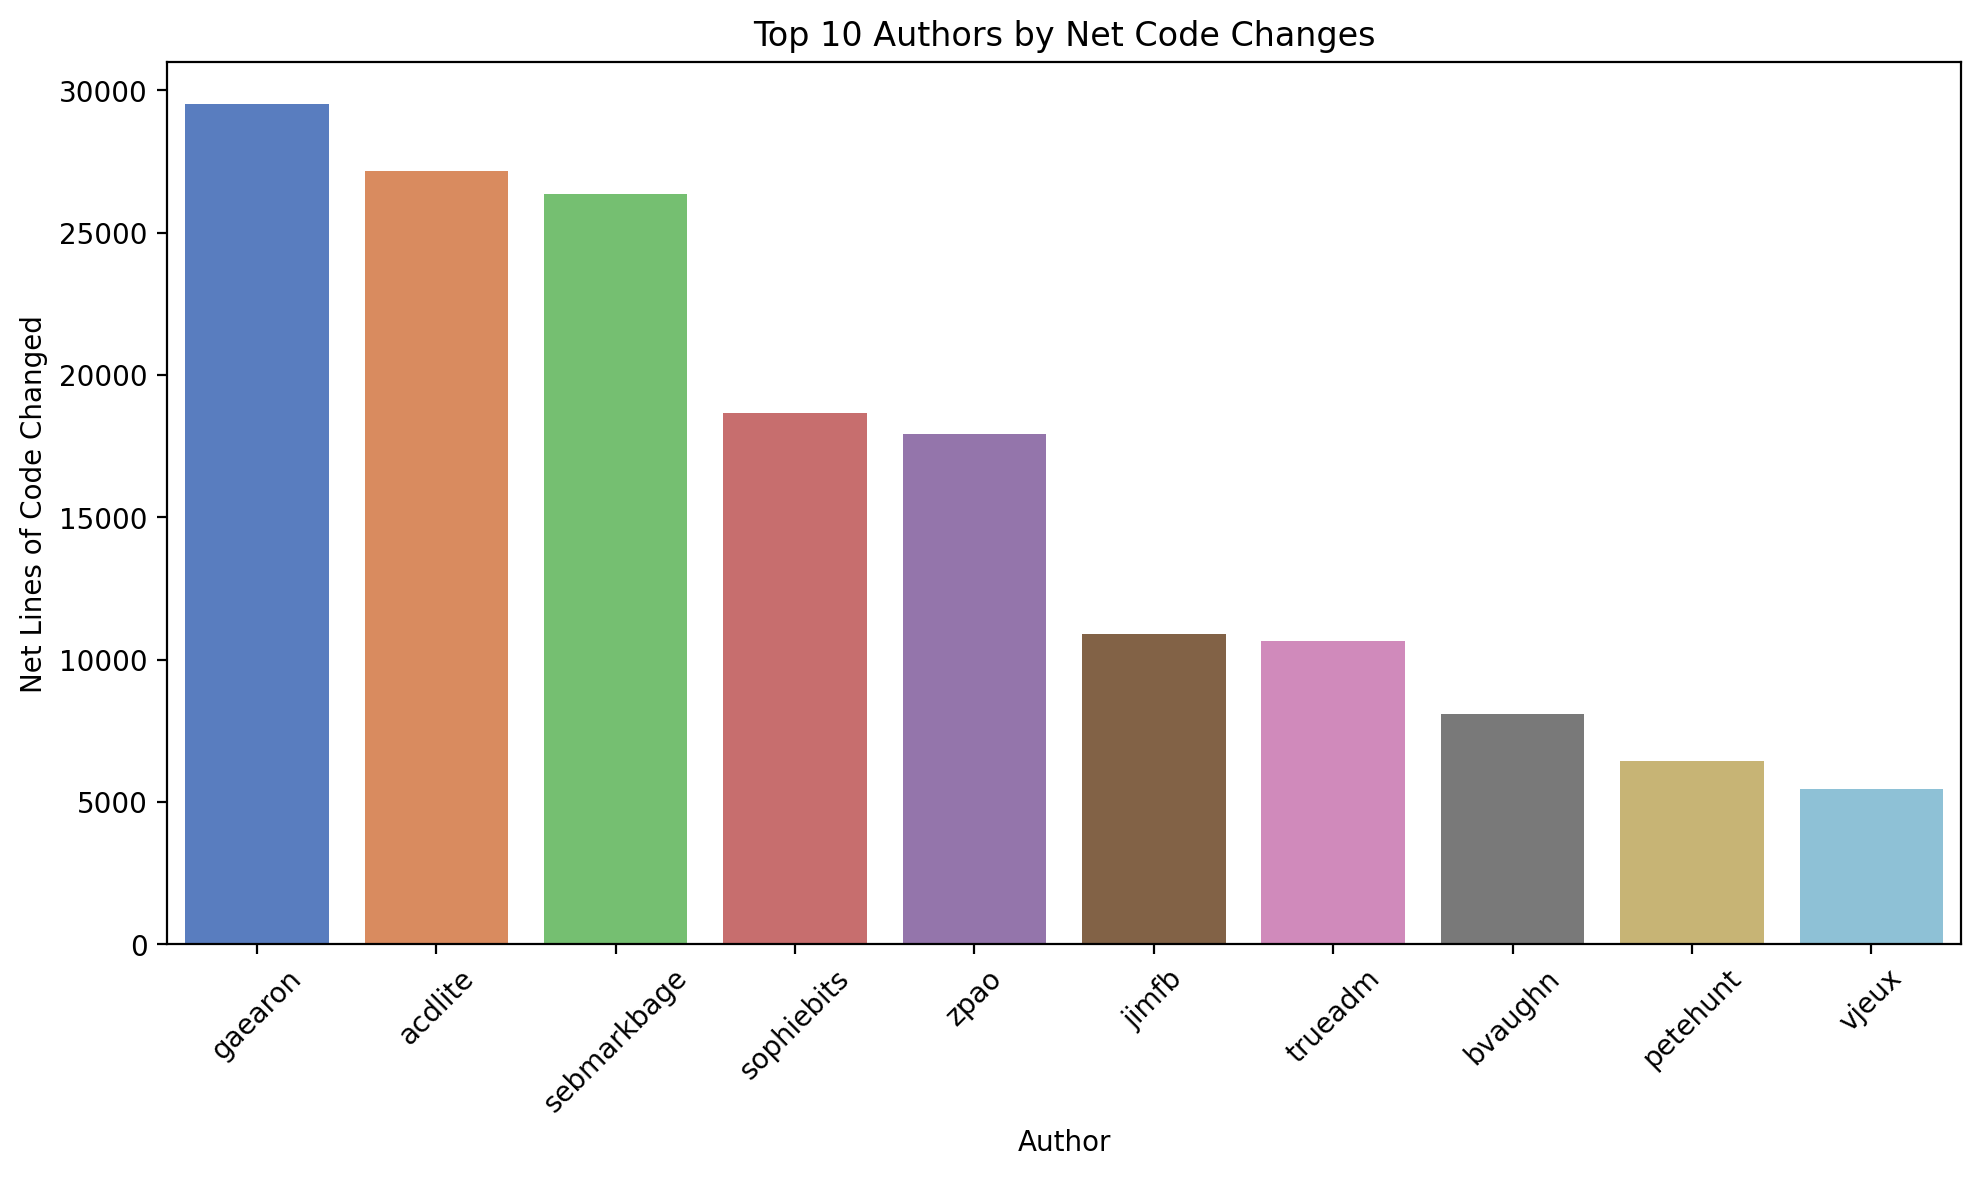

In [112]:
# Group by author and sum up the net code changes
author_net = react.groupby('author')['net_code_change'].sum().reset_index()
author_net = author_net.nlargest(10, 'net_code_change')

# Plotting the top 10 authors by net code changes
plt.figure(figsize=(10, 6))
sns.barplot(x='author', y='net_code_change', data=author_net, palette='muted')
plt.title('Top 10 Authors by Net Code Changes')
plt.xlabel('Author')
plt.ylabel('Net Lines of Code Changed')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [113]:
file_changes = react.groupby('[files]')['net_code_change'].sum().reset_index()
file_changes = file_changes.sort_values(by='net_code_change', ascending=False)
file_changes.head()


[files]  net_code_change
1763  ['packages/eslint-plugin-react-hooks/__tests__...             2484
4700  ['src/core/ReactCompositeComponent.js', 'src/c...             1954
227                                    ['CHANGELOG.md']             1927
2912  ['packages/react-events/src/Press.js', 'packag...             1165
169                             ['.mailmap', 'AUTHORS']              832

##### Net Commit Changes Over Time for Top Authors

In [114]:
author_changes = react.groupby(['author', pd.Grouper(key='date', freq='D')])['net_code_change'].sum().reset_index()
#top authors based on total net code change
top_authors = author_changes.groupby('author')['net_code_change'].sum().nlargest(3).index
# Filtering data 
top_author_changes = author_changes[author_changes['author'].isin(top_authors)]
# Pivoting data to have authors as columns
pivot_table = top_author_changes.pivot(index='date', columns='author', values='net_code_change').fillna(0)


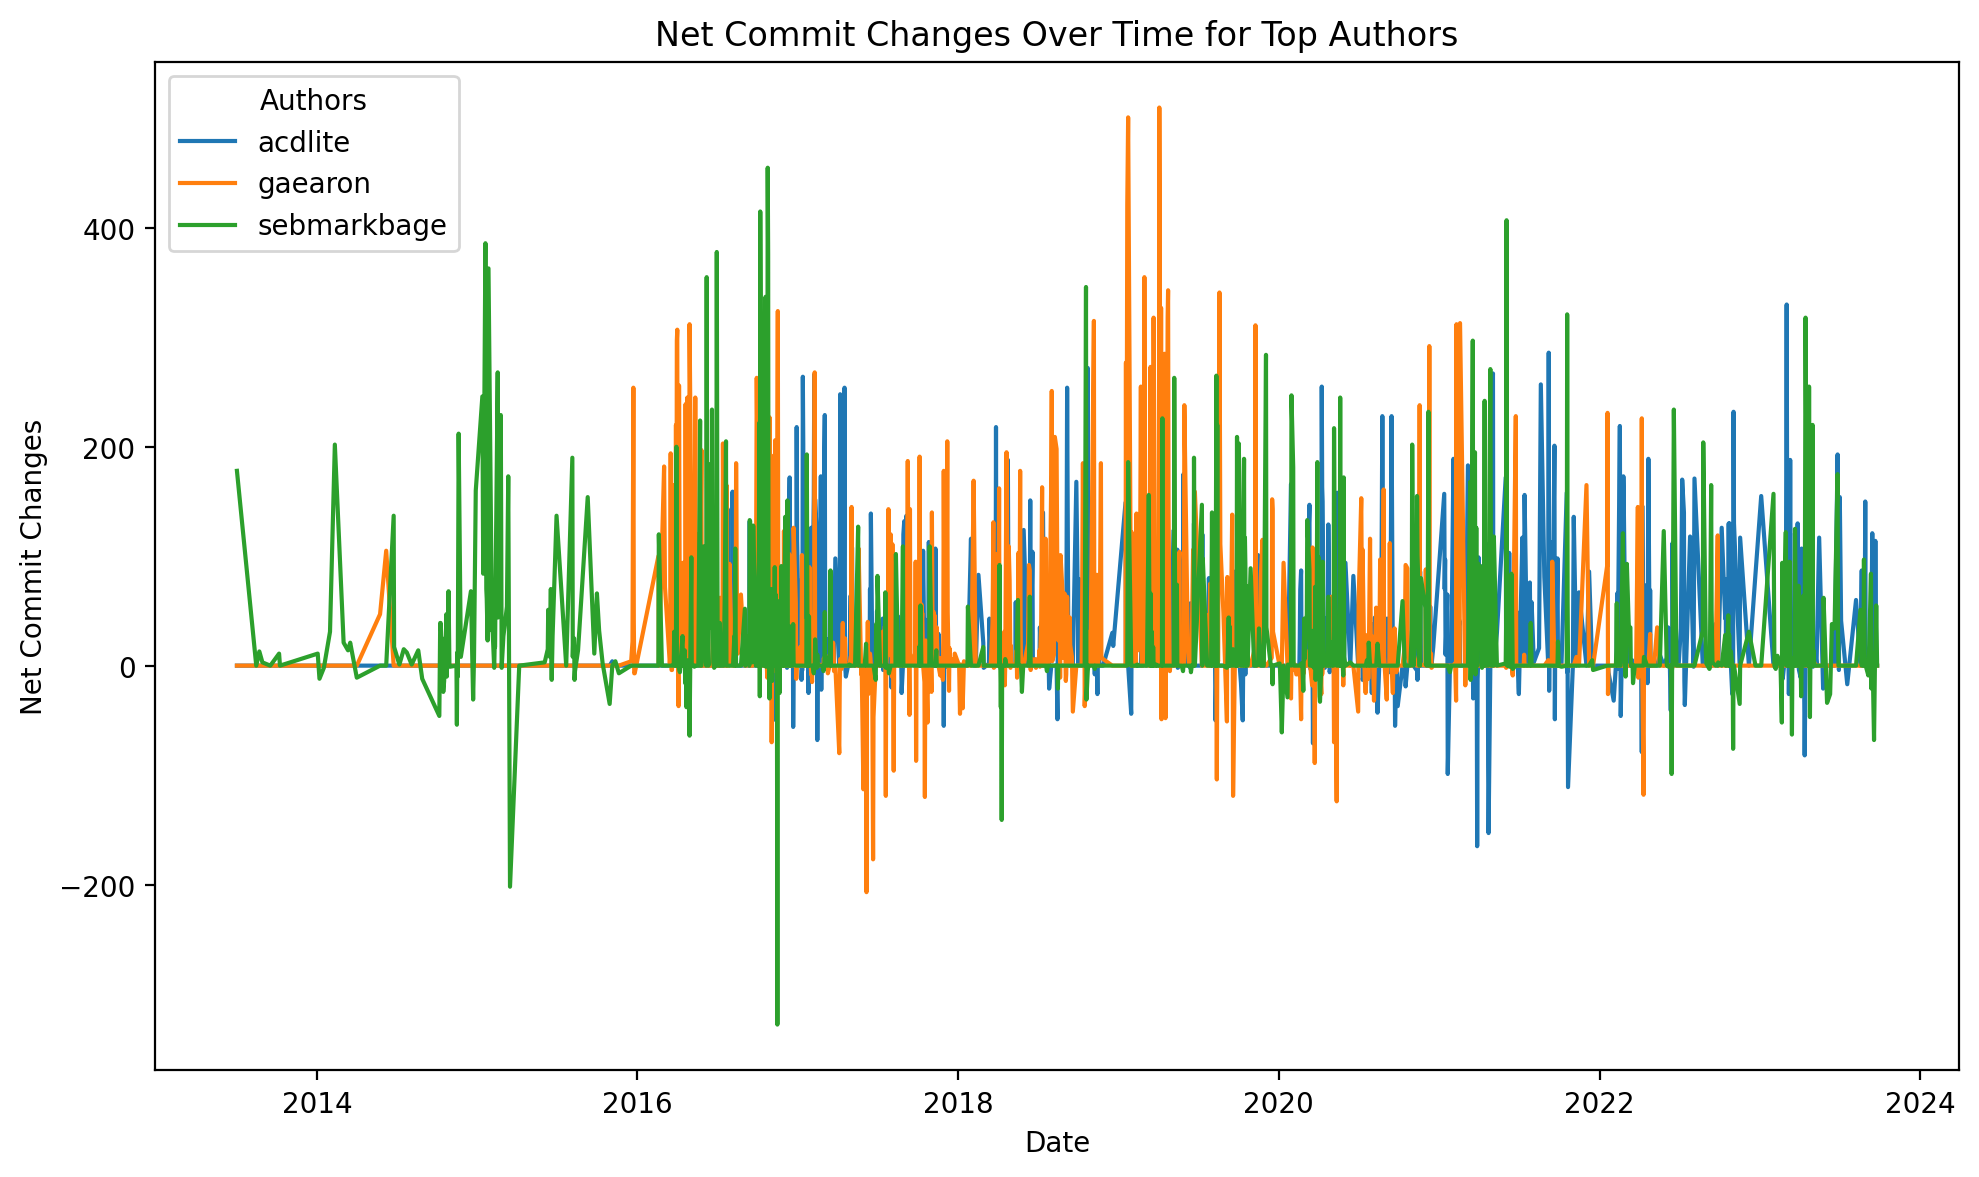

In [115]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=pivot_table, dashes=False)
plt.xlabel('Date')
plt.ylabel('Net Commit Changes')
plt.title('Net Commit Changes Over Time for Top Authors')
plt.legend(title='Authors', loc='upper left')
plt.tight_layout()
plt.show()

In [116]:
df = react 

#### Author Contributions Over Time

C:\Users\ethan\AppData\Local\Temp\ipykernel_8308\3298853332.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  .groupby([df['author'], df['date'].dt.to_period('M')]).size().unstack().fillna(0))


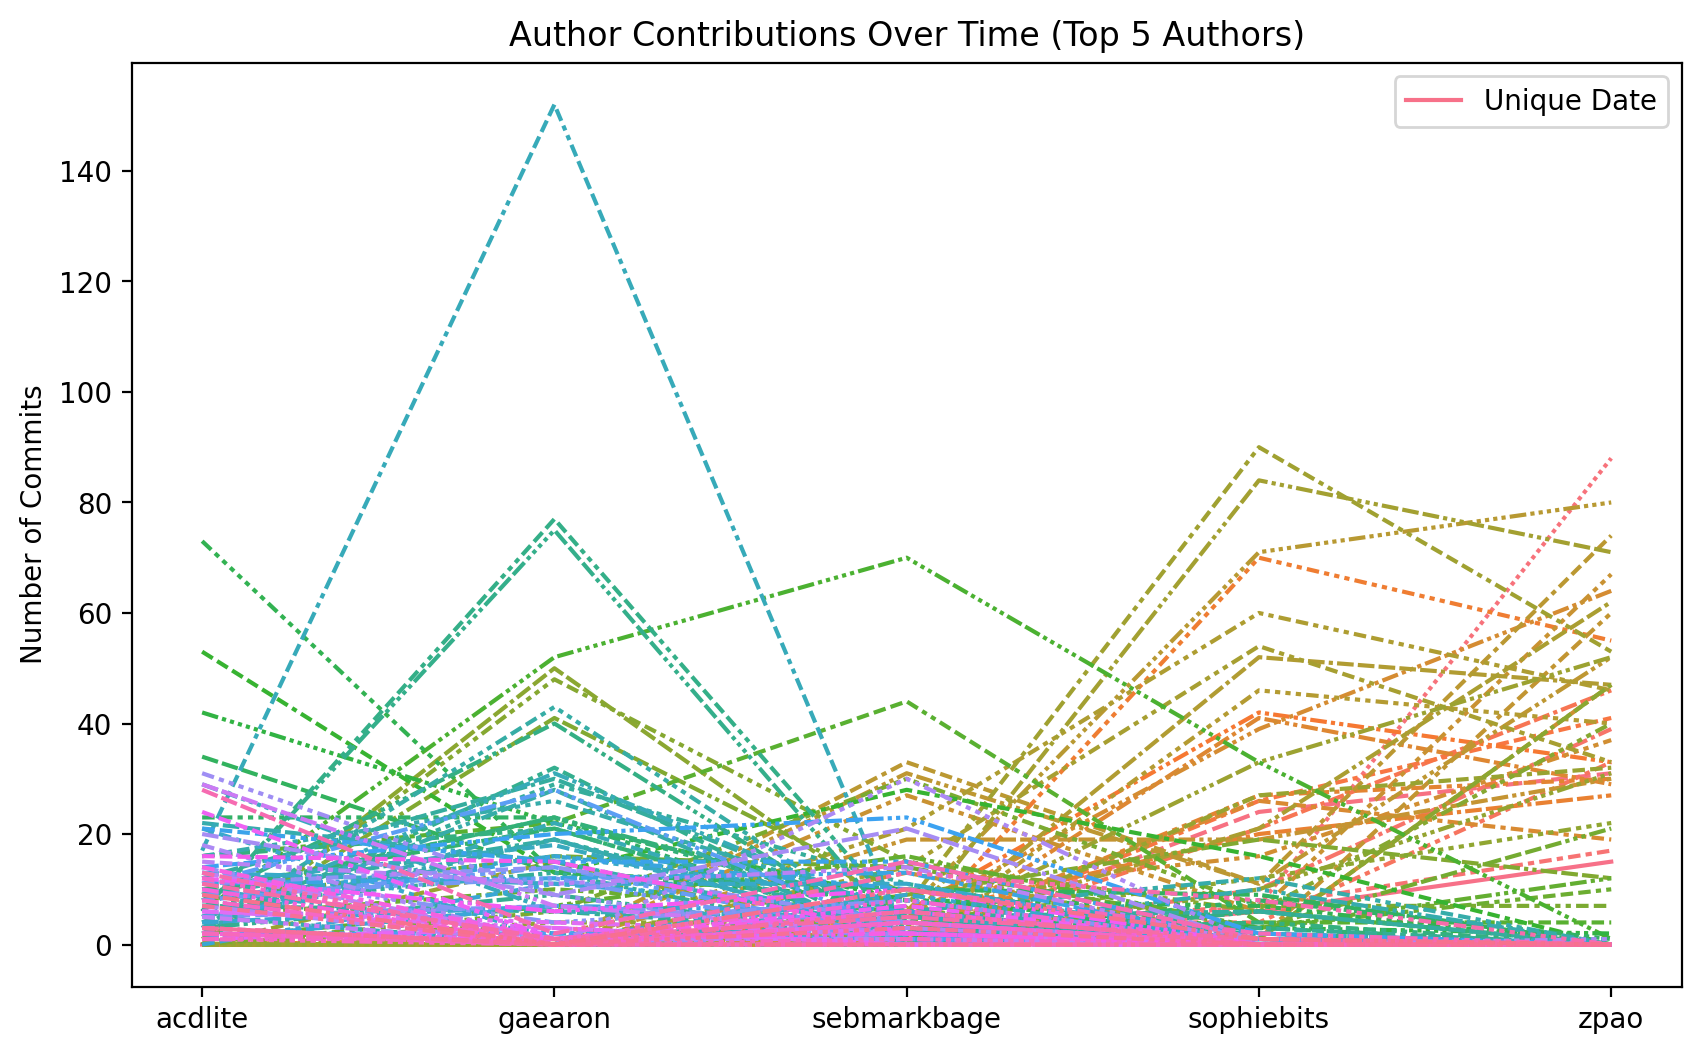

In [117]:
top_authors = df['author'].value_counts().head(5).index  # Considering top 3 authors

plt.figure(figsize=(10, 6))
sns.lineplot(data=df[df['author'].isin(top_authors)]
             .groupby([df['author'], df['date'].dt.to_period('M')]).size().unstack().fillna(0))
plt.title('Author Contributions Over Time (Top 5 Authors)')  # Update title for top 3 authors
plt.xlabel('')  # Empty x-axis label to remove 'Date' key
plt.ylabel('Number of Commits')
plt.legend().remove()  # Remove the legend
plt.legend(['Unique Date'], loc='upper right')
plt.show()


C:\Users\ethan\AppData\Local\Temp\ipykernel_8308\2841534723.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  .groupby([df['author'], df['date'].dt.to_period('M')]).size().unstack().fillna(0))


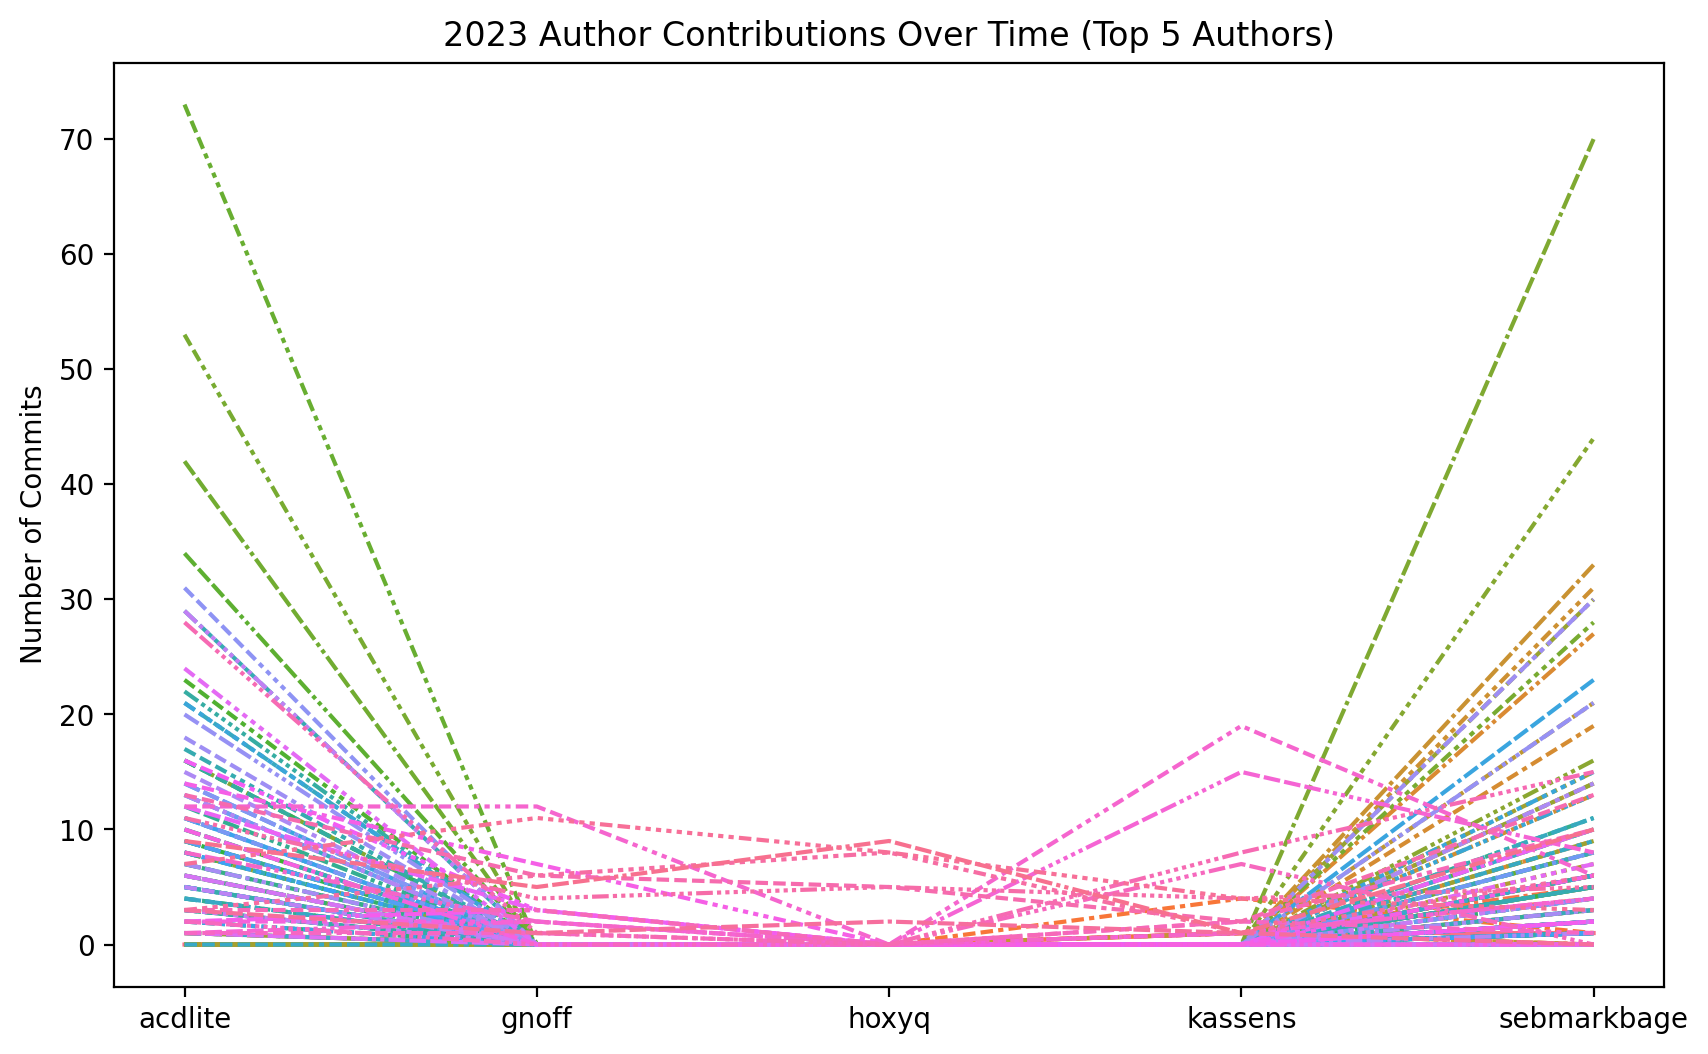

In [118]:
top_authors = df[df['date'].dt.year == 2023]['author'].value_counts().head(5).index  # Considering top 5 authors for the year 2023

plt.figure(figsize=(10, 6))
sns.lineplot(data=df[df['author'].isin(top_authors)]
             .groupby([df['author'], df['date'].dt.to_period('M')]).size().unstack().fillna(0))
plt.title('2023 Author Contributions Over Time (Top 5 Authors)')  # Update title for top 3 authors
plt.xlabel('')  # Empty x-axis label to remove 'Date' key
plt.ylabel('Number of Commits')
plt.legend().remove()  # Remove the legend
plt.show()


#### Code Changes by Time of Day

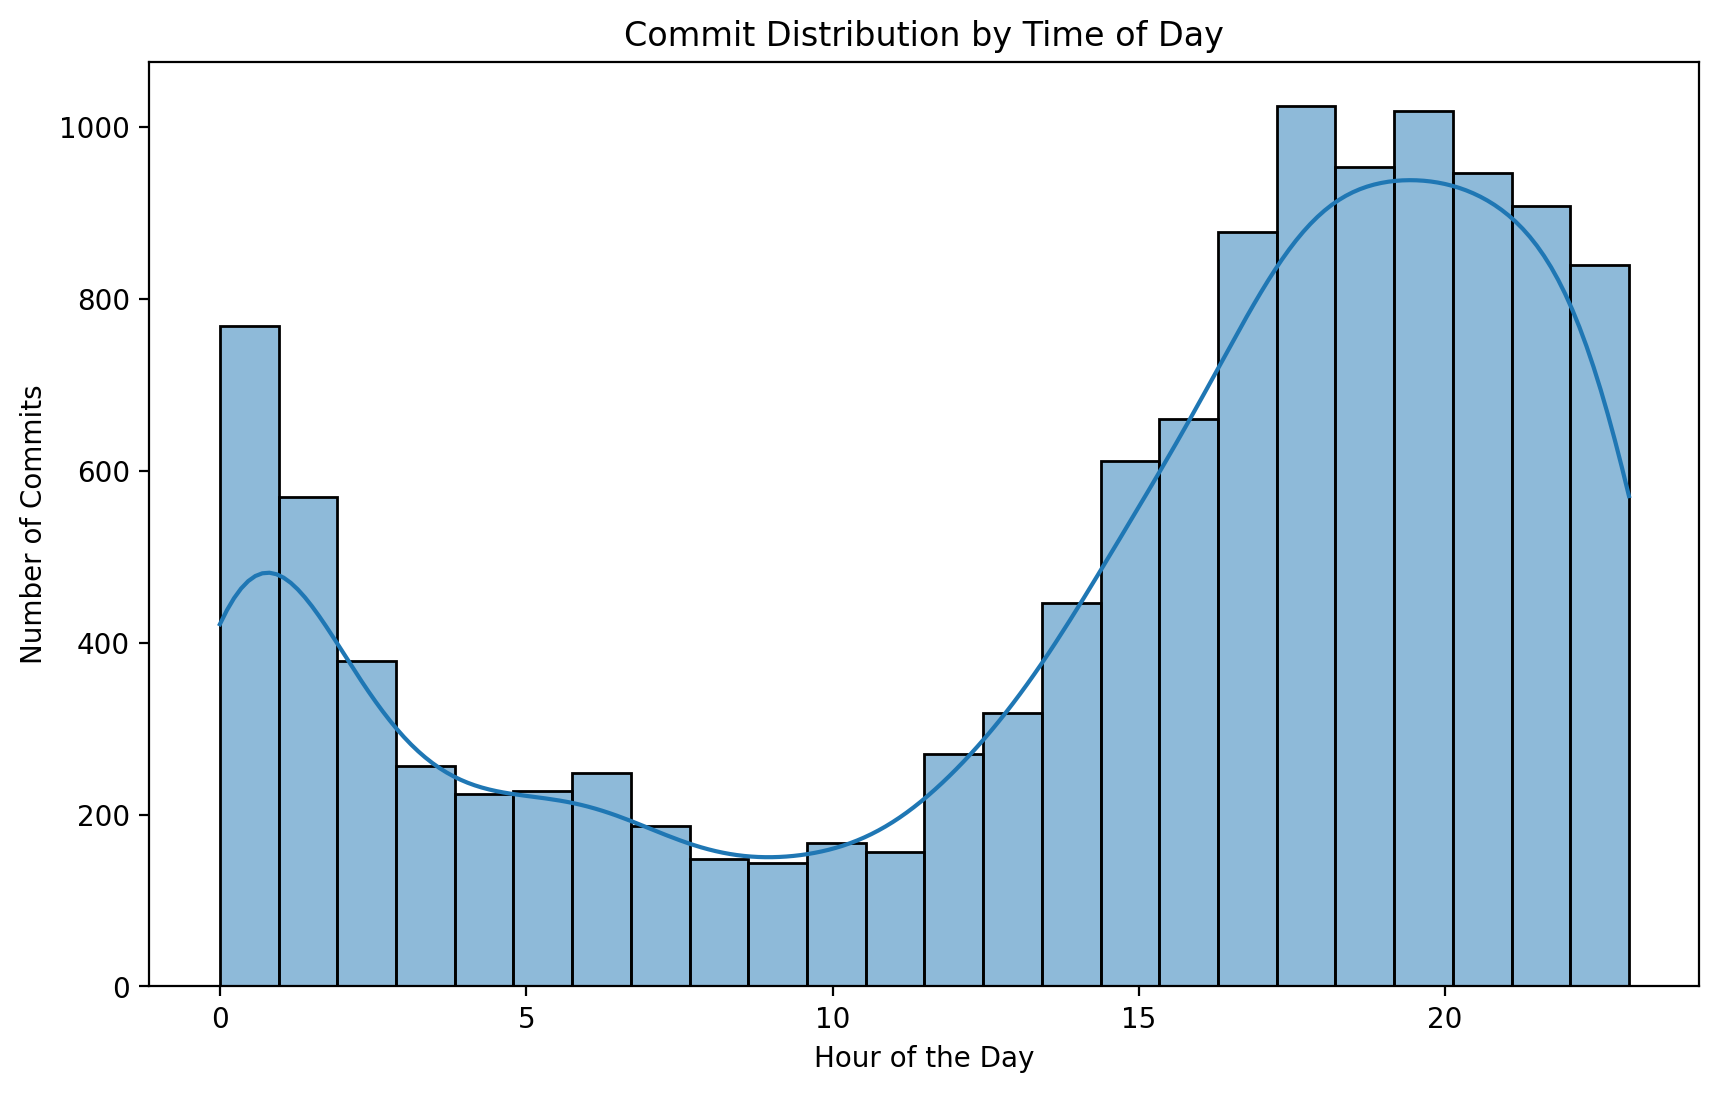

In [119]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x=df['date'].dt.hour, bins=24, kde=True)
plt.title('Commit Distribution by Time of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Commits')
plt.show()


#### commit pattern analysis

In [120]:
top_authors = df['author'].value_counts().head(2).index

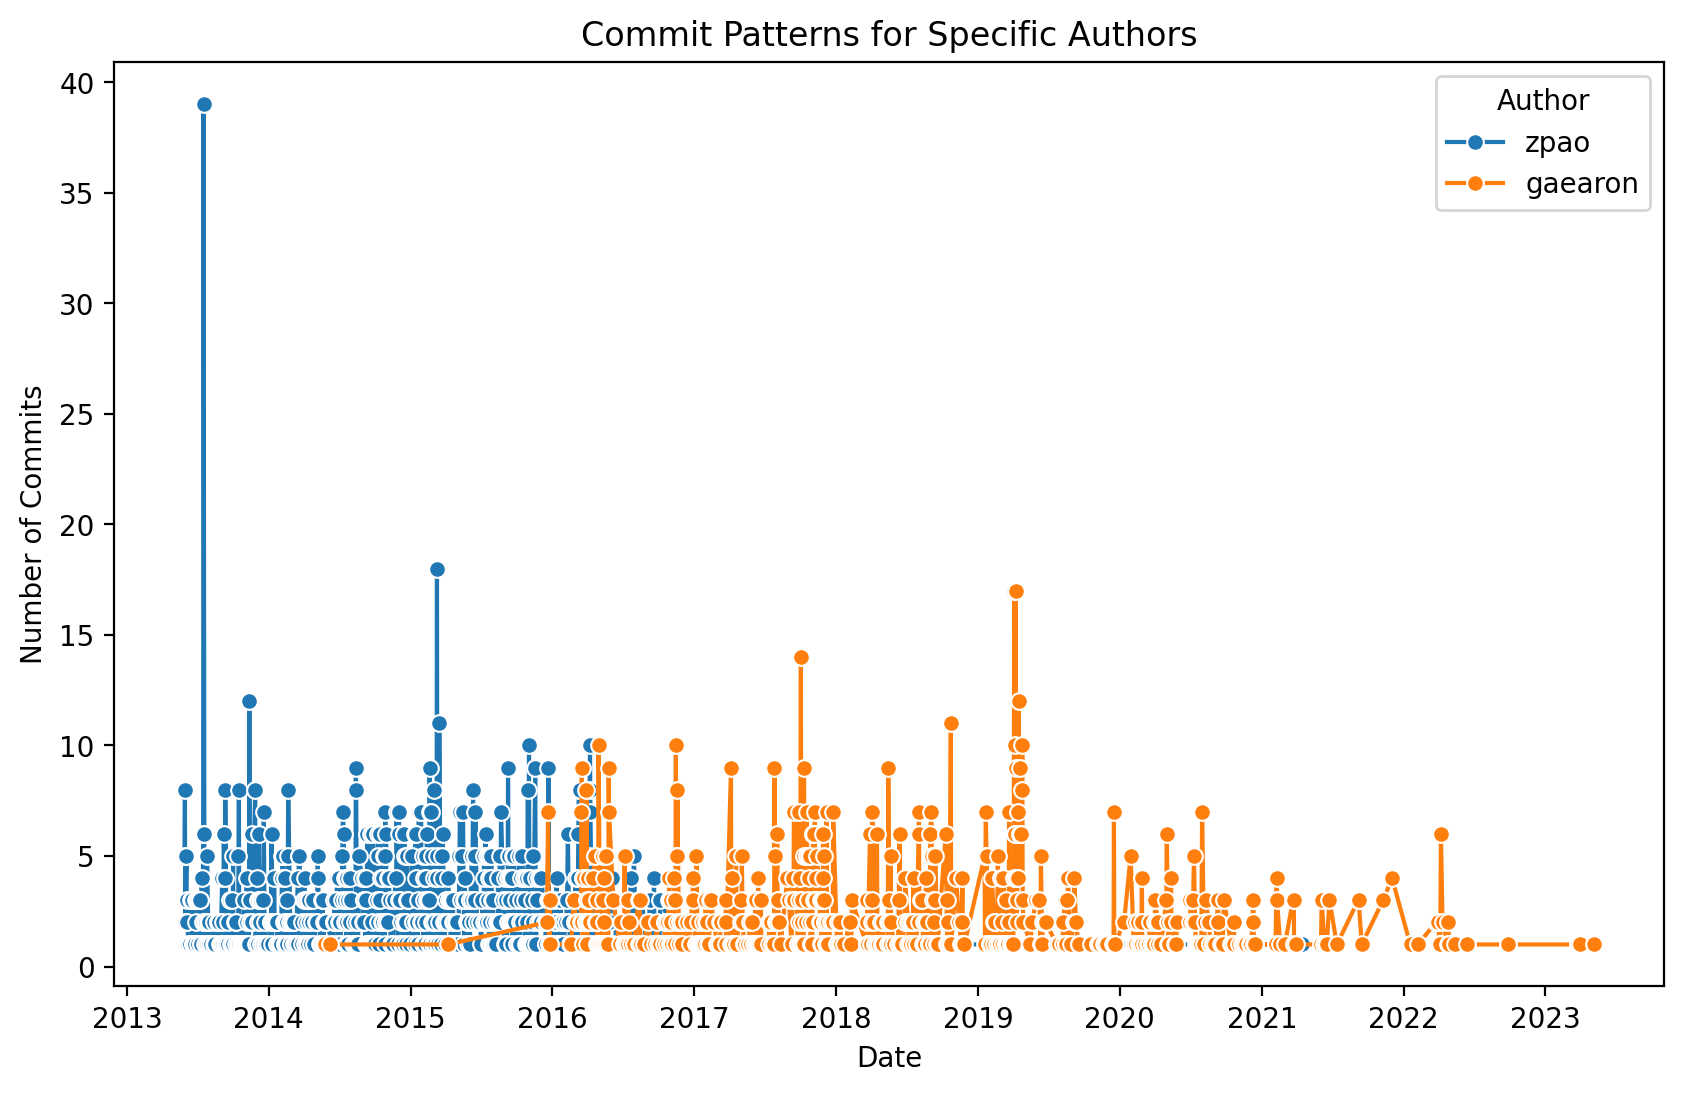

In [121]:
# Choose specific authors for commit pattern analysis
selected_authors = ['zpao', 'gaearon']

plt.figure(figsize=(10, 6))
for author in selected_authors:
    author_data = df[df['author'] == author]
    sns.lineplot(data=author_data.groupby(author_data['date'].dt.date).size(), label=author, marker='o')
plt.title('Commit Patterns for Specific Authors')
plt.xlabel('Date')
plt.ylabel('Number of Commits')
plt.legend(title='Author')
plt.show()


Weekly monthly trends 

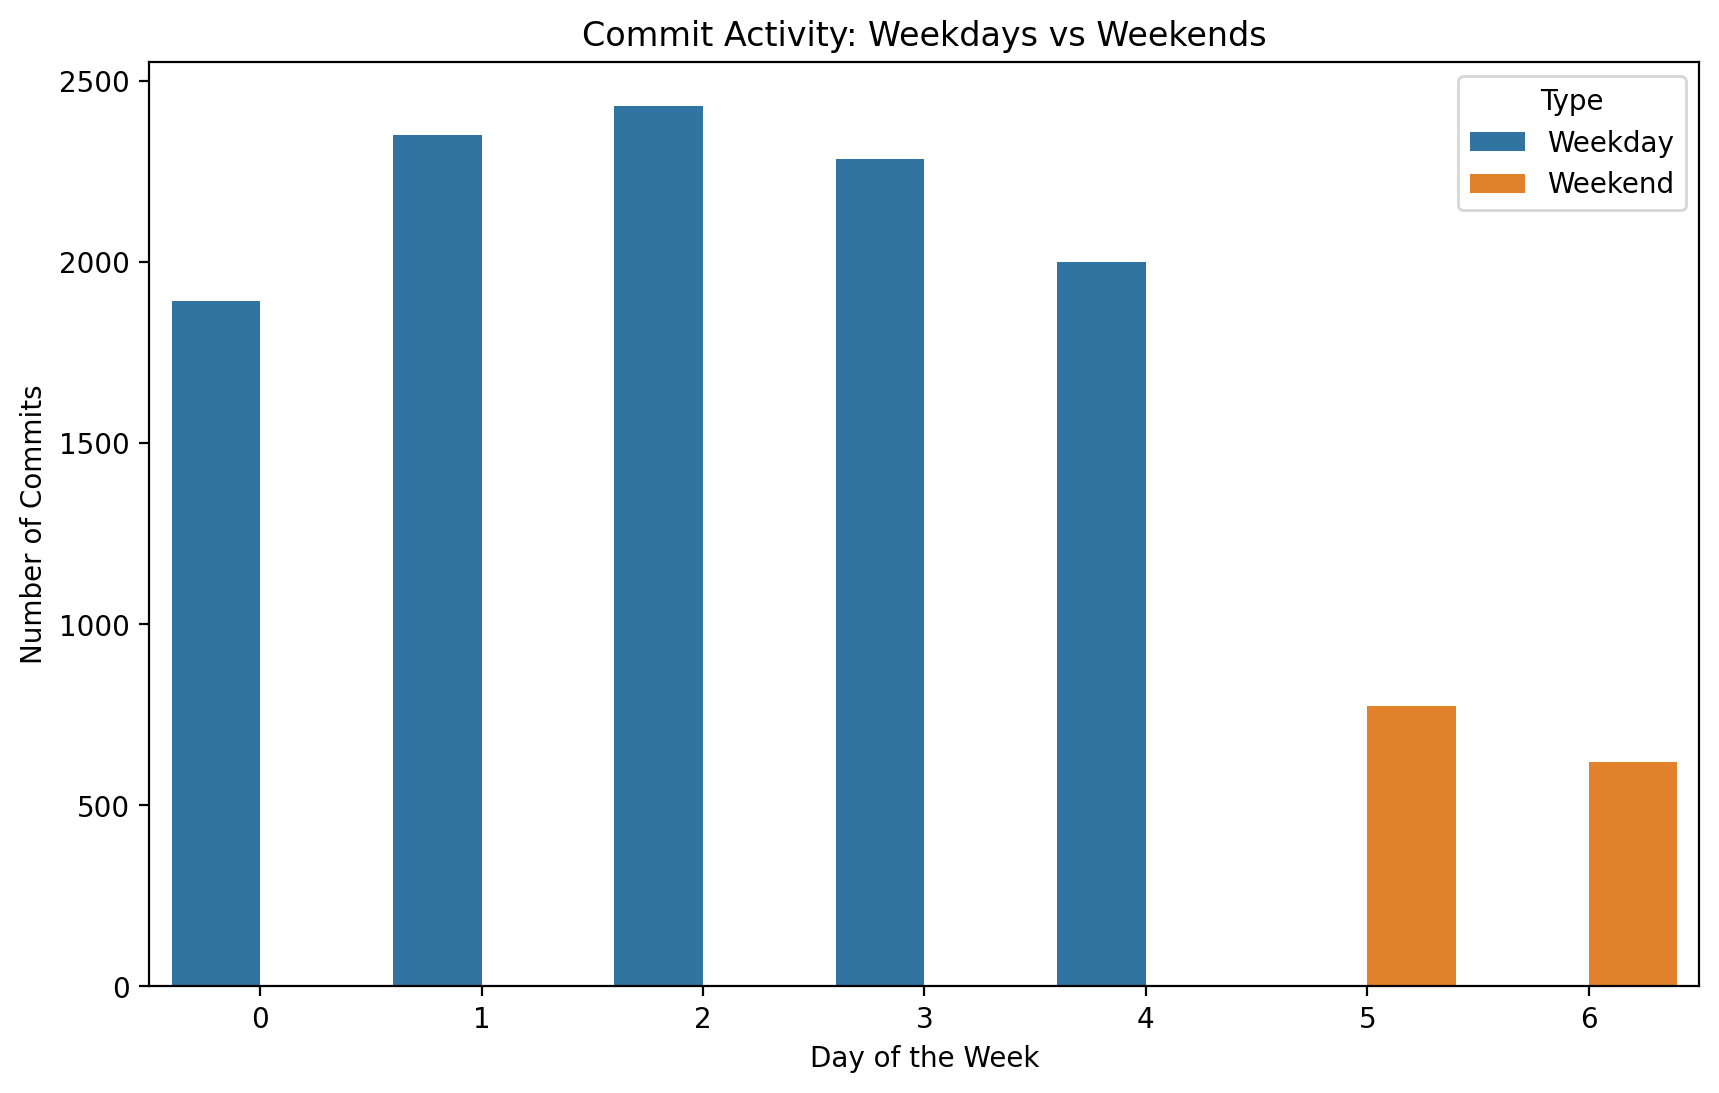

In [122]:
# Assign weekdays (0-4) and weekends (5-6) using dt.weekday
df['day_of_week'] = df['date'].dt.dayofweek

plt.figure(figsize=(10, 6))
sns.countplot(x='day_of_week', data=df, hue=df['day_of_week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday'))
plt.title('Commit Activity: Weekdays vs Weekends')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Commits')
plt.legend(title='Type')
plt.show()


# Commit Messages

In [123]:
react.head()

author                      date  additions  deletions  \
0        gnoff 2023-09-27 23:17:45+00:00          0          1   
1        gnoff 2023-09-27 17:39:04+00:00          1          0   
6        hoxyq 2023-09-25 17:24:52+00:00         27         10   
7  sebmarkbage 2023-09-25 16:26:17+00:00         18         18   
9  sebmarkbage 2023-09-23 16:33:48+00:00         64          9   

                                             message  numfiles  \
0  Revert "publish `react-server-dom-turbopack` t...         1   
1  publish `react-server-dom-turbopack` to canary...         1   
6  React DevTools 4.28.3 -> 4.28.4 (#27419)  * re...         8   
7  [Fizz] Restrict types of keyPath when it is kn...         1   
9  [Flight] Dedupe suspense boundaries when it ha...         2   

                                             [files]  net_code_change  \
0                               ['ReactVersions.js']               -1   
1                               ['ReactVersions.js']                1   
6  ['packages/react-devtools-core/package.json', ...               17   
7   ['packages/react-server/src/ReactFizzServer.js']                0   
9  ['packages/react-dom/src/__tests__/ReactDOMFiz...               55   

   day_of_week  
0            2  
1            2  
6            0  
7            0  
9            5

In [124]:
react.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12351 entries, 0 to 15982
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   author           12351 non-null  object             
 1   date             12351 non-null  datetime64[ns, UTC]
 2   additions        12351 non-null  int64              
 3   deletions        12351 non-null  int64              
 4   message          12351 non-null  object             
 5   numfiles         12351 non-null  int64              
 6   [files]          12351 non-null  object             
 7   net_code_change  12351 non-null  int64              
 8   day_of_week      12351 non-null  int32              
dtypes: datetime64[ns, UTC](1), int32(1), int64(4), object(3)
memory usage: 1.1+ MB


### word count


In [125]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

In [126]:
# Concatenate all commit messages into a single string
all_messages = ' '.join(react['message'].astype(str))

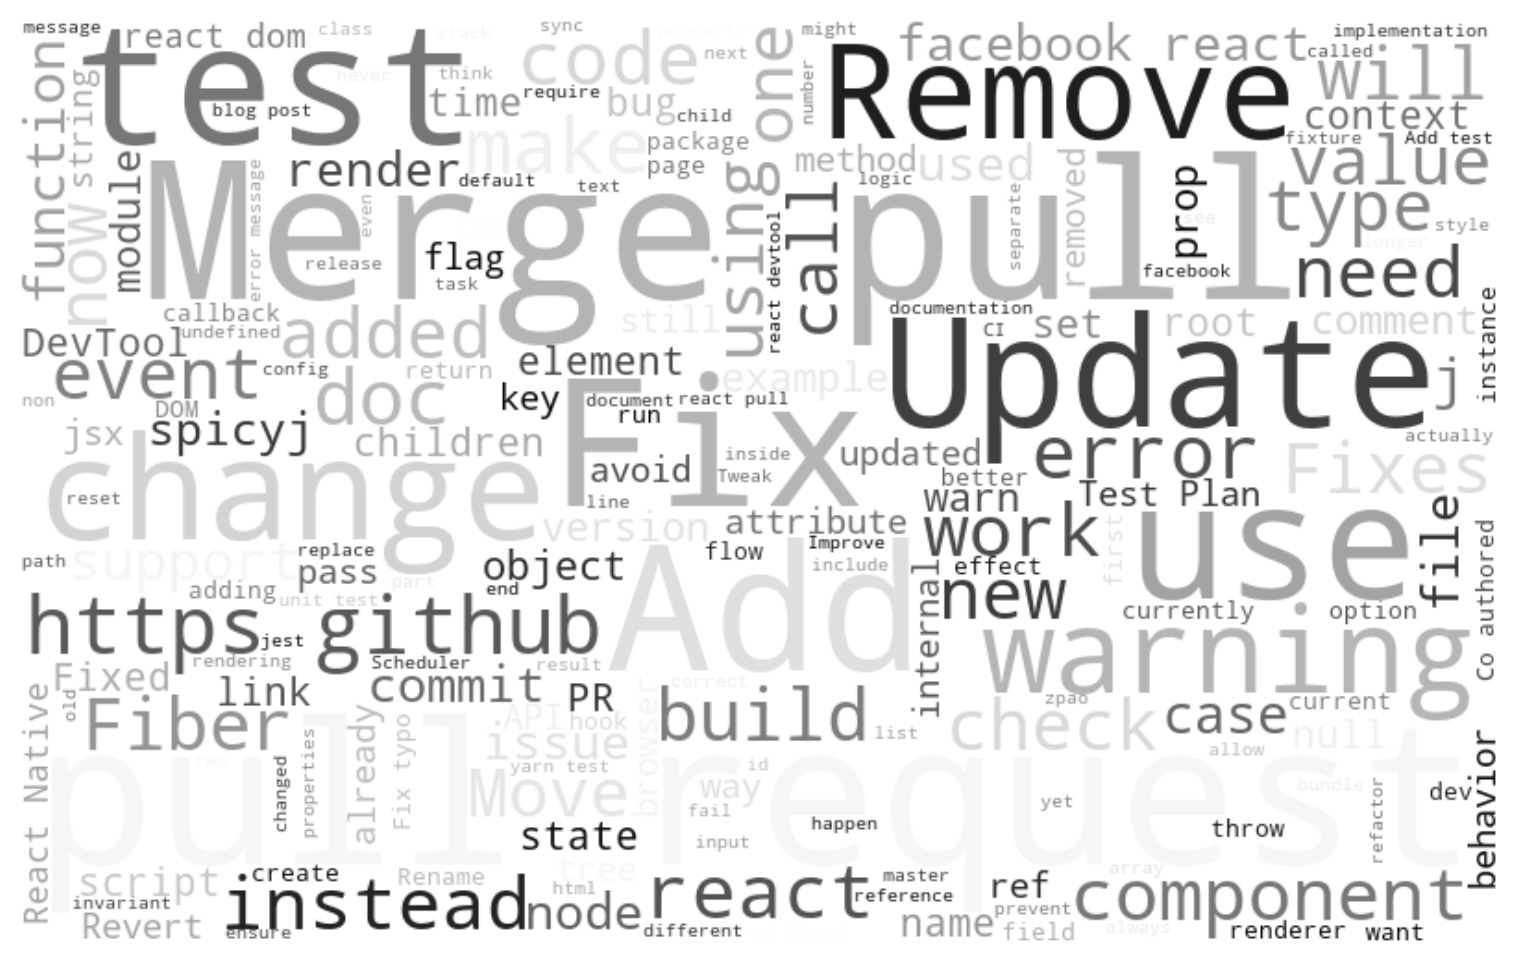

In [127]:
wc = WordCloud(background_color='white', colormap = 'binary',
      width = 800, height = 500).generate(all_messages)

plt.figure(figsize=(10, 6))  # Adjust the figsize as needed
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ethan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


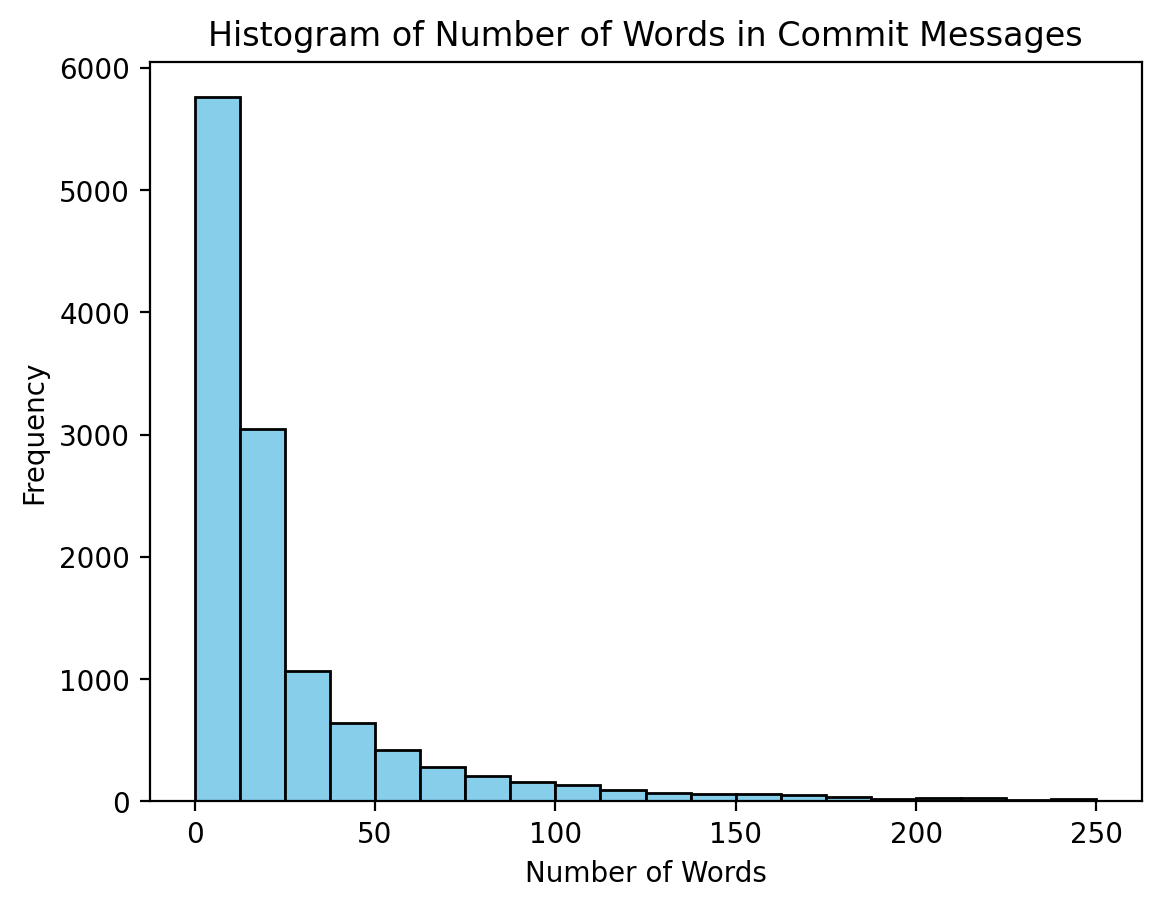

In [128]:
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize

# Download the NLTK punkt tokenizer
nltk.download('punkt')

# Function to count the number of words in a text
def count_words(text):
    tokens = word_tokenize(text)
    return len(tokens)

# Apply the count_words function to each commit message and create a new column
react['Word_Count'] = react['message'].apply(count_words)

# Create a histogram of the number of words
plt.hist(df['Word_Count'], bins=20, range=(0, 250),color='skyblue', edgecolor='black')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Words in Commit Messages')
plt.show()


<Axes: xlabel='net_code_change', ylabel='Word_Count'>

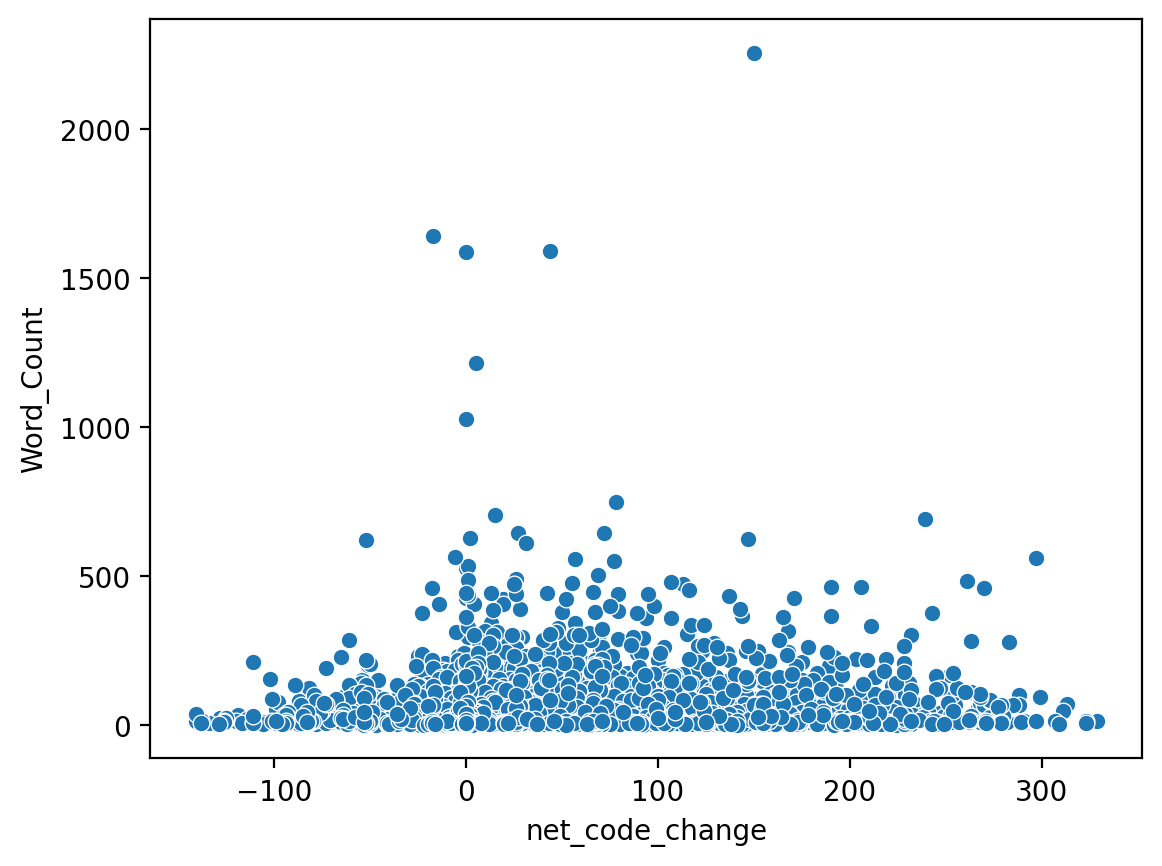

In [129]:
import seaborn as sns
sns.scatterplot(data= react, x='net_code_change', y='Word_Count')


##### Sentiment Analyzer

In [130]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download the VADER lexicon for sentiment analysis
nltk.download('vader_lexicon')

def analyze_sentiment(text):
    sid = SentimentIntensityAnalyzer()
    sentiment_scores = sid.polarity_scores(text)
    
    # Classify the sentiment based on the compound score
    if sentiment_scores['compound'] >= 0.05:
        return 'Positive'
    elif sentiment_scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to each commit message and create a new column
react['Sentiment'] = react['message'].apply(analyze_sentiment)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ethan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [131]:
react[['message', 'Sentiment']]

message Sentiment
0      Revert "publish `react-server-dom-turbopack` t...  Positive
1      publish `react-server-dom-turbopack` to canary...   Neutral
6      React DevTools 4.28.3 -> 4.28.4 (#27419)  * re...  Positive
7      [Fizz] Restrict types of keyPath when it is kn...  Negative
9      [Flight] Dedupe suspense boundaries when it ha...  Negative
...                                                  ...       ...
15976  Merge pull request #3 from paulshen/spellings ...   Neutral
15978  Merge pull request #2 from paulshen/homebutton...   Neutral
15980                  Fix live editor on mobile devices   Neutral
15981                                      Fix some URLs   Neutral
15982  Update release task to keep correct filename case   Neutral

[12351 rows x 2 columns]

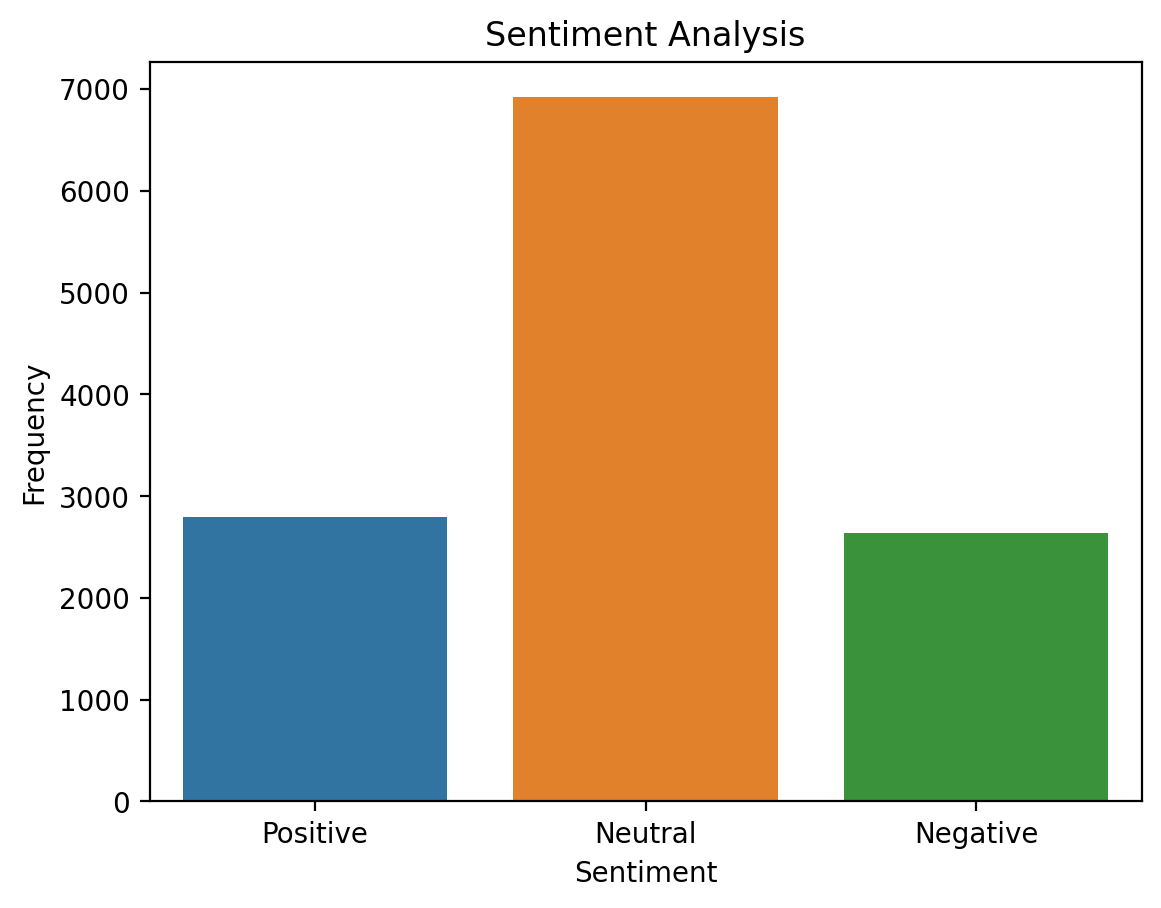

In [132]:
sns.countplot(x='Sentiment', data=react)

# Set plot labels and title
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Sentiment Analysis')

# Show the plot
plt.show()

In [133]:
react.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12351 entries, 0 to 15982
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   author           12351 non-null  object             
 1   date             12351 non-null  datetime64[ns, UTC]
 2   additions        12351 non-null  int64              
 3   deletions        12351 non-null  int64              
 4   message          12351 non-null  object             
 5   numfiles         12351 non-null  int64              
 6   [files]          12351 non-null  object             
 7   net_code_change  12351 non-null  int64              
 8   day_of_week      12351 non-null  int32              
 9   Word_Count       12351 non-null  int64              
 10  Sentiment        12351 non-null  object             
dtypes: datetime64[ns, UTC](1), int32(1), int64(5), object(4)
memory usage: 1.3+ MB


<Axes: xlabel='net_code_change', ylabel='Word_Count'>

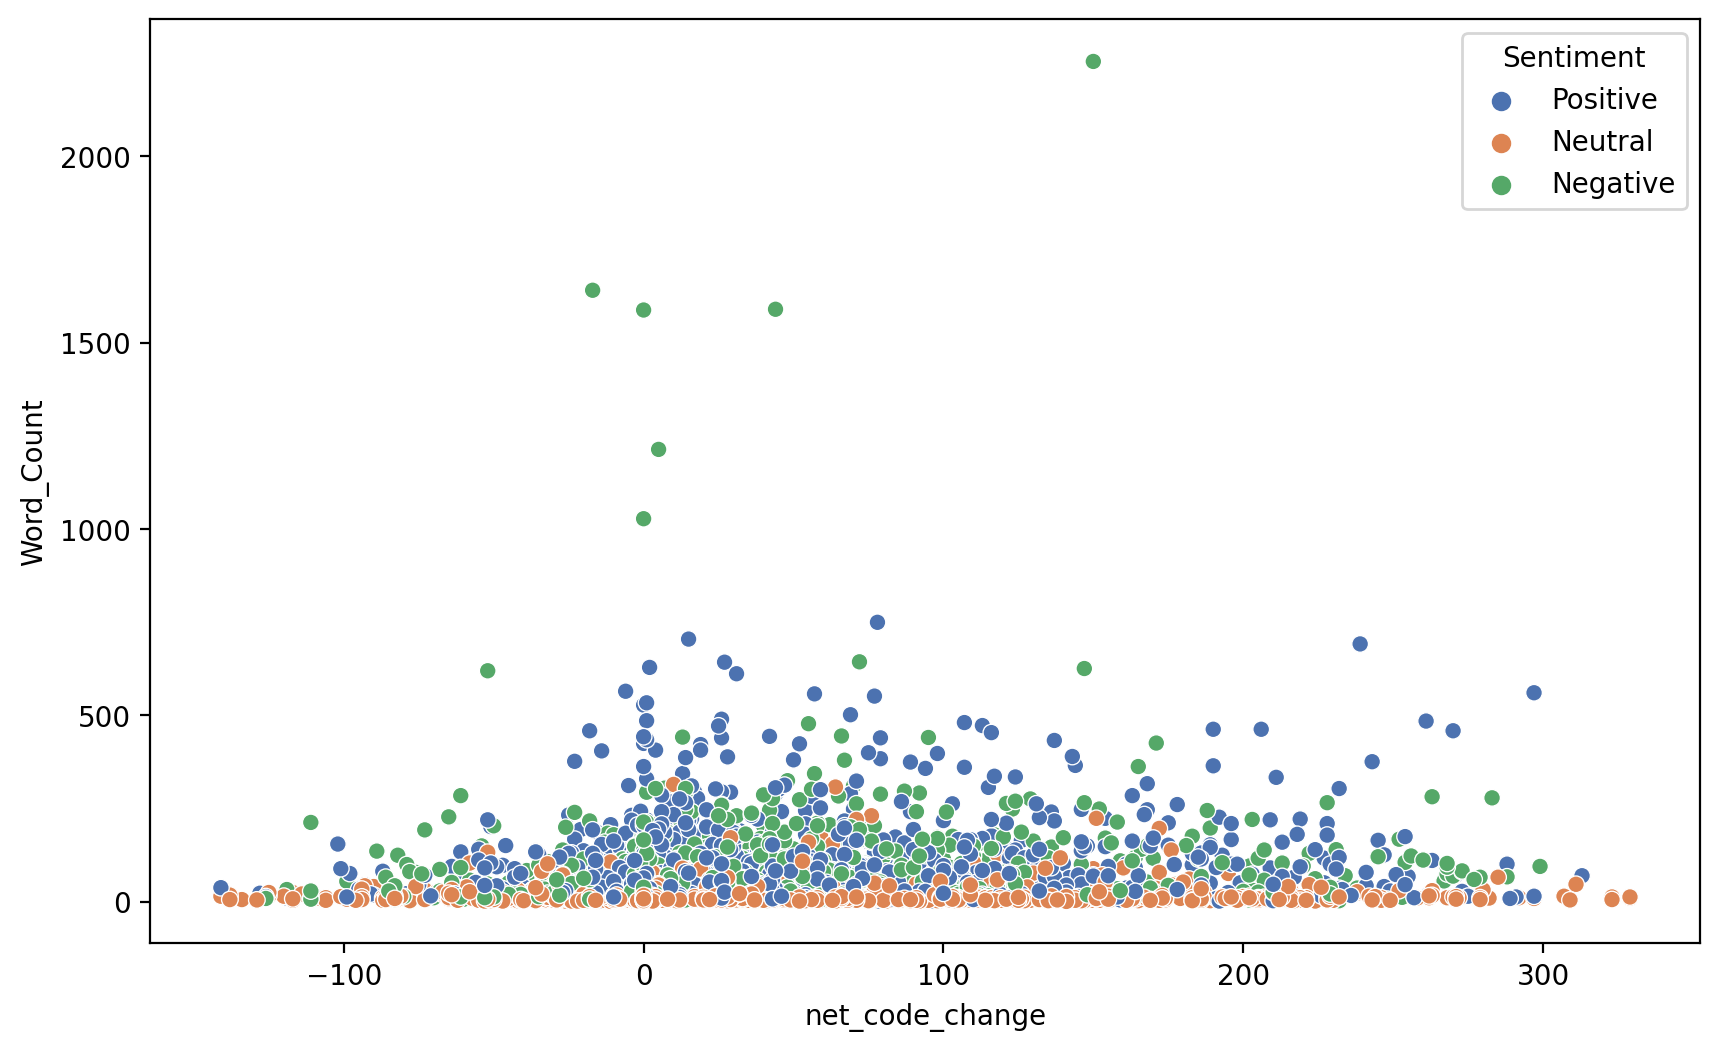

In [139]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=react, x='net_code_change', y='Word_Count', hue="Sentiment", palette="deep")


In [137]:
react_positive = react[react['Sentiment'] == 'Positive']

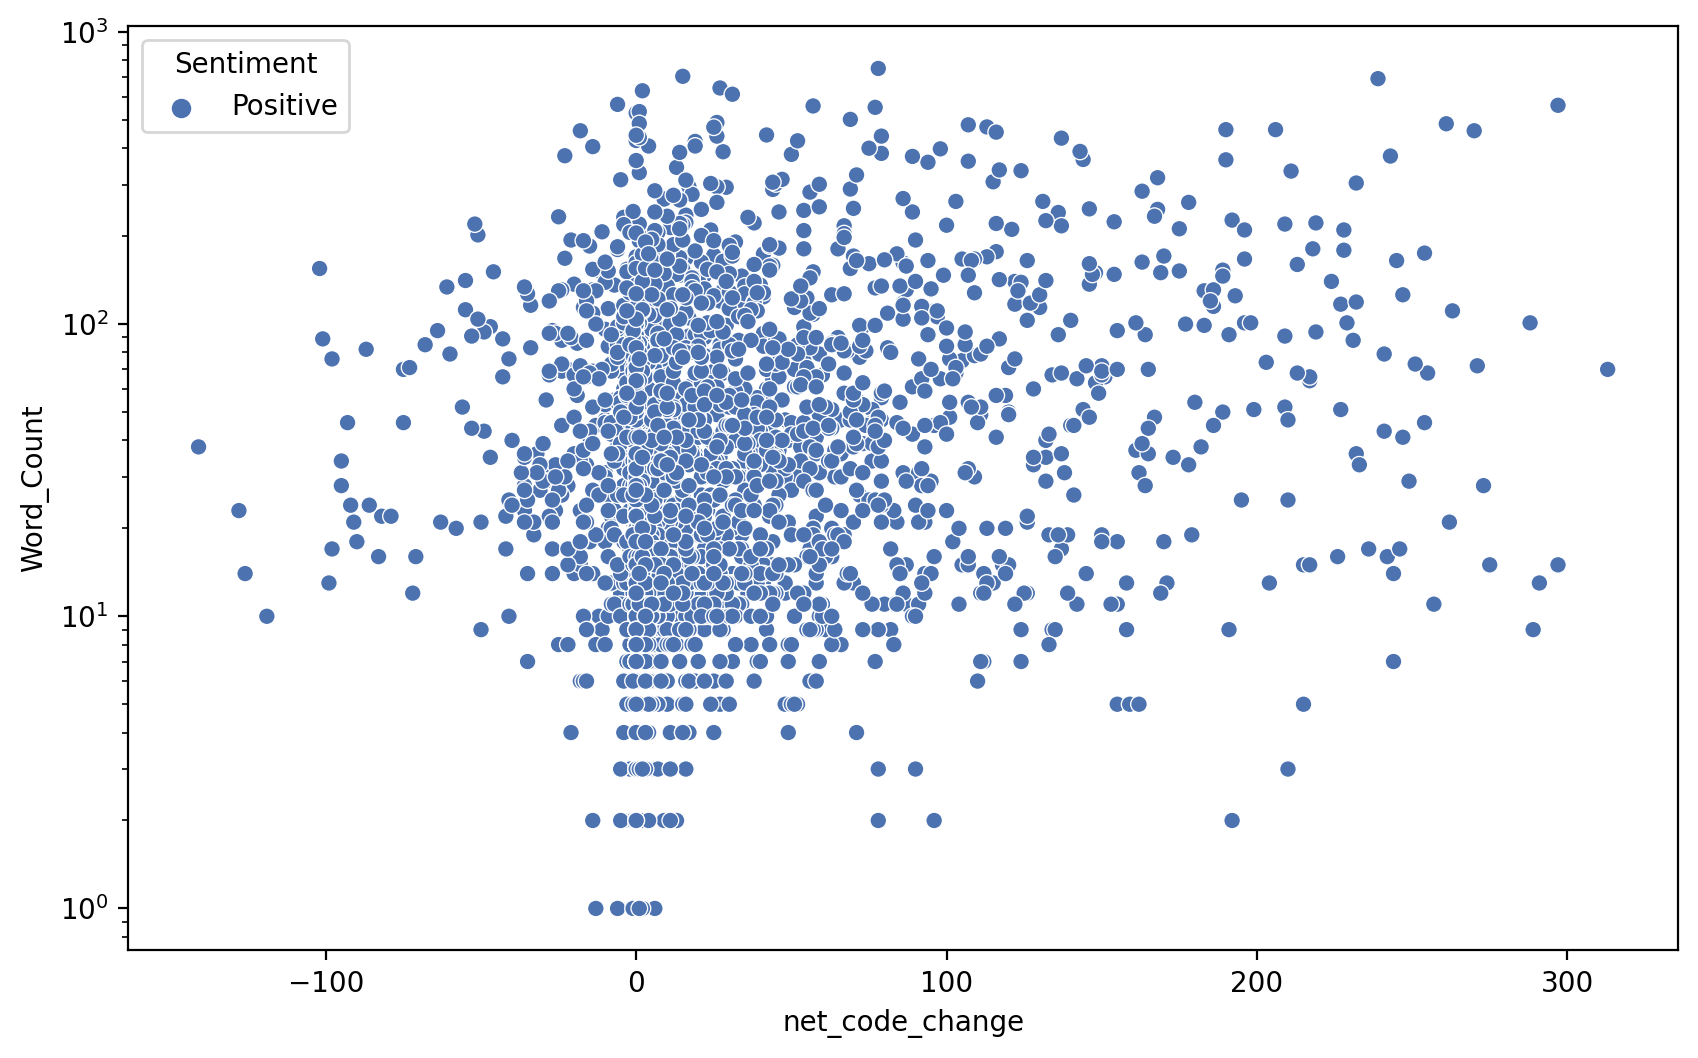

In [138]:
#log scale plot 
plt.figure(figsize=(10, 6))
sns.scatterplot(data=react_positive, x='net_code_change', y='Word_Count', hue="Sentiment", palette="deep")
#plt.xscale('log')

plt.yscale('log')

# Show the plot
plt.show()

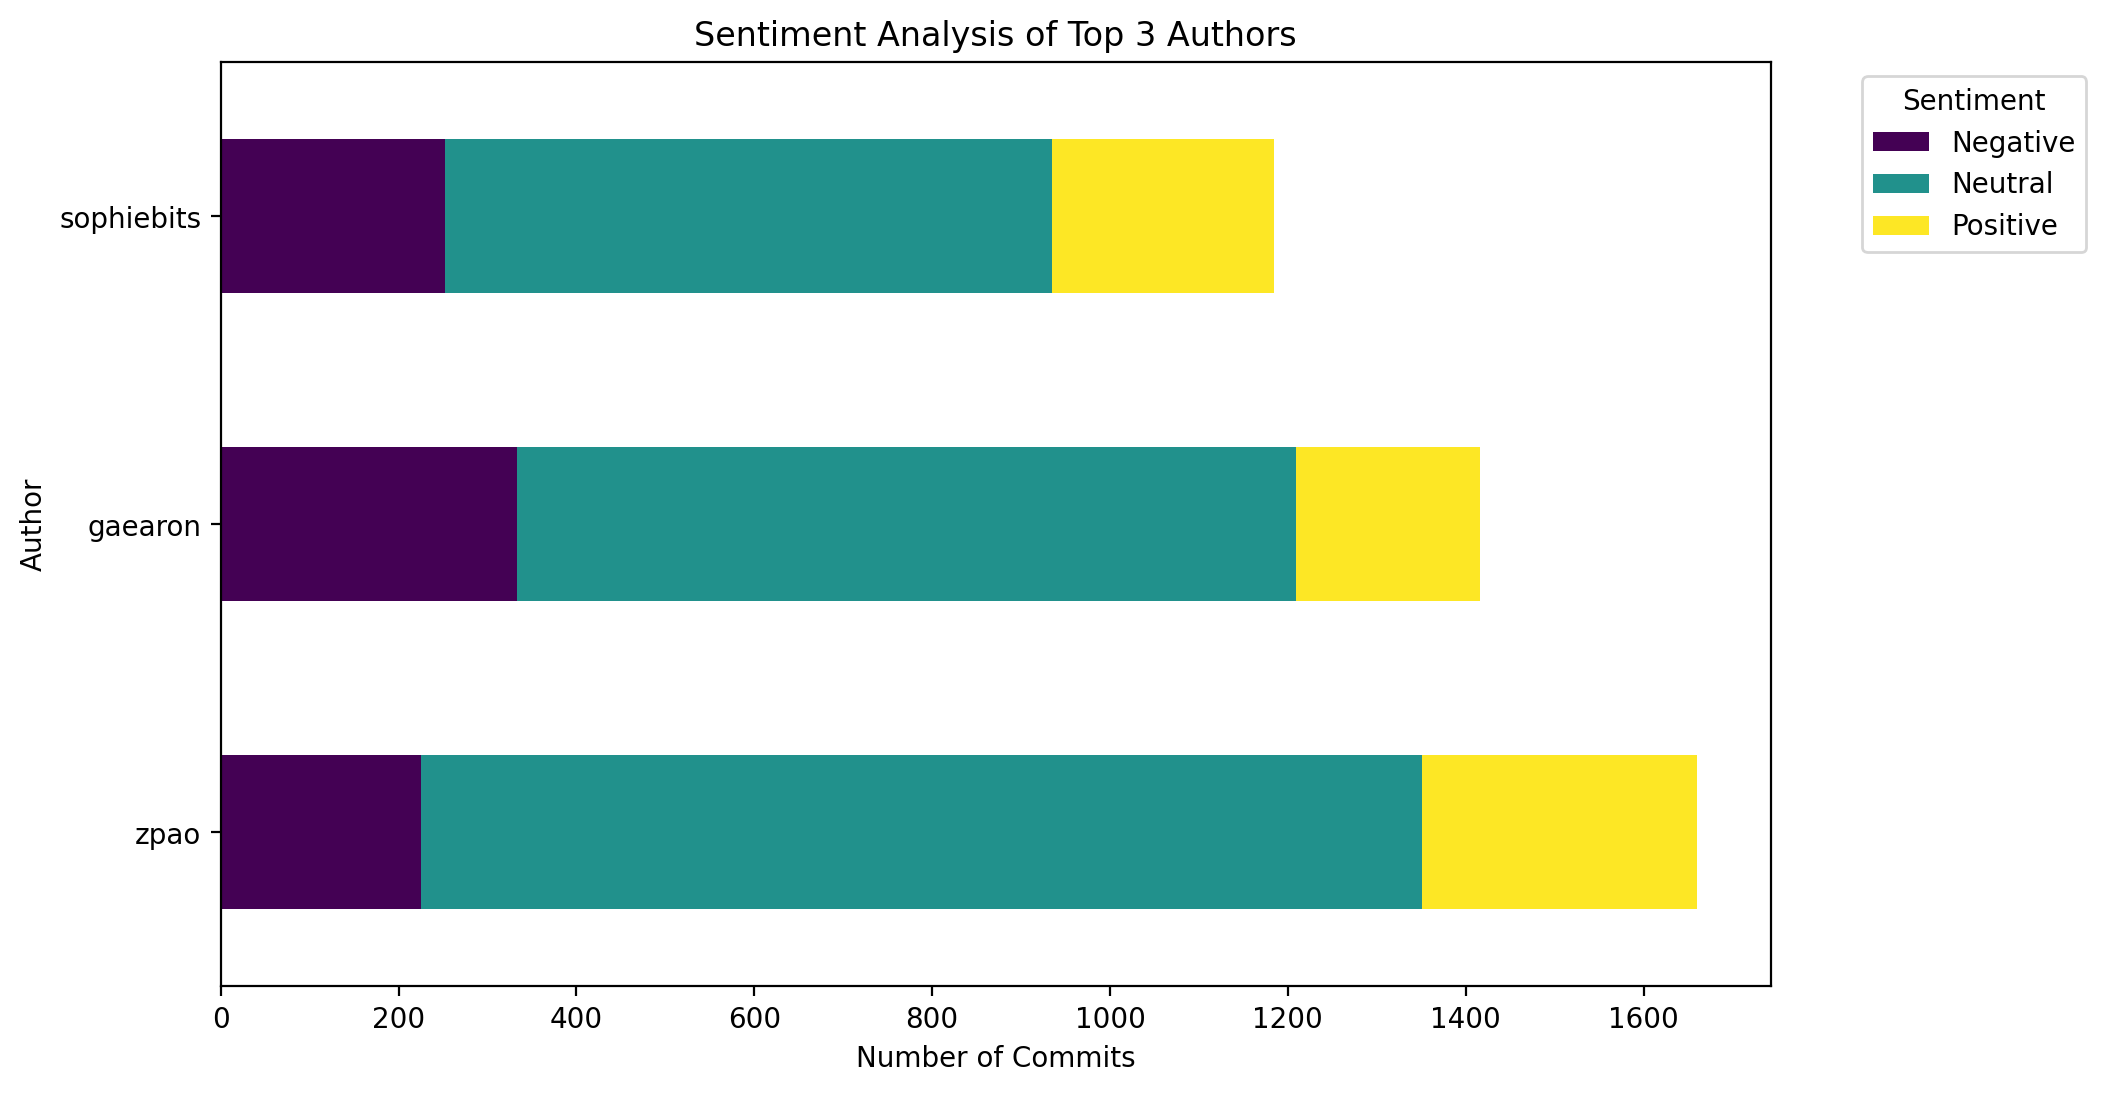

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Filter out rows with neutral sentiment (if needed)
df_filtered = df

# Group by author and sentiment, count the number of occurrences
grouped_df = df_filtered.groupby(['author', 'Sentiment']).size().unstack(fill_value=0)

# Get the top 3 authors based on the total number of commits
top_authors = grouped_df.sum(axis=1).nlargest(3).index

# Select only the rows for the top 3 authors
top_authors_df = grouped_df.loc[top_authors]

# Plot the horizontal stacked bar chart
ax = top_authors_df.plot(kind='barh', stacked=True, colormap='viridis', figsize=(10, 6))

# Set plot labels and title
plt.ylabel('Author')
plt.xlabel('Number of Commits')
plt.title('Sentiment Analysis of Top 3 Authors')

# Display the legend
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


In [57]:
react.head(1)

author                      date  additions  deletions  \
0  gnoff 2023-09-27 23:17:45+00:00          0          1   

                                             message  numfiles  \
0  Revert "publish `react-server-dom-turbopack` t...         1   

                [files]  net_code_change  day_of_week  Word_Count Sentiment  
0  ['ReactVersions.js']               -1            2          58  Positive

In [58]:
result = react[react['Sentiment'] == 'Negative']
result.sort_values(['Word_Count'], ascending=[False])
result = result[result['Word_Count'] <= 7]

result[['message', 'Sentiment']]

message Sentiment
1036            Add missing item to the changelog  Negative
1129   Add a missing breaking change to changelog  Negative
1738                    Fix failing test (#21697)  Negative
1768              Remove space from tag arguments  Negative
2030                            Fix a broken link  Negative
...                                           ...       ...
15885        Expose test modules for requirement.  Negative
15939  Ignore "docs/js/jsx-compiler.js" from Git.  Negative
15951               make it a little less cynical  Negative
15963                        Fix minor typo error  Negative
15968                  Missed a link in README.md  Negative

[241 rows x 2 columns]

In [59]:
react

author                      date  additions  deletions  \
0            gnoff 2023-09-27 23:17:45+00:00          0          1   
1            gnoff 2023-09-27 17:39:04+00:00          1          0   
6            hoxyq 2023-09-25 17:24:52+00:00         27         10   
7      sebmarkbage 2023-09-25 16:26:17+00:00         18         18   
9      sebmarkbage 2023-09-23 16:33:48+00:00         64          9   
...            ...                       ...        ...        ...   
15976      benjamn 2013-05-29 20:39:34+00:00          2          2   
15978    yungsters 2013-05-29 20:32:22+00:00          2          2   
15980     petehunt 2013-05-29 20:24:51+00:00         25          3   
15981     petehunt 2013-05-29 20:11:15+00:00          5          5   
15982         zpao 2013-05-29 20:04:54+00:00          1          1   

                                                 message  numfiles  \
0      Revert "publish `react-server-dom-turbopack` t...         1   
1      publish `react-server-dom-turbopack` to canary...         1   
6      React DevTools 4.28.3 -> 4.28.4 (#27419)  * re...         8   
7      [Fizz] Restrict types of keyPath when it is kn...         1   
9      [Flight] Dedupe suspense boundaries when it ha...         2   
...                                                  ...       ...   
15976  Merge pull request #3 from paulshen/spellings ...         2   
15978  Merge pull request #2 from paulshen/homebutton...         1   
15980                  Fix live editor on mobile devices         2   
15981                                      Fix some URLs         2   
15982  Update release task to keep correct filename case         1   

                                                 [files]  net_code_change  \
0                                   ['ReactVersions.js']               -1   
1                                   ['ReactVersions.js']                1   
6      ['packages/react-devtools-core/package.json', ...               17   
7       ['packages/react-server/src/ReactFizzServer.js']                0   
9      ['packages/react-dom/src/__tests__/ReactDOMFiz...               55   
...                                                  ...              ...   
15976  ['docs/_js/examples/timer.js', 'docs/docs/synt...                0   
15978                                  ['docs/index.md']                0   
15980    ['docs/_config.yml', 'docs/_js/live_editor.js']               22   
15981                 ['README.md', 'docs/downloads.md']                0   
15982                         ['grunt/tasks/release.js']                0   

       day_of_week  Word_Count Sentiment  
0                2          58  Positive  
1                2          48   Neutral  
6                0         295  Positive  
7                0          37  Negative  
9                5          55  Negative  
...            ...         ...       ...  
15976            2          14   Neutral  
15978            2          17   Neutral  
15980            2           6   Neutral  
15981            2           3   Neutral  
15982            2           8   Neutral  

[12284 rows x 11 columns]

In [60]:
result = react[react['Word_Count'] >= 2000]

In [61]:

# Assuming 'react' is your DataFrame
result = react[react['Word_Count'] >= 2000]

txt_file_path = 'output.txt'

# Export the 'message' column to a text file
result['message'].to_csv(txt_file_path, sep='\t', index=False, header=False)

print(f"Exported to {txt_file_path}")


Exported to output.txt


### spacy


In [62]:
react.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12284 entries, 0 to 15982
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   author           12284 non-null  object             
 1   date             12284 non-null  datetime64[ns, UTC]
 2   additions        12284 non-null  int64              
 3   deletions        12284 non-null  int64              
 4   message          12284 non-null  object             
 5   numfiles         12284 non-null  int64              
 6   [files]          12284 non-null  object             
 7   net_code_change  12284 non-null  int64              
 8   day_of_week      12284 non-null  int32              
 9   Word_Count       12284 non-null  int64              
 10  Sentiment        12284 non-null  object             
dtypes: datetime64[ns, UTC](1), int32(1), int64(5), object(4)
memory usage: 1.3+ MB


In [63]:
import spacy
import pandas as pd

# Load spaCy English NLP model
nlp = spacy.load('en_core_web_sm')

# Assuming df is your DataFrame with a column named 'message' containing commit messages
# Create a new column 'named_entities' to store the named entities and their labels
react['named_entities'] = ""

# Process each commit message with spaCy NLP model and extract named entities
for index, row in df.iterrows():
    text = row['message']
    doc = nlp(text)
    named_entities = [(ent.text, ent.label_) for ent in doc.ents]
    df.at[index, 'named_entities'] = named_entities

# Display the DataFrame with the new 'named_entities' column
print(react[['message', 'named_entities']])


                                                 message  \
0      Revert "publish `react-server-dom-turbopack` t...   
1      publish `react-server-dom-turbopack` to canary...   
6      React DevTools 4.28.3 -> 4.28.4 (#27419)  * re...   
7      [Fizz] Restrict types of keyPath when it is kn...   
9      [Flight] Dedupe suspense boundaries when it ha...   
...                                                  ...   
15976  Merge pull request #3 from paulshen/spellings ...   
15978  Merge pull request #2 from paulshen/homebutton...   
15980                  Fix live editor on mobile devices   
15981                                      Fix some URLs   
15982  Update release task to keep correct filename case   

                                          named_entities  
0      [(Revert, PERSON), (27427, MONEY), (27428, MON...  
1                                       [(27427, MONEY)]  
6      [(4.28.4, CARDINAL), (27419, MONEY), (#27417](...  
7                                       [(2

####  Version check 

In [64]:
df=react

In [65]:
import pandas as pd
import re



# Function to extract version
def extract_version(commit_message):
    version_pattern = re.compile(r'\b\d+\.\d+\.\d+\b')
    match = version_pattern.search(commit_message)
    return match.group() if match else None

# Apply the function to the 'message' column
df['version'] = df['message'].apply(extract_version)

# Display the updated DataFrame
print(df)


            author                      date  additions  deletions  \
0            gnoff 2023-09-27 23:17:45+00:00          0          1   
1            gnoff 2023-09-27 17:39:04+00:00          1          0   
6            hoxyq 2023-09-25 17:24:52+00:00         27         10   
7      sebmarkbage 2023-09-25 16:26:17+00:00         18         18   
9      sebmarkbage 2023-09-23 16:33:48+00:00         64          9   
...            ...                       ...        ...        ...   
15976      benjamn 2013-05-29 20:39:34+00:00          2          2   
15978    yungsters 2013-05-29 20:32:22+00:00          2          2   
15980     petehunt 2013-05-29 20:24:51+00:00         25          3   
15981     petehunt 2013-05-29 20:11:15+00:00          5          5   
15982         zpao 2013-05-29 20:04:54+00:00          1          1   

                                                 message  numfiles  \
0      Revert "publish `react-server-dom-turbopack` t...         1   
1      publish `rea

In [66]:
df_version = df['version']
df_version = df_version.dropna()

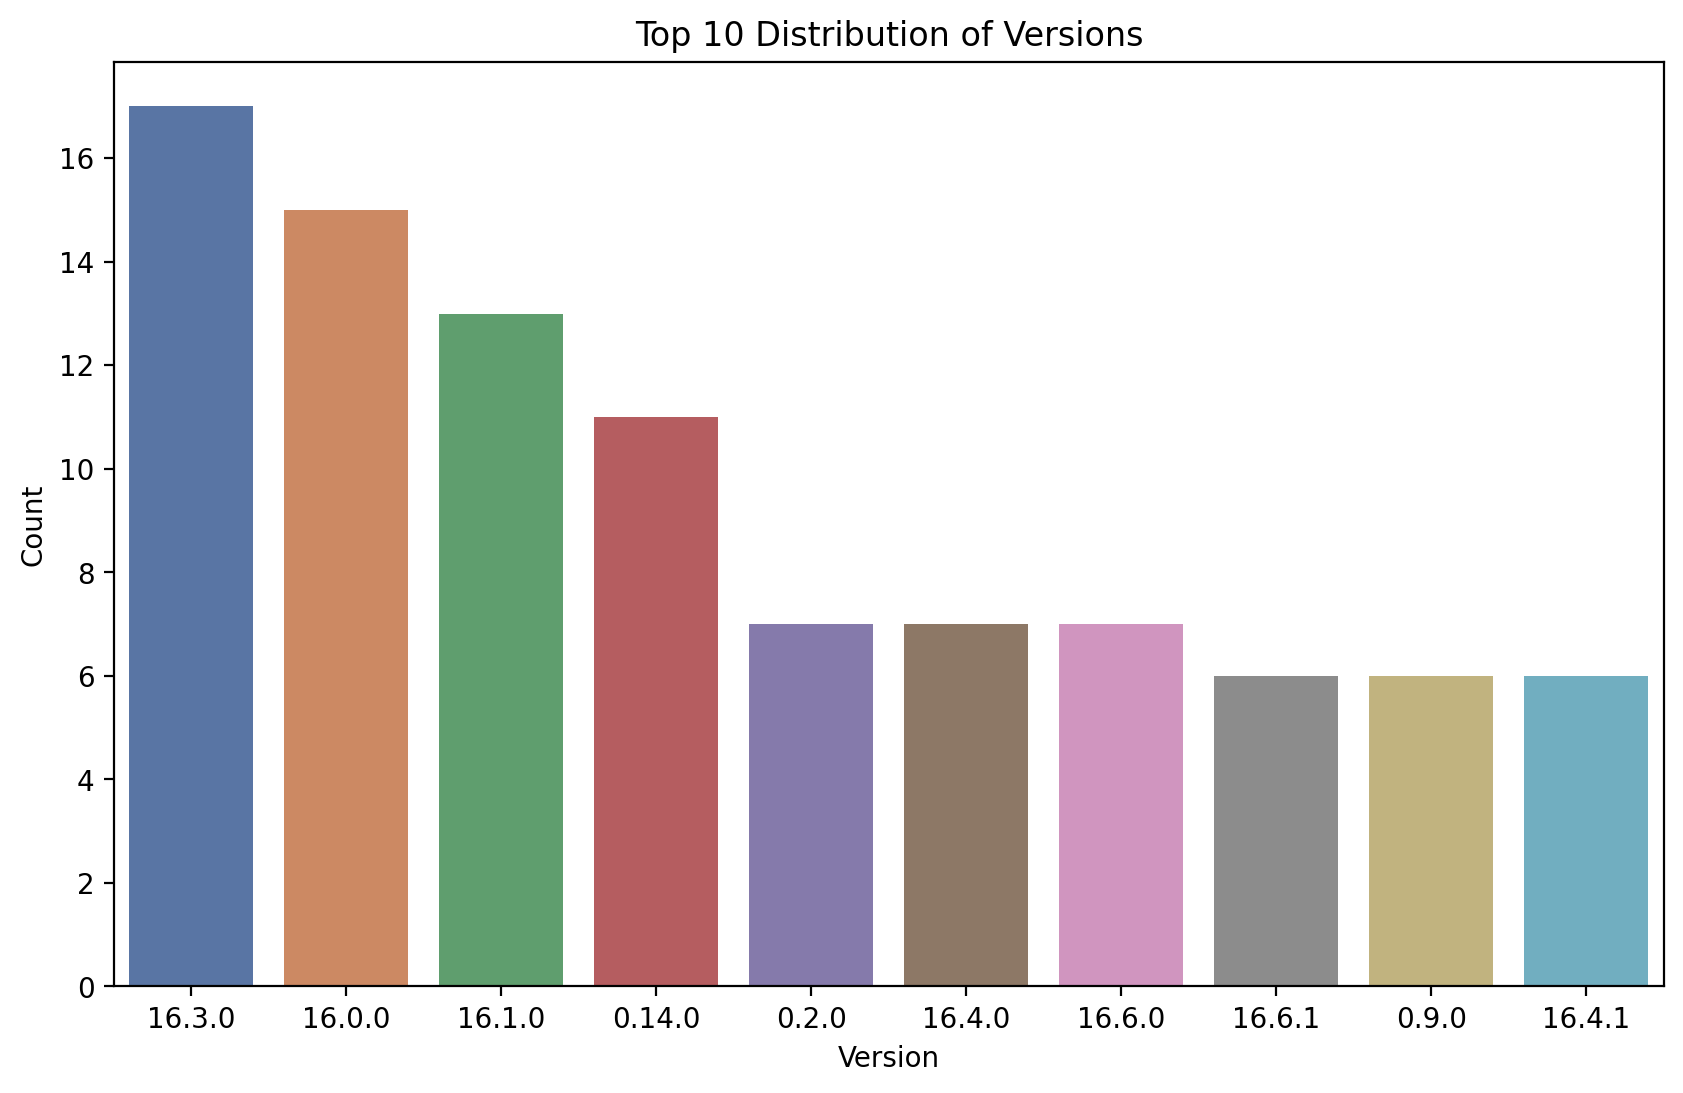

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_version is your DataFrame column containing version information

# Count the occurrences of each version
version_counts = df_version.value_counts()

# Select the top 10 versions
top_10_versions = version_counts.head(10).reset_index(name='Count')

# Plotting with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='version', y='Count', data=top_10_versions, palette='deep')
plt.title('Top 10 Distribution of Versions')
plt.xlabel('Version')
plt.ylabel('Count')
plt.show()


##### Medium sentiment

In [256]:
df_react= react.drop(columns=['day_of_week','named_entities', 'version'])
df_react.head(1)

author                      date  additions  deletions  \
0  gnoff 2023-09-27 23:17:45+00:00          0          1   

                                             message  numfiles  \
0  Revert "publish `react-server-dom-turbopack` t...         1   

                [files]  net_code_change  Word_Count Sentiment  
0  ['ReactVersions.js']               -1          58  Positive